In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read current application data

current = pd.read_csv('application_data.csv')
current.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
current.shape

(307511, 122)

## Data Cleaning

### Inspecting missing values

In [5]:
# utility function for finding percentage of null values in each column

def NApercent(df):
    return df.isna().sum() / df.shape[0] * 100

NApercent(current)

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [6]:
# listing columns with more than 30% null values

col_with_missing = current.columns[NApercent(current) > 30]
col_with_missing

Index(['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
       'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLI

In [7]:
# Remove columns with more than 30% missing values

current.drop(columns=col_with_missing, inplace=True)

current.shape

(307511, 72)

In [8]:
# Remove unnecessary columns

current.drop(columns=['REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START','WEEKDAY_APPR_PROCESS_START','FLAG_CONT_MOBILE','FLAG_MOBIL',
                      'FLAG_EMAIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
                      'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY',
                      'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
                     'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11',
                      'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15',
                      'FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19',
                     'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','EXT_SOURCE_3',
                      'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
                      'AMT_REQ_CREDIT_BUREAU_MON','OBS_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE'], inplace=True)

In [9]:
NApercent(current) 

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_PHONE                     0.000000
CNT_FAM_MEMBERS                0.000650
REGION_RATING_CLIENT           0.000000
REG_REGION_NOT_LIVE_REGION     0.000000


In [10]:
# finding the unique values in each column with categorical data and cleaning them

def findCategories(df):
    for col in df.columns:
        if df[col].dtype == 'O':
            print(f"{col} : {df[col].unique()} \n")
            
findCategories(current)

NAME_CONTRACT_TYPE : ['Cash loans' 'Revolving loans'] 

CODE_GENDER : ['M' 'F' 'XNA'] 

FLAG_OWN_CAR : ['N' 'Y'] 

FLAG_OWN_REALTY : ['Y' 'N'] 

NAME_TYPE_SUITE : ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people'] 

NAME_INCOME_TYPE : ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave'] 

NAME_EDUCATION_TYPE : ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree'] 

NAME_FAMILY_STATUS : ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown'] 

NAME_HOUSING_TYPE : ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment'] 

ORGANIZATION_TYPE : ['Business Entity Type 3' 'School' 'Government' 'Religion' 'Other' 'XNA'
 'Electricity' 'Medicine' 'Business Entity Type 2' 'Self-employed'
 'Transport: type 2' 'Construction' 'Housing' 'Kindergarte

##### CODE_GENDER has XNA category, these are missing values, so remove them

In [11]:

current.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [12]:
current = current[~ (current.CODE_GENDER == 'XNA')]

current.CODE_GENDER.value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

##### ORGANIZATION_TYPE has XNA category, these are missing values, check if they are MAR or MNAR
###### Group similar categories into a uniform category

In [13]:

current.ORGANIZATION_TYPE.value_counts().sort_index()

Advertising                 429
Agriculture                2454
Bank                       2507
Business Entity Type 1     5983
Business Entity Type 2    10553
Business Entity Type 3    67992
Cleaning                    260
Construction               6721
Culture                     379
Electricity                 950
Emergency                   560
Government                10404
Hotel                       966
Housing                    2958
Industry: type 1           1039
Industry: type 10           109
Industry: type 11          2704
Industry: type 12           369
Industry: type 13            67
Industry: type 2            458
Industry: type 3           3277
Industry: type 4            877
Industry: type 5            599
Industry: type 6            112
Industry: type 7           1307
Industry: type 8             24
Industry: type 9           3368
Insurance                   597
Kindergarten               6879
Legal Services              305
Medicine                  11192
Military

In [14]:
# analysing rows where organization is XNA

current[current.ORGANIZATION_TYPE =='XNA']['NAME_INCOME_TYPE'].value_counts()


Pensioner     55352
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

    We see that organization type is missing for Pensioners and Unemployed as they are not working anywhere. 
    So, these are MNAR data. We can rename it as 'Not Working'


### Data standardization
    We can also create a uniform category in ORGANIZATION_TYPE for groups with multiple types
    For Eg: 'Transport: type 1','Transport: type 2','Transport: type 3','Transport: type 4' converted to 'Transport'

In [15]:
current['ORGANIZATION_TYPE'].replace('XNA', 'Not Working', inplace=True)

current['ORGANIZATION_TYPE'].replace(['Industry: type 1','Industry: type 2','Industry: type 3','Industry: type 4',
                                      'Industry: type 5','Industry: type 6','Industry: type 7','Industry: type 8',
                                     'Industry: type 9','Industry: type 10','Industry: type 11','Industry: type 12',
                                     'Industry: type 13'], 'Industry', inplace=True)

current['ORGANIZATION_TYPE'].replace(['Trade: type 1','Trade: type 2','Trade: type 3','Trade: type 4','Trade: type 5',
                                     'Trade: type 6','Trade: type 7'], 'Trade', inplace=True)

current['ORGANIZATION_TYPE'].replace(['Transport: type 1','Transport: type 2','Transport: type 3','Transport: type 4'], 
                                     'Transport', inplace=True)

current['ORGANIZATION_TYPE'].replace(['Business Entity Type 1','Business Entity Type 2','Business Entity Type 3',
                                     'Business Entity Type 4'], 'Business Entity', inplace=True)

In [16]:
current['ORGANIZATION_TYPE'].value_counts()

Business Entity        84528
Not Working            55374
Self-employed          38412
Other                  16683
Trade                  14315
Industry               14310
Medicine               11192
Government             10404
Transport               8990
School                  8893
Kindergarten            6879
Construction            6721
Security                3247
Housing                 2958
Military                2634
Bank                    2507
Agriculture             2454
Police                  2341
Postal                  2157
Security Ministries     1974
Restaurant              1811
Services                1575
University              1327
Hotel                    966
Electricity              950
Insurance                597
Telecom                  577
Emergency                560
Advertising              429
Realtor                  396
Culture                  379
Mobile                   317
Legal Services           305
Cleaning                 260
Religion      

##### For NAME_TYPE_SUITE, we group together 'Other_A', 'Other_B'  into a single category called 'Others'

##### For NAME_INCOME_TYPE we can group together 'Student','Unemployed','Businessman', 'Maternity leave' into a single category called 'Others'

In [17]:
current['NAME_TYPE_SUITE'].replace(['Other_A','Other_B'], 'Others', inplace=True)

current.loc[current.NAME_INCOME_TYPE.isin(['Student','Unemployed','Businessman','Maternity leave']), 
            'NAME_INCOME_TYPE'] = 'Others'

In [18]:
current.NAME_INCOME_TYPE.value_counts()

Working                 158771
Commercial associate     71616
Pensioner                55362
State servant            21703
Others                      55
Name: NAME_INCOME_TYPE, dtype: int64

In [19]:
current.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248523
Family              40148
Spouse, partner     11370
Children             3267
Others               2636
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

### Inspecting outliers

In [20]:
# function to plot the histogram for a given column

def plotHistplots(df,col):
    min_ = int(df[col].min())
    max_ = int(df[col].quantile(0.99))
#     print(min_, max_, int((max_- min_)/20))
    step = int((max_- min_)/20)
    bins = [i for i in range(min_, max_, step)]
    sns.histplot(df[col], bins=bins)
    

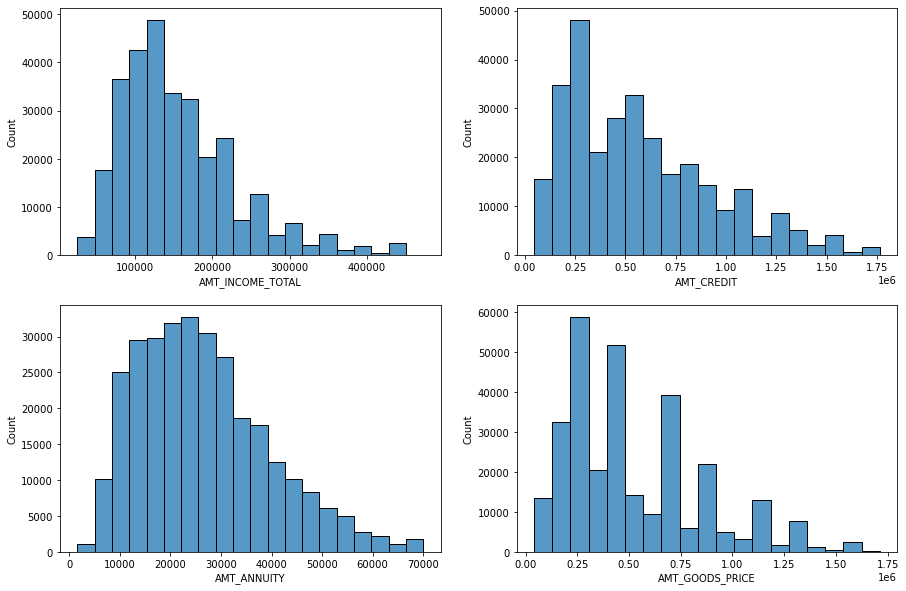

In [21]:
# analysing the distribution of few skewed numeric continuous columns

cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']

plt.figure(figsize=[15,10])
for i,j in enumerate(cols):
    plt.subplot(2,2,i+1)
    plotHistplots(current,j)

In [22]:
# function to plot the counts of categorical columns or numeric columns with less than 15 categories as barplots 
# and quantile distribution of numeric variables as boxplots

def plotCount(df):
    for col in df.columns:
        if col not in ['SK_ID_CURR','TARGET']:
            if (df[col].dtype == 'O') or (len(df[col].unique()) <= 15):
                plt.figure(figsize=[10,5])
                cnt = df[col].value_counts(normalize=True) * 100
                sns.barplot(cnt.index,cnt.values)
                plt.xticks(rotation=90)
                plt.title(f'Percentage of values category wise in {col} ')
            else:
                plt.figure(figsize=[10,5])  
                sns.boxplot(df[col])
                plt.xticks(rotation=90)
                plt.title(f'Quantile Distribution of {col}')
                

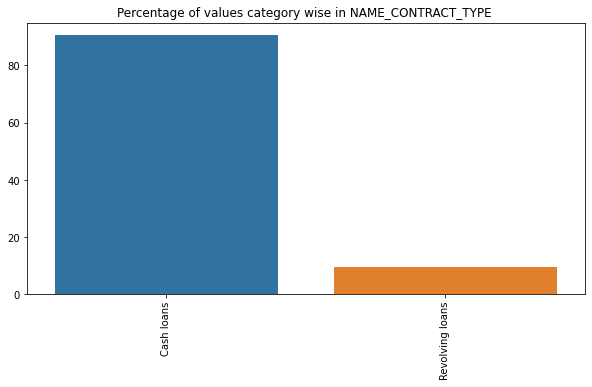

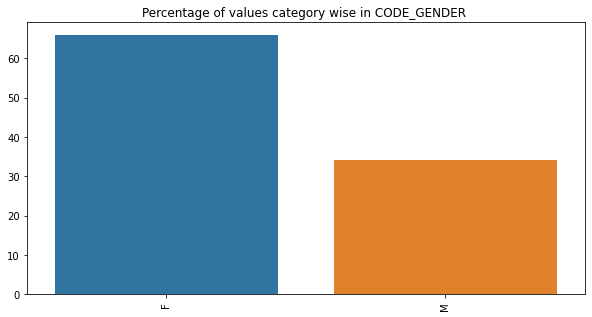

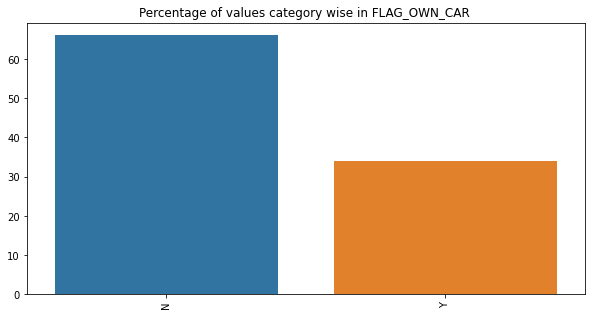

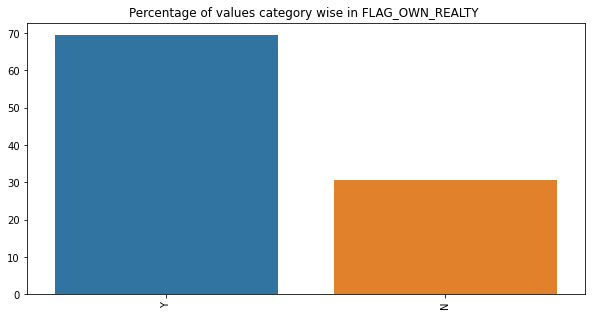

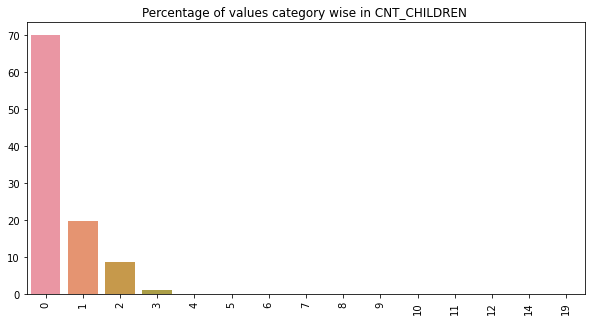

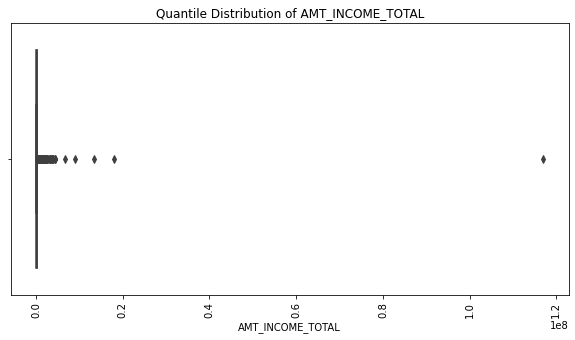

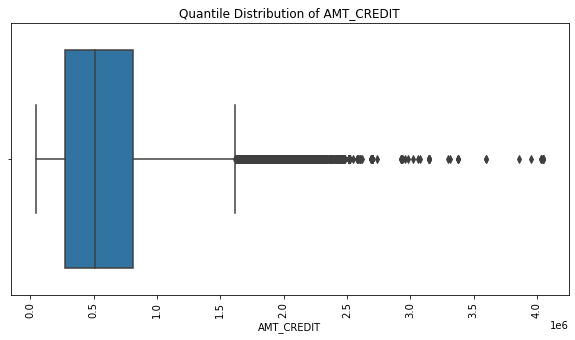

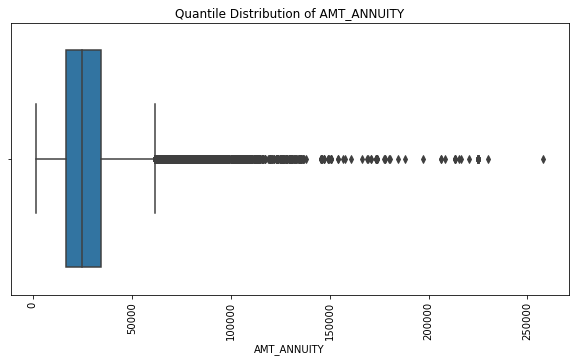

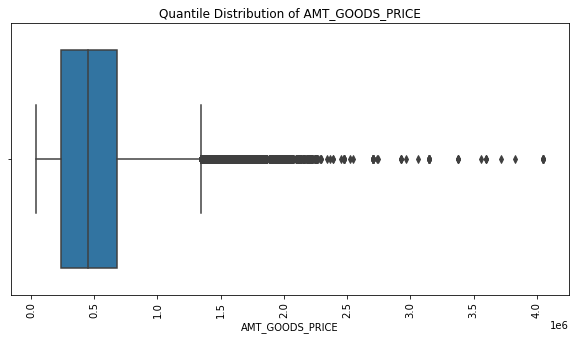

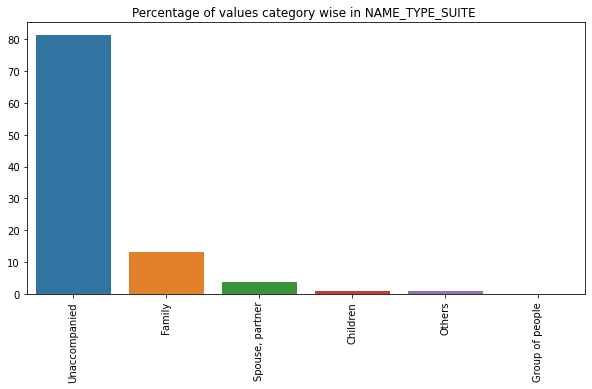

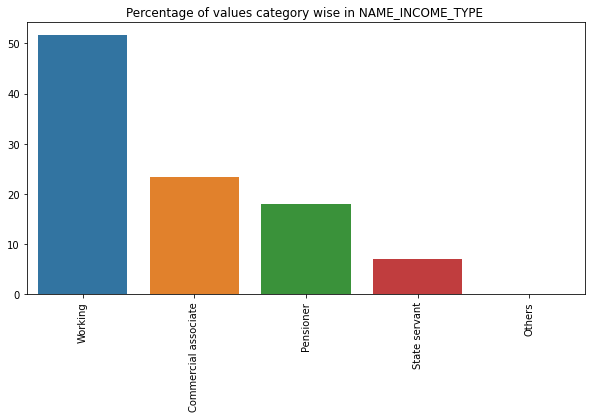

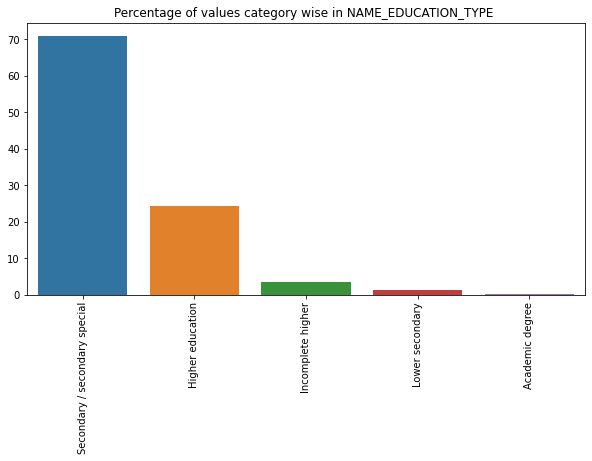

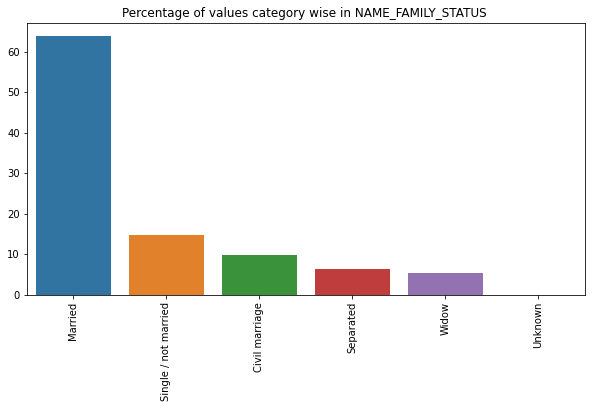

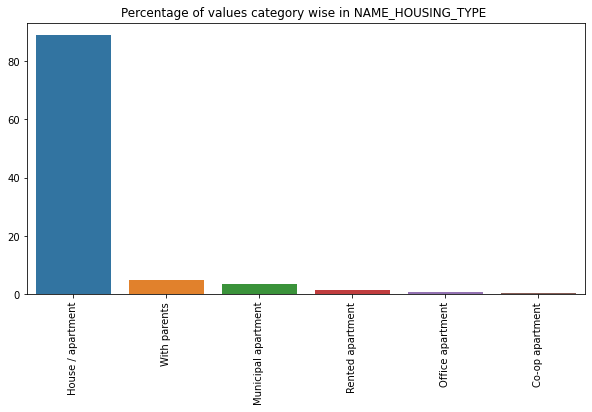

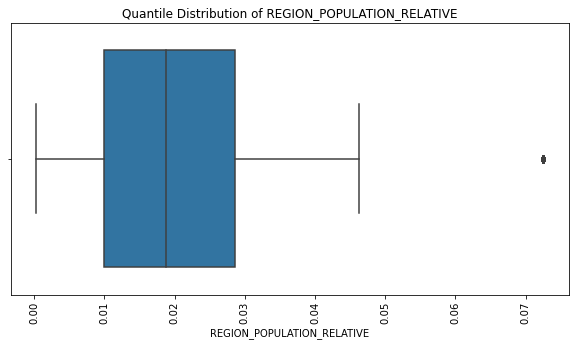

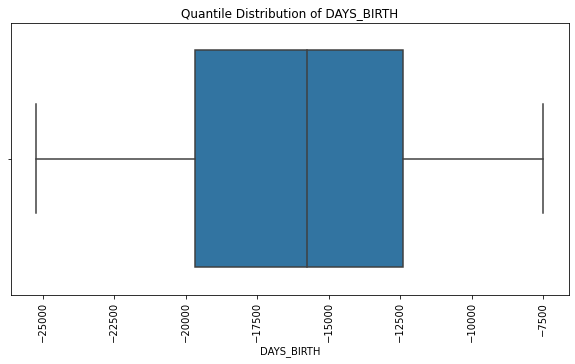

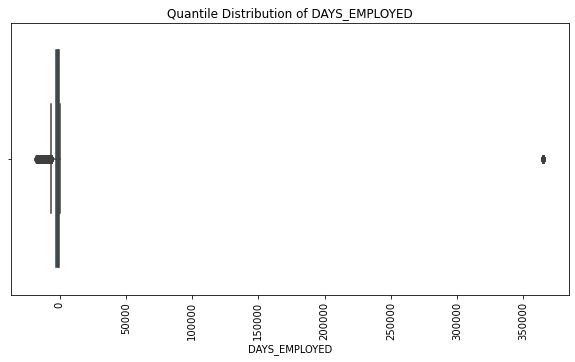

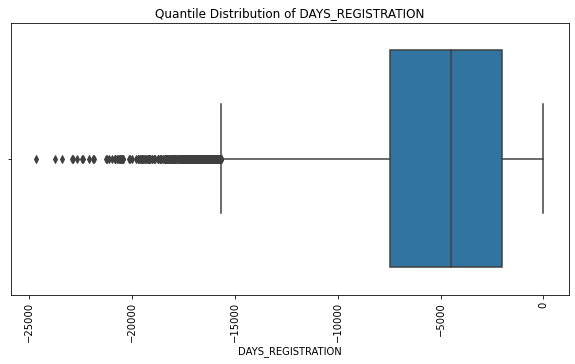

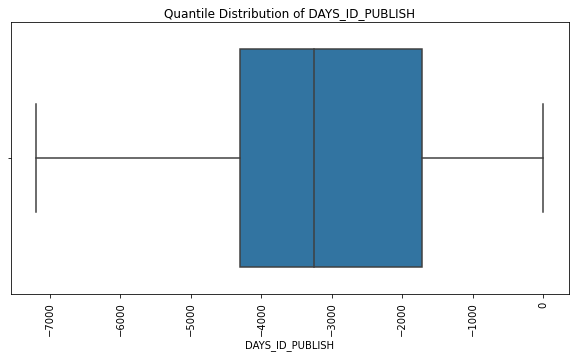

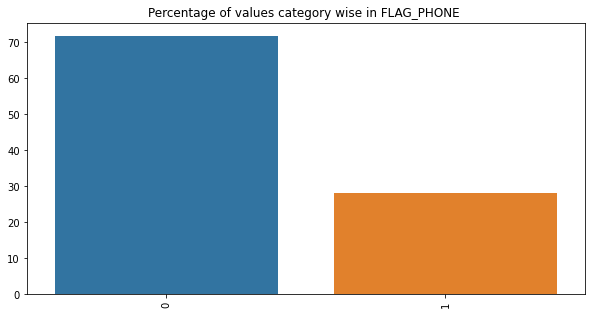

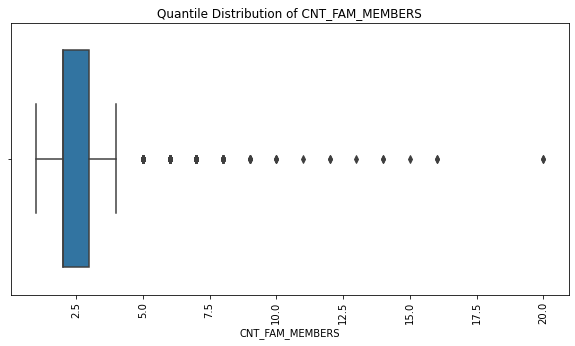

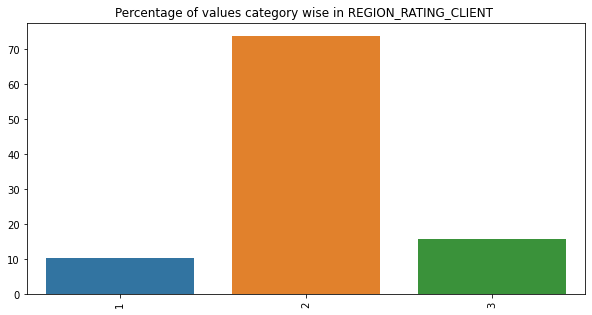

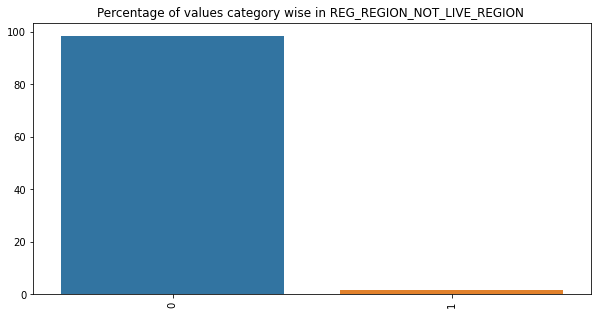

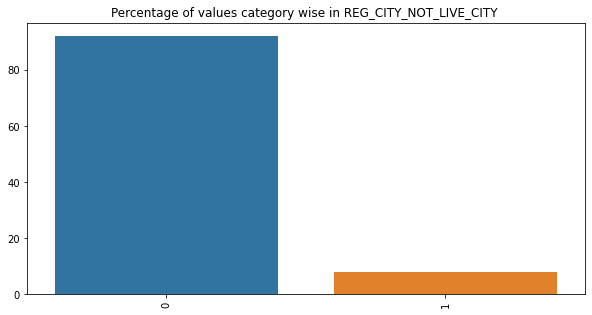

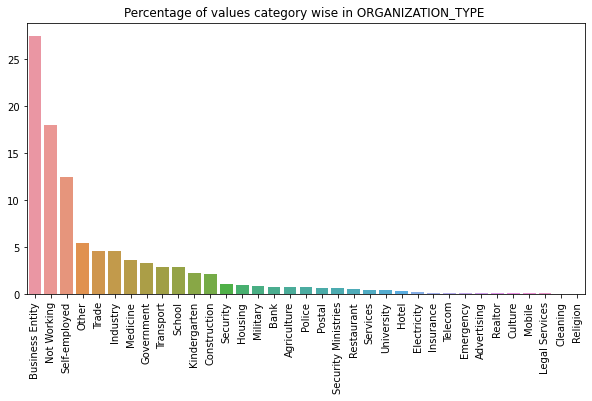

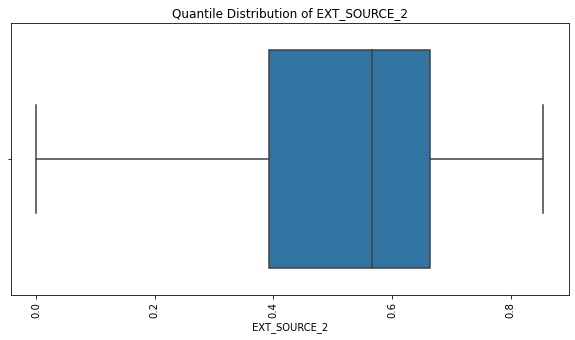

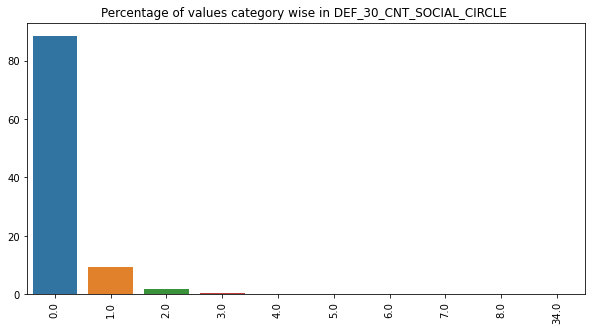

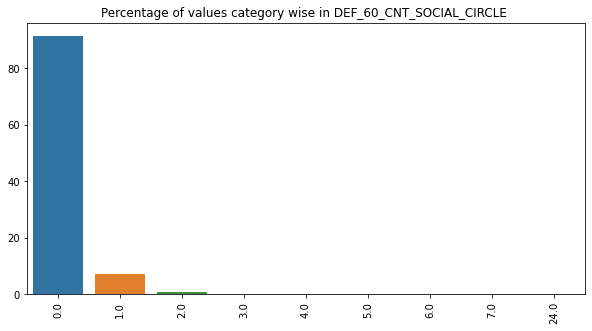

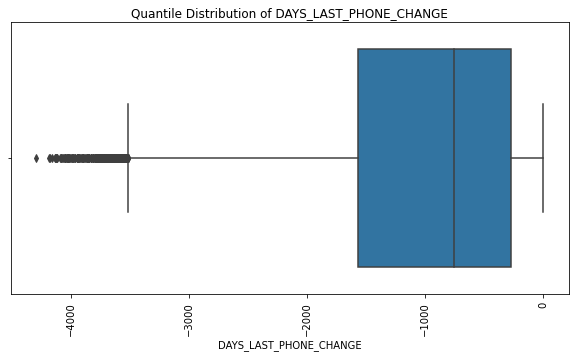

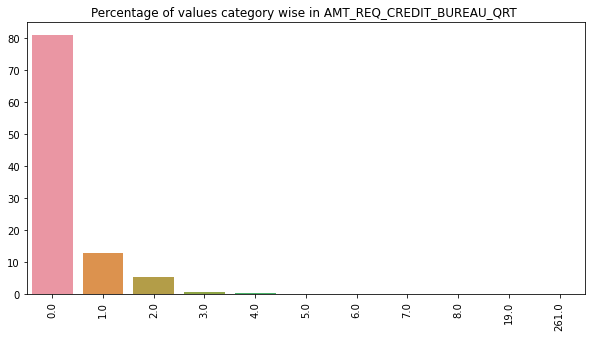

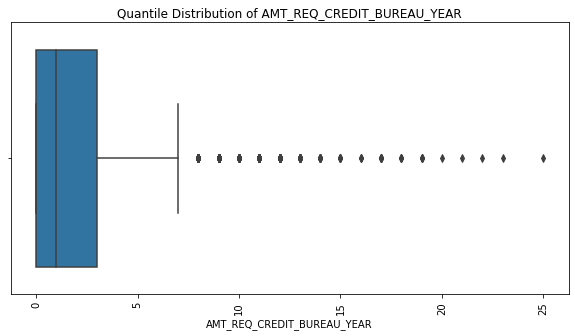

In [23]:
# plotting all columns

plotCount(current)

    We can see that many numeric columns have significant outliers. 

    AMT_INCOME_TOTAL ,AMT_CREDIT ,AMT_ANNUITY, AMT_GOODS_PRICE,DAYS_REGISTRATION  have huge no of outliers.  
    These outliers can be removed by IQR method , where we remove the points beyond Interquartile range ,
    i.e beyond (Q1 - 1.5*IQR) and (Q3 + 1.5*IQR)


##### We can remove the outliers  using IQR method for highly skewed columns. 

In [24]:
# function to remove outliers

def removeOutliers_IQR(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    high = q3 + 1.5*iqr
    low = q1 - 1.5*iqr
    print(f'Q1={q1}, Q3={q3}')
    print(f"removing outliers for {col} that lie <={low} and >={high}\n")
    df = df[(df[col] >= low) & (df[col] <= high)]
    return df

In [25]:
current = removeOutliers_IQR(current, 'AMT_INCOME_TOTAL')
current = removeOutliers_IQR(current, 'AMT_CREDIT')
current = removeOutliers_IQR(current, 'AMT_GOODS_PRICE')
current = removeOutliers_IQR(current, 'AMT_ANNUITY')
current = removeOutliers_IQR(current, 'CNT_FAM_MEMBERS')
current = removeOutliers_IQR(current, 'CNT_CHILDREN')

Q1=112500.0, Q3=202500.0
removing outliers for AMT_INCOME_TOTAL that lie <=-22500.0 and >=337500.0

Q1=270000.0, Q3=790830.0
removing outliers for AMT_CREDIT that lie <=-511245.0 and >=1572075.0

Q1=229500.0, Q3=675000.0
removing outliers for AMT_GOODS_PRICE that lie <=-438750.0 and >=1343250.0

Q1=16011.0, Q3=32004.0
removing outliers for AMT_ANNUITY that lie <=-7978.5 and >=55993.5

Q1=2.0, Q3=3.0
removing outliers for CNT_FAM_MEMBERS that lie <=0.5 and >=4.5

Q1=0.0, Q3=1.0
removing outliers for CNT_CHILDREN that lie <=-1.5 and >=2.5




    DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE columns have 
    negative values as they are counted in days backwards from the Date of application. 
    We can consider their absolute values for ease of understanding.

    We can convert the DAYS_BIRTH into years and bin it for analysing based on age groups. 


In [26]:
# since age is in days from the time of application to the day of birth, it is negative. We can convert it into years

current.DAYS_BIRTH = current.DAYS_BIRTH.apply(lambda x: abs(x/365))
current.rename(columns={'DAYS_BIRTH':'YEARS_BIRTH'}, inplace=True)

In [27]:
current.YEARS_BIRTH.describe()

count    272649.000000
mean         44.024457
std          12.156983
min          20.517808
25%          33.775342
50%          43.301370
75%          54.252055
max          69.043836
Name: YEARS_BIRTH, dtype: float64

In [28]:
# Now we can bin the ages into age-groups

current['age_group'] = pd.cut(current.YEARS_BIRTH, bins=[20,30,40,50,60,70], labels=['20-30','30-40','40-50','50-60','60-70'])

current[['YEARS_BIRTH','age_group']].head()

YEARS_BIRTH age_group
0    25.920548     20-30
1    45.931507     40-50
2    52.180822     50-60
3    52.068493     50-60
4    54.608219     50-60

In [29]:
# in DAYS_EMPLOYED column, similarly, the values are in negative. We can transform it to indicate the no. of years
# of employment at the time of application

current.DAYS_EMPLOYED = current.DAYS_EMPLOYED.apply(lambda x: abs(x/365))

current.rename(columns={'DAYS_EMPLOYED':'YEARS_EMPLOYED'}, inplace=True)

current.YEARS_EMPLOYED.describe()

count    272649.000000
mean        195.092221
std         389.878111
min           0.000000
25%           2.523288
50%           6.054795
75%          16.698630
max        1000.665753
Name: YEARS_EMPLOYED, dtype: float64

In [30]:
# Fixing invalid values in YEARS_EMPLOYED
# checking income type of clients with more than 100 years of employment

current[current.YEARS_EMPLOYED > 100]['NAME_INCOME_TYPE'].value_counts()

Pensioner    51715
Others          19
Name: NAME_INCOME_TYPE, dtype: int64

In [31]:

current[current.YEARS_EMPLOYED > 100]['YEARS_EMPLOYED'].value_counts()

1000.665753    51734
Name: YEARS_EMPLOYED, dtype: int64

    We can see that the years of employment is filled as 1000.665753 for most pensioners 
    as we don't have the Years of employment data for them.
    
    These people are in the 'Not Working' category. So this data is Missing Not at Random (MNAR). 
    We can Cap this data to avoid the outlier.
    
    Assume, The maximum years of employment for a person can be 60 years

In [32]:
# Filling YEARS_EMPLOYED = 60 for invalid values. Hence, we capped the upper limit.

current.loc[current.YEARS_EMPLOYED > 60,'YEARS_EMPLOYED'] = 60

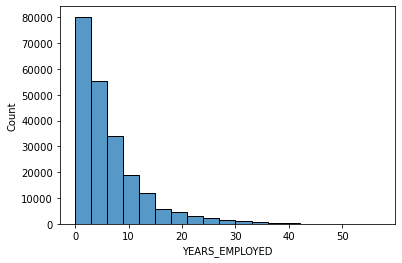

In [33]:
plotHistplots(current,'YEARS_EMPLOYED' )

In [34]:
current.DAYS_REGISTRATION = -current.DAYS_REGISTRATION 
current.DAYS_ID_PUBLISH = -current.DAYS_ID_PUBLISH
current.DAYS_LAST_PHONE_CHANGE = -current.DAYS_LAST_PHONE_CHANGE

    We can also derive new columns by binning the  'AMT_INCOME_TOTAL'  and  'AMT_CREDIT'  columns
    for better understanding according to Income brackets and Credit Amount brackets of the loan.

In [35]:
current.AMT_INCOME_TOTAL.describe()

count    272649.000000
mean     150558.975131
std       62190.700186
min       25650.000000
25%      112500.000000
50%      135000.000000
75%      180000.000000
max      337500.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [36]:
# Bins for AMT_INCOME_TOTAL

bins = [0,50000,100000,150000,200000,250000,300000,350000,400000,1000000]
labels = ['below 50000', '50000-100000','100000-150000', '150000-200000','200000-250000','250000-300000','300000-350000',
          '350000-400000','400000 and above']

current['amt_income_groups'] = pd.cut(current['AMT_INCOME_TOTAL'],bins, labels=labels)

In [37]:
current['amt_income_groups'].value_counts()

100000-150000       88168
150000-200000       59554
50000-100000        57871
200000-250000       42071
250000-300000       13923
300000-350000        6634
below 50000          4428
350000-400000           0
400000 and above        0
Name: amt_income_groups, dtype: int64

In [38]:
# now let's analyze the AMT_CREDIT column

current.AMT_CREDIT.describe()

count    2.726490e+05
mean     5.287444e+05
std      3.168413e+05
min      4.500000e+04
25%      2.695500e+05
50%      4.725000e+05
75%      7.470000e+05
max      1.569042e+06
Name: AMT_CREDIT, dtype: float64

In [39]:
# Bins for AMT_CREDIT

bins = [0,200000,300000,400000,500000,600000,700000,800000,900000,1000000,1500000,5000000]
labels = ['below 200000', '200000-300000', '300000-400000','400000-500000','500000-600000','600000-700000','700000-800000',
        '800000-900000','900000-1000000','1000000-1500000','above 1500000']

current['amt_credit_groups'] = pd.cut(current['AMT_CREDIT'],bins=bins ,labels=labels)

In [40]:
current['amt_credit_groups'].value_counts()

200000-300000      53235
below 200000       35333
500000-600000      32522
400000-500000      30328
1000000-1500000    29429
300000-400000      25521
600000-700000      22311
800000-900000      19708
700000-800000      16462
900000-1000000      7643
above 1500000        157
Name: amt_credit_groups, dtype: int64

In [41]:
current.iloc[:,-5:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272649 entries, 0 to 307510
Data columns (total 5 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   AMT_REQ_CREDIT_BUREAU_QRT   235148 non-null  float64 
 1   AMT_REQ_CREDIT_BUREAU_YEAR  235148 non-null  float64 
 2   age_group                   272649 non-null  category
 3   amt_income_groups           272649 non-null  category
 4   amt_credit_groups           272649 non-null  category
dtypes: category(3), float64(2)
memory usage: 7.0 MB


In [42]:
current.iloc[:,-3:] = current.iloc[:,-3:].astype('O')
current.iloc[:,-3:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272649 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   age_group          272649 non-null  object
 1   amt_income_groups  272649 non-null  object
 2   amt_credit_groups  272649 non-null  object
dtypes: object(3)
memory usage: 8.3+ MB



***In numerical columns, we can impute the null values using the median as they are robust to outliers if present.***

***For categorical columns, we will use mode to impute the missing values.***

In [43]:
NApercent(current)

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.000000
AMT_GOODS_PRICE                0.000000
NAME_TYPE_SUITE                0.308455
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
YEARS_BIRTH                    0.000000
YEARS_EMPLOYED                 0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_PHONE                     0.000000
CNT_FAM_MEMBERS                0.000000
REGION_RATING_CLIENT           0.000000
REG_REGION_NOT_LIVE_REGION     0.000000


In [44]:
# function to impute missing values

def fillNulls(df):
    cols_with_na = df.columns[NApercent(df) > 0]
    
    for col in cols_with_na:          
        if df[col].dtype == 'O':
            df[col].fillna(df[col].mode()[0], inplace=True)
            print(f'imputed nulls in {col}')                
        else:
            df[col].fillna(df[col].median(), inplace=True)
            print(f'imputed nulls in {col}')
                

In [45]:
fillNulls(current)


imputed nulls in NAME_TYPE_SUITE
imputed nulls in EXT_SOURCE_2
imputed nulls in DEF_30_CNT_SOCIAL_CIRCLE
imputed nulls in DEF_60_CNT_SOCIAL_CIRCLE
imputed nulls in DAYS_LAST_PHONE_CHANGE
imputed nulls in AMT_REQ_CREDIT_BUREAU_QRT
imputed nulls in AMT_REQ_CREDIT_BUREAU_YEAR


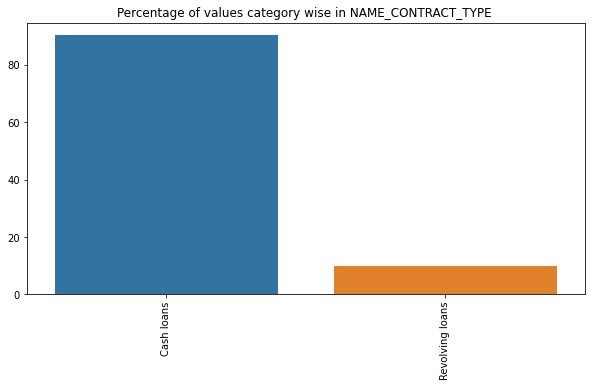

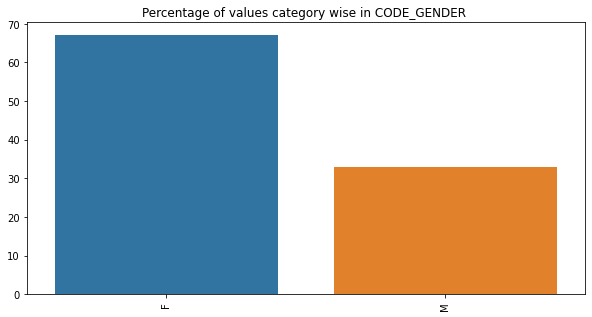

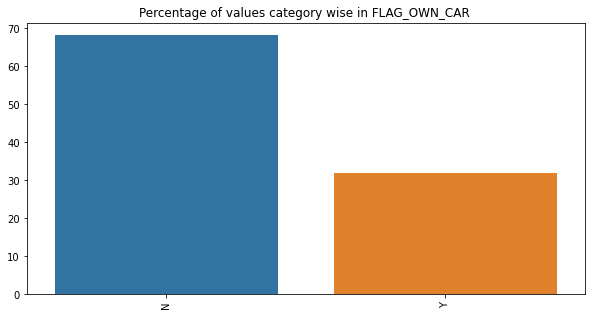

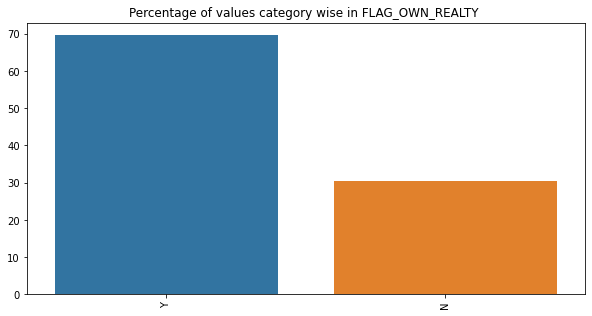

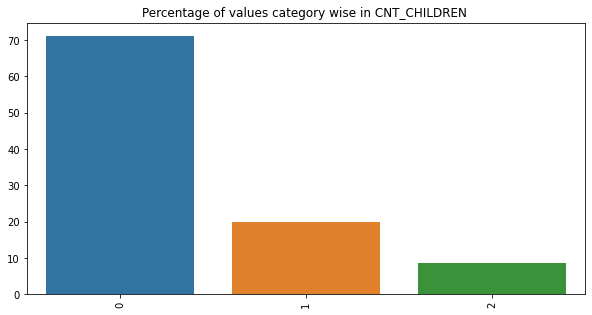

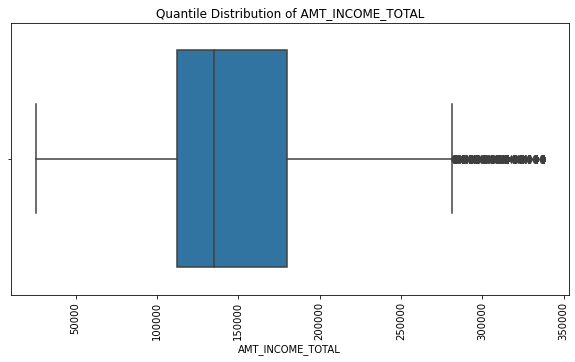

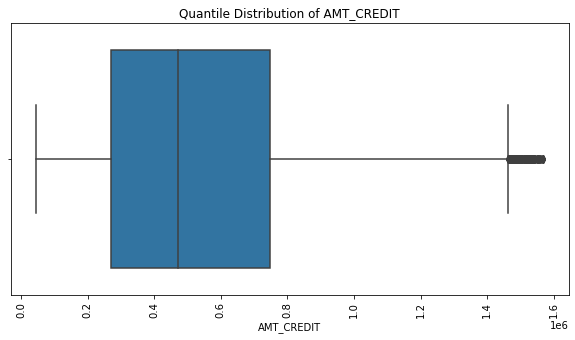

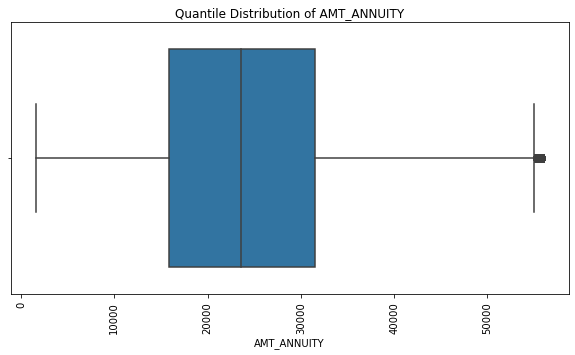

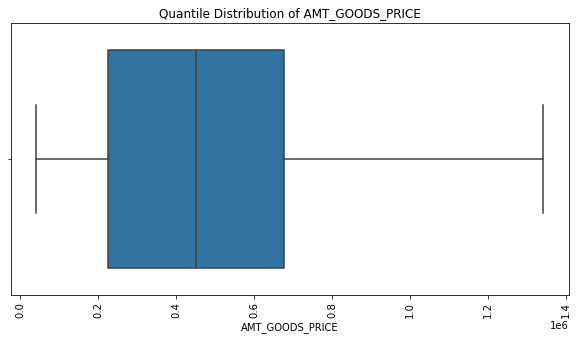

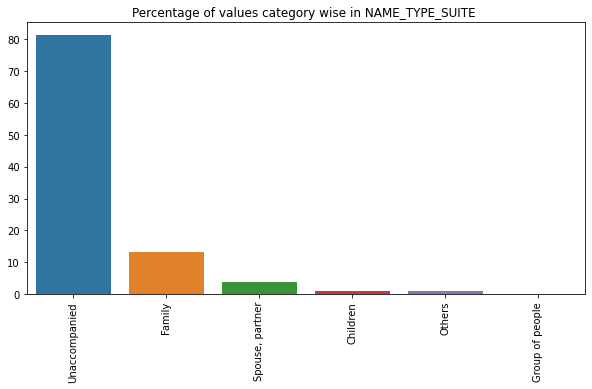

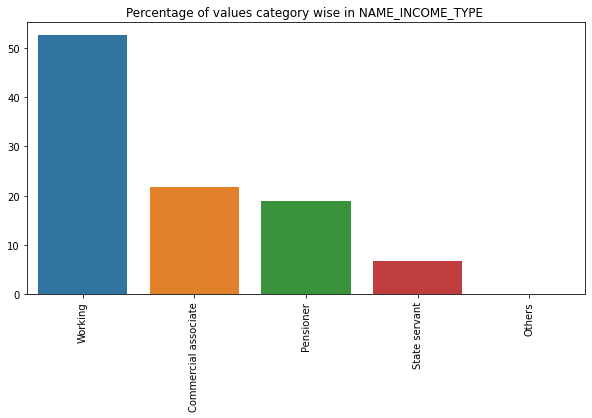

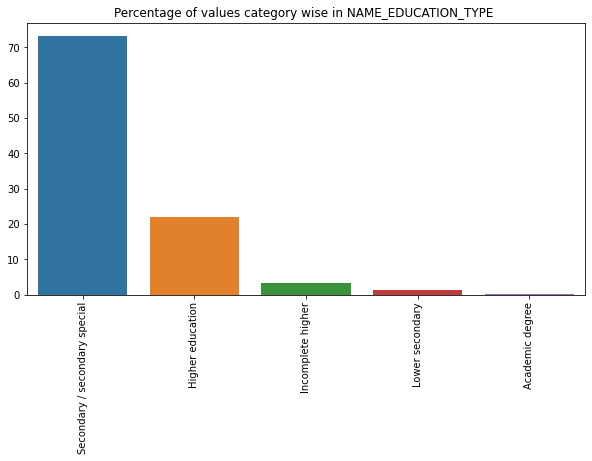

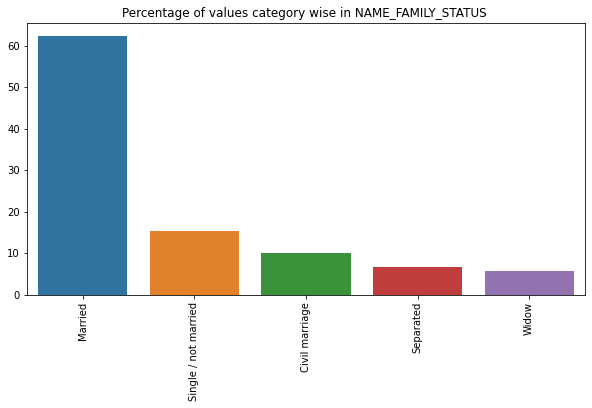

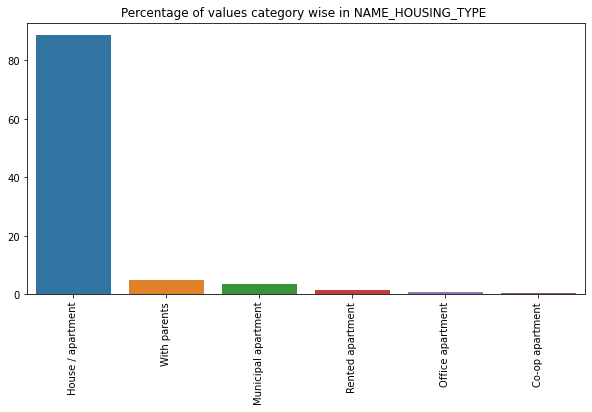

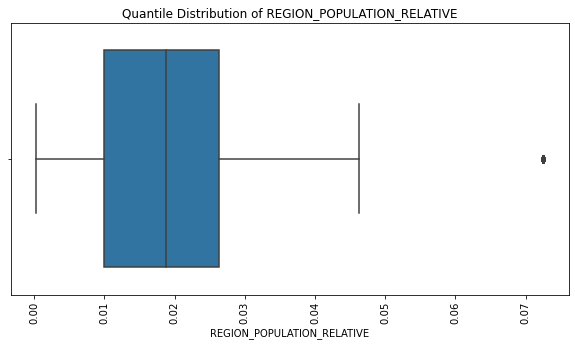

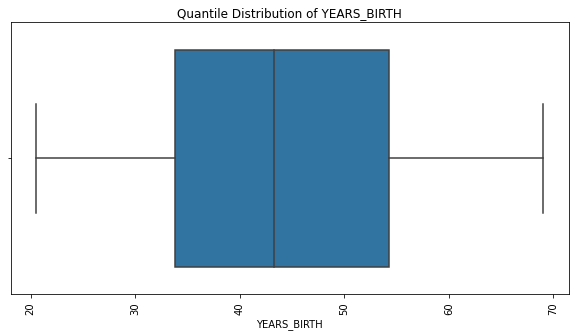

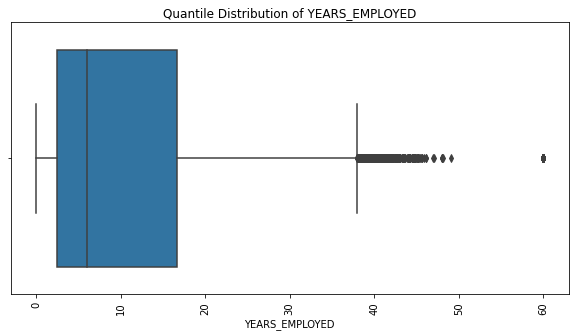

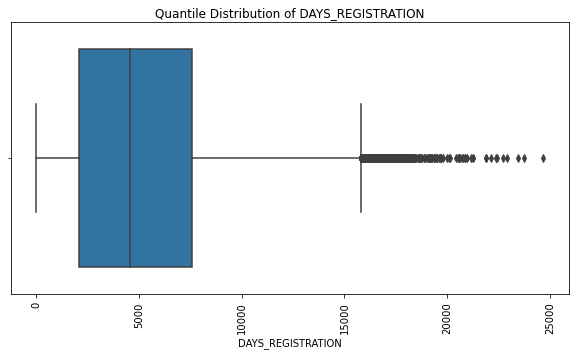

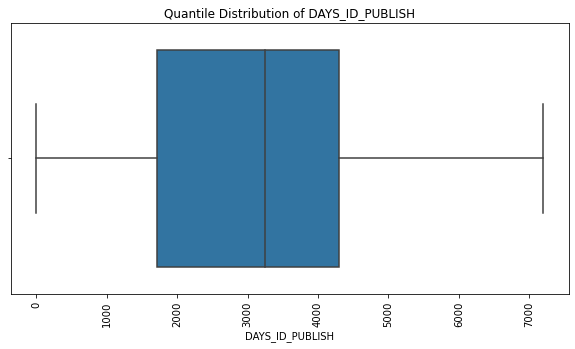

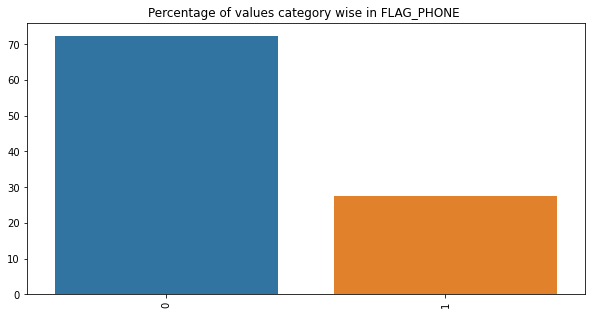

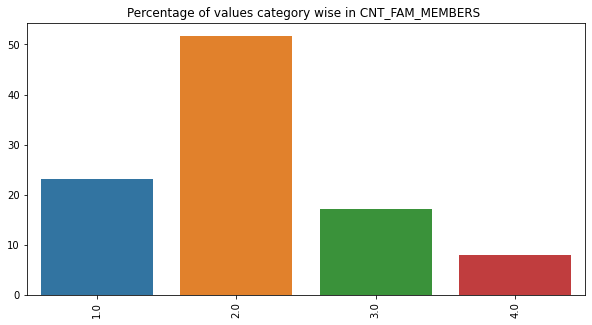

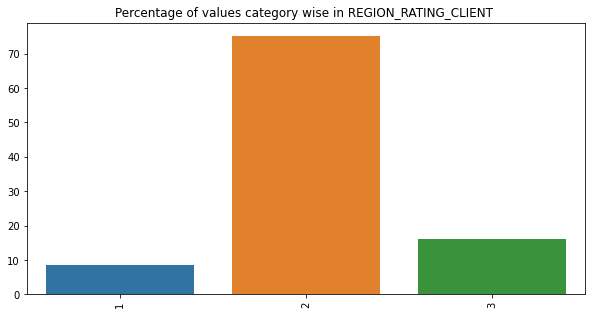

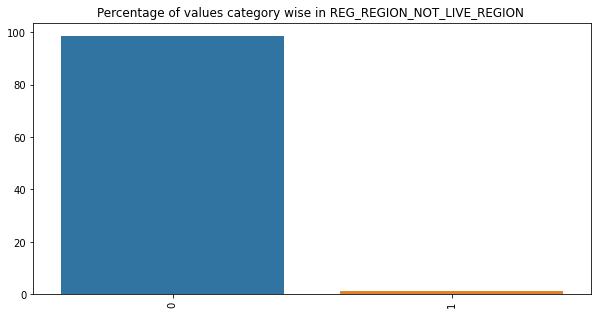

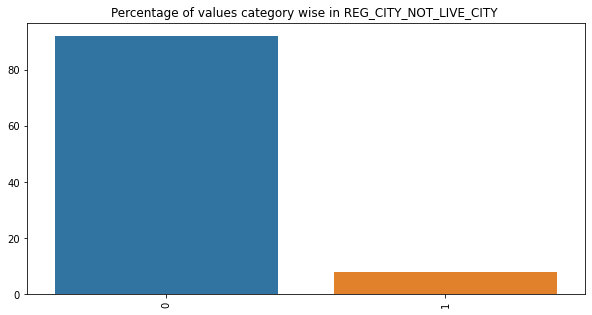

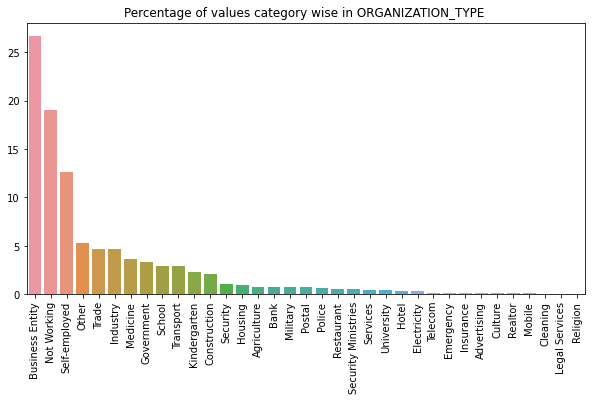

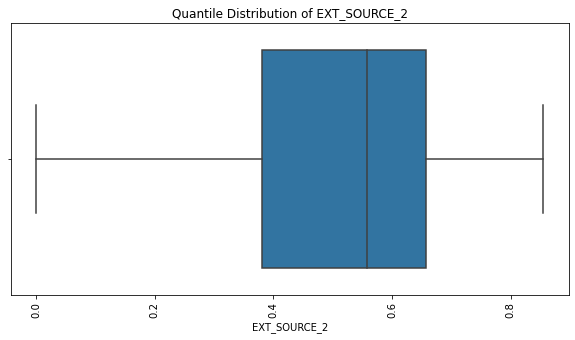

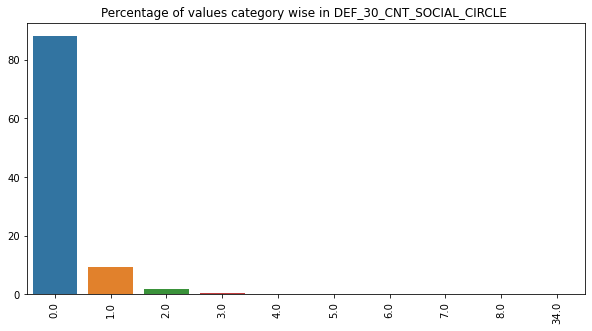

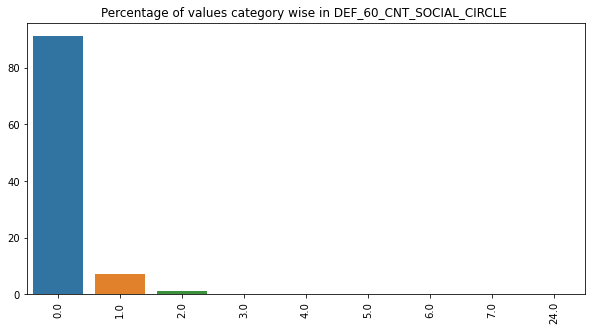

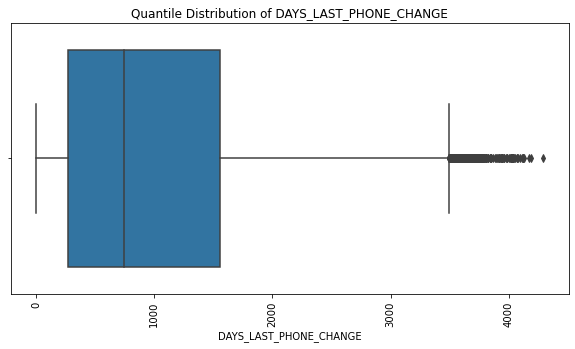

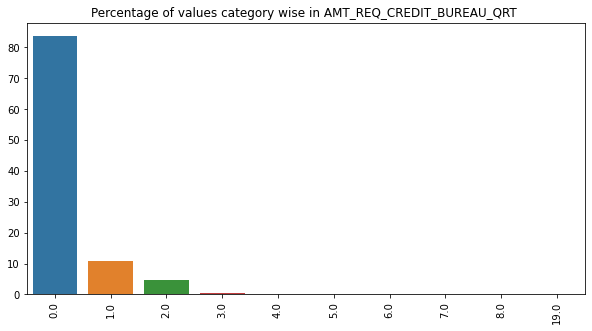

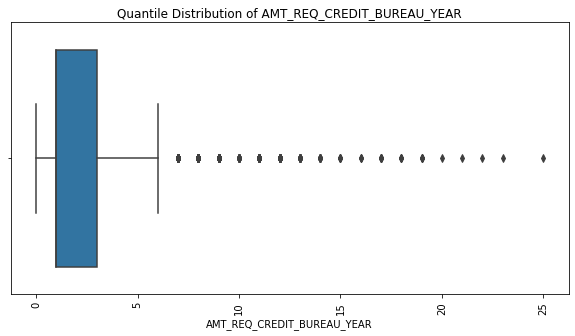

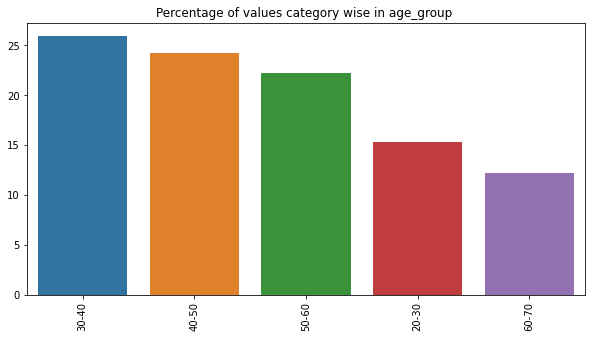

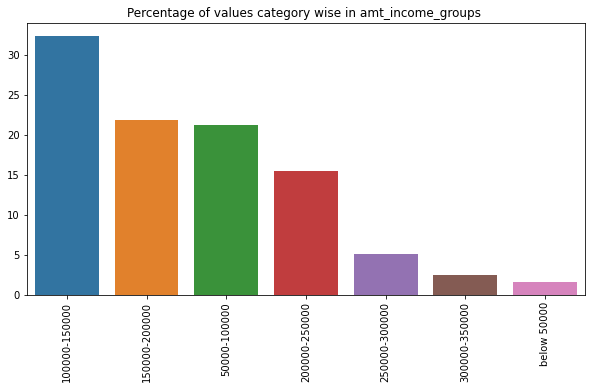

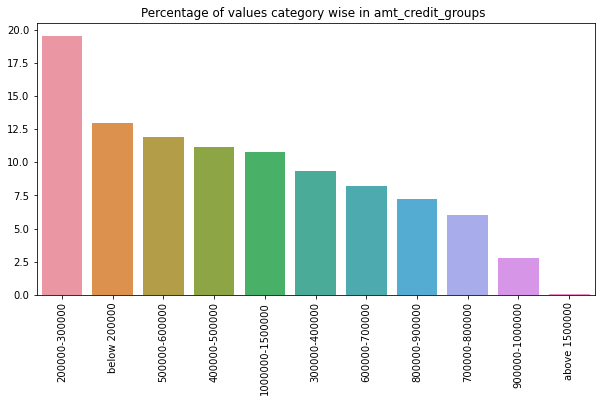

In [46]:
# Analysing the plots 

plotCount(current)

In [47]:
# Finding Data imbalance in the dataset

current.TARGET.value_counts(normalize=True)

0    0.916596
1    0.083404
Name: TARGET, dtype: float64

##### We can see that the dataset is imbalanced. The No. of Clients with Payment Difficulties is only 8% while Others are 91%. 

##### The solution is to divide the dataset into groups based on Target


In [48]:
current.shape

(272649, 36)

In [49]:
target_0 = current[current.TARGET == 0]   # Non Defaulters
target_1 = current[current.TARGET == 1]   # Defaulters

In [50]:
target_0.shape 

(249909, 36)

In [51]:
target_1.shape

(22740, 36)

## Segmented Univariate Analysis

In [52]:
# Function to Plot
# 1. Percentage category wise and Proportion category wise wrt Entire dataset(current) as Barplots for Categorical columns
# 2. Boxplots and histograms for continuous numeric columns

def plotWithProportions(df):
    for col in df.columns:
        if col not in ['SK_ID_CURR','TARGET']:
            if (df[col].dtype == 'O') or (len(df[col].unique()) <= 15):
                
                plt.figure(figsize=[20,5])
                
                plt.subplot(1,2,1) 
                cnt = df[col].value_counts(normalize=True) * 100
                sns.barplot(cnt.index,cnt.values)
                plt.title(f'Percentage of clients by {col}')
                plt.xticks(rotation=90)
                
                plt.subplot(1,2,2)
                clients = df[col].value_counts().sort_index()
                total = current[col].value_counts().sort_index()
                proportion = clients/total 
                proportion.plot.bar()
                plt.title(f'Proportion of clients by {col}')
                
            else:               
                plt.figure(figsize=[20,5])
                
                plt.subplot(1,2,1)
                sns.boxplot(df[col])
                plt.title(f'Quantile distribution of {col}')
                plt.xticks(rotation=90)
                
                min_ = int(df[col].min())
                max_ = int(df[col].quantile(0.99))
                step = int((max_- min_)/20)
                if step != 0:
                    plt.subplot(1,2,2)
                    bins = [i for i in range(min_, max_, step)]
                    plt.xticks(ticks=[t for t in bins], rotation=90)
                    sns.histplot(df[col], bins=bins)
                    plt.title(f'Frequency Distribution in {col}')
                    
                    

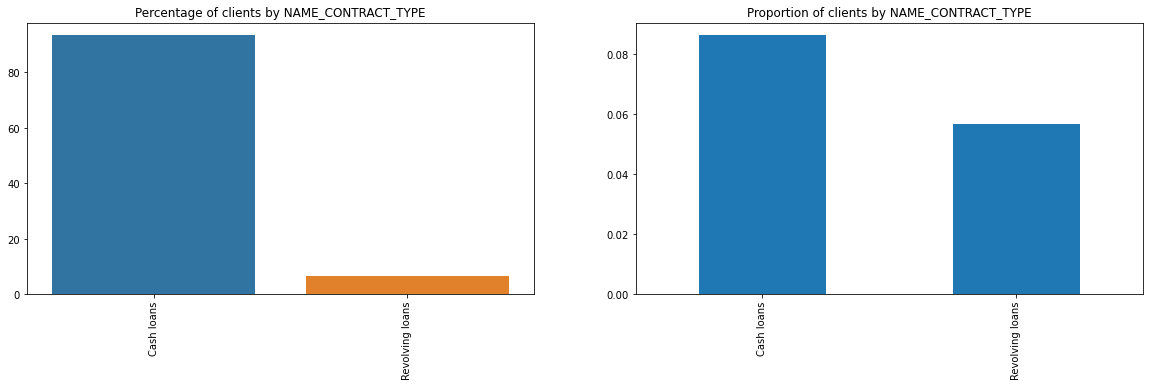

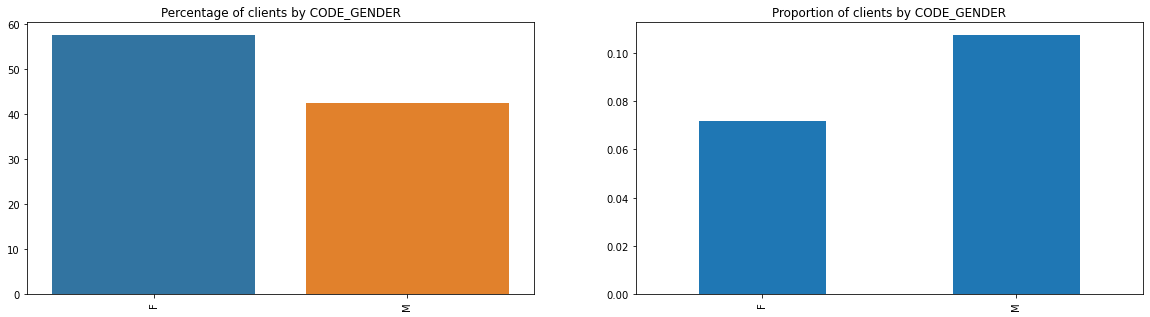

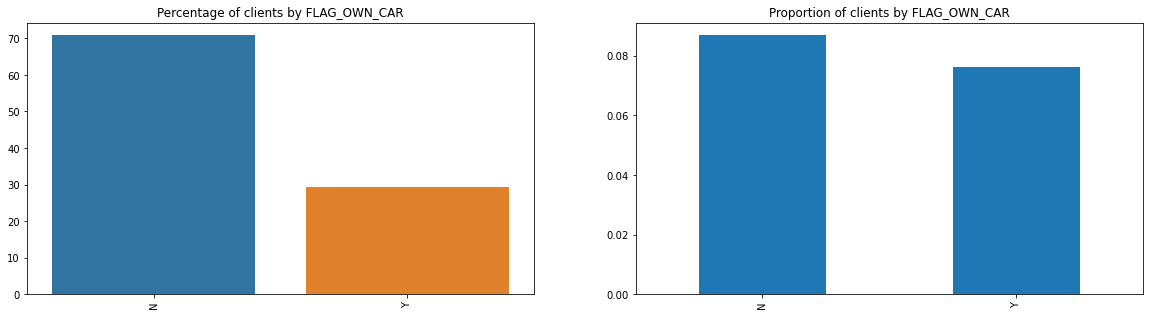

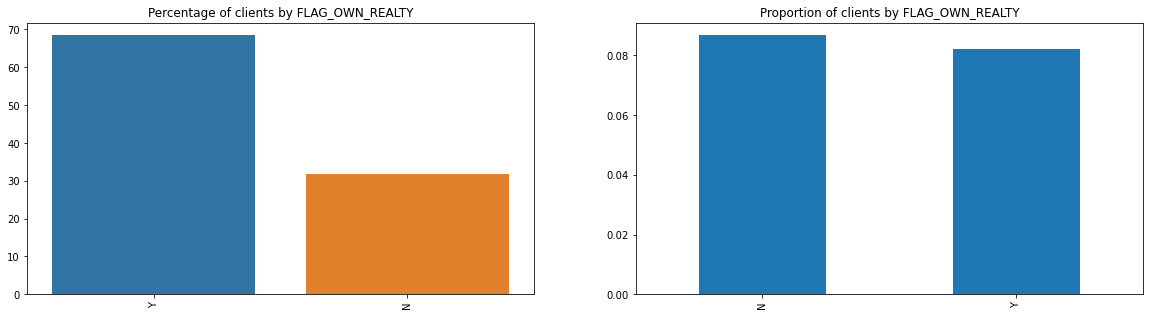

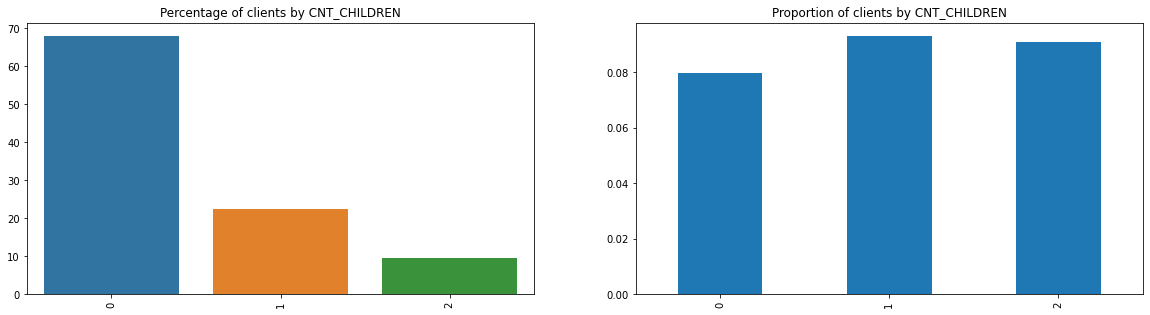

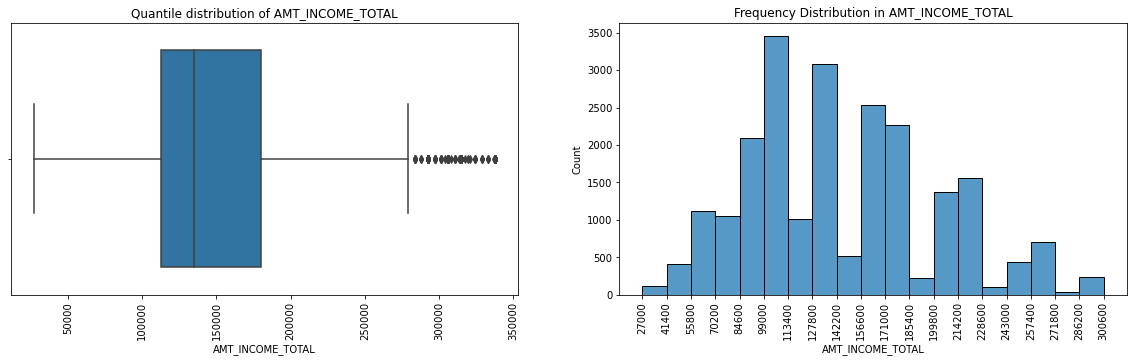

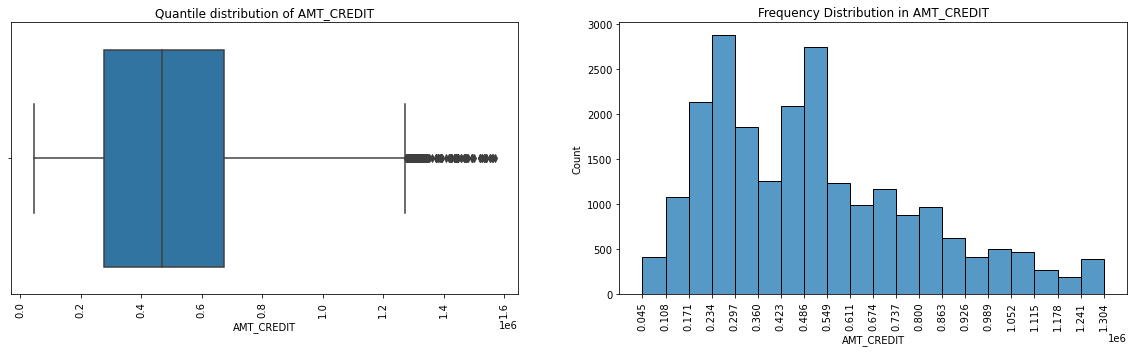

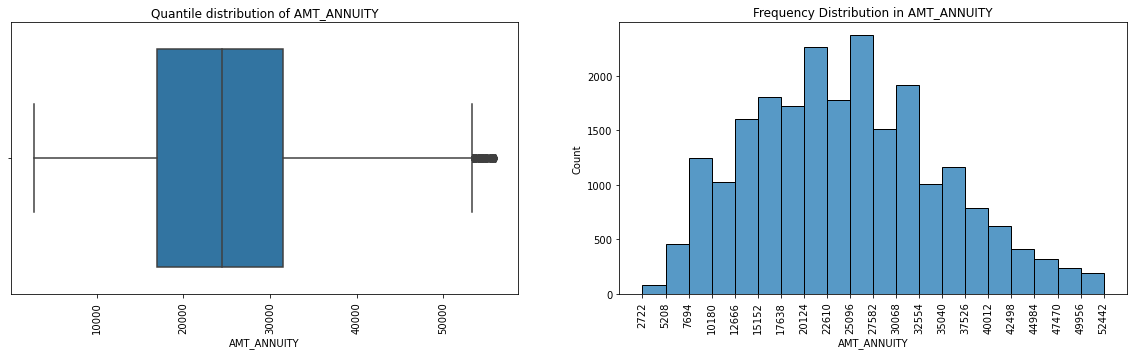

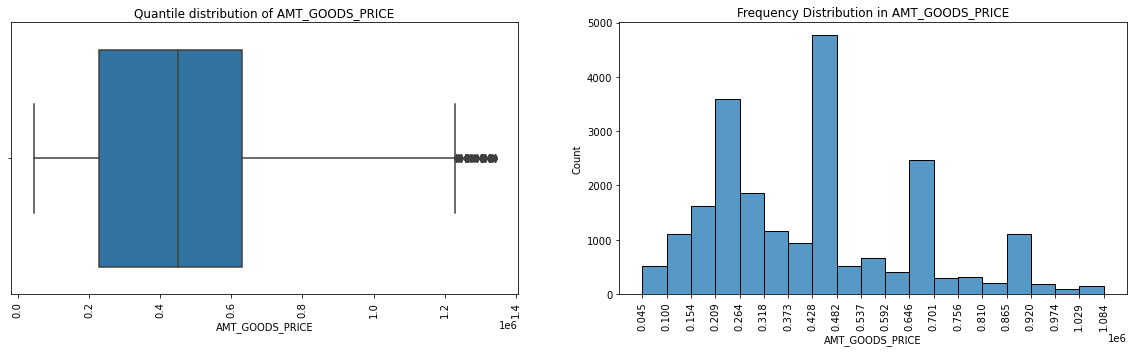

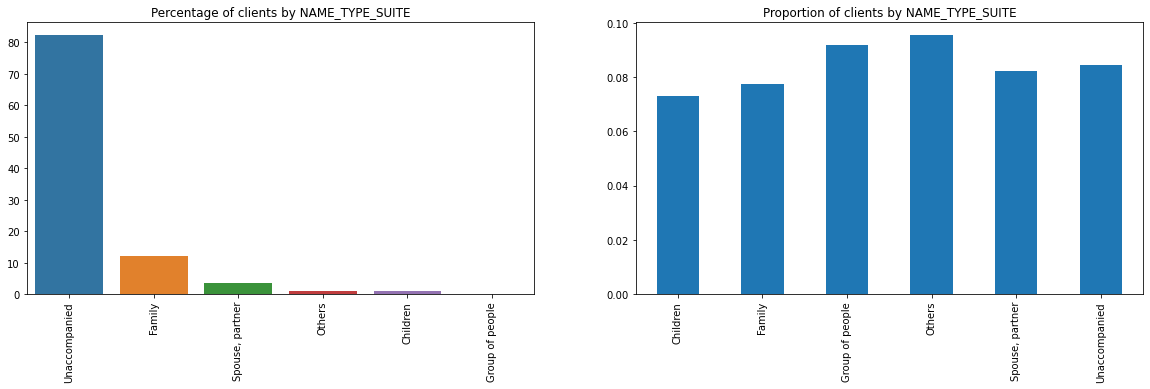

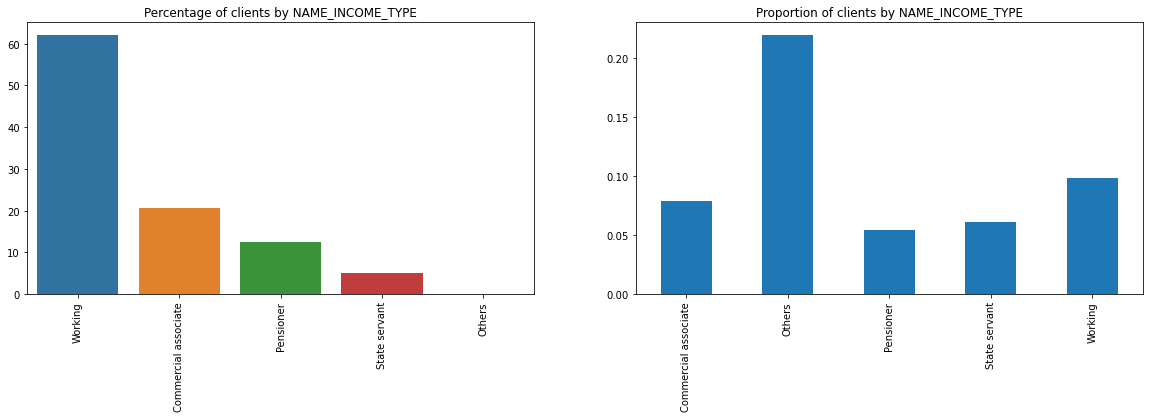

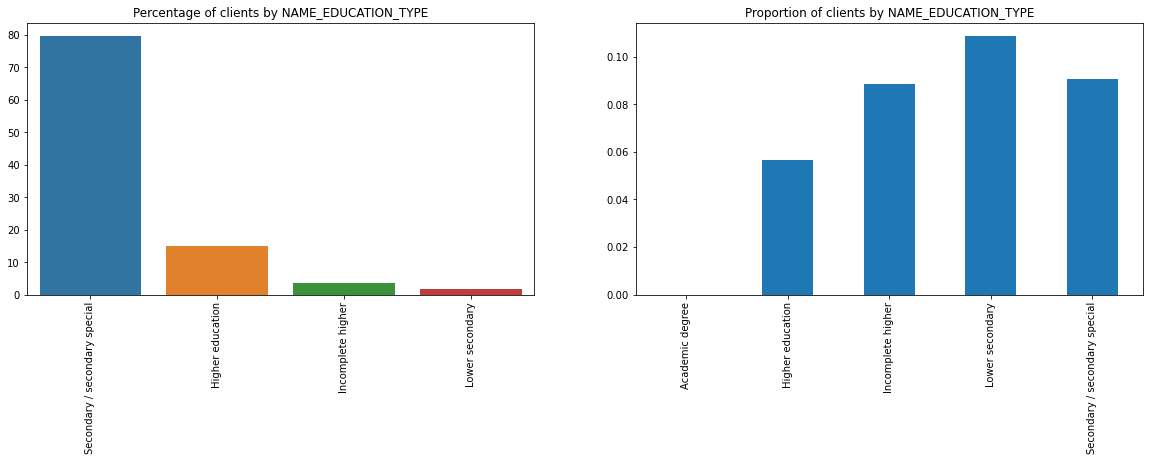

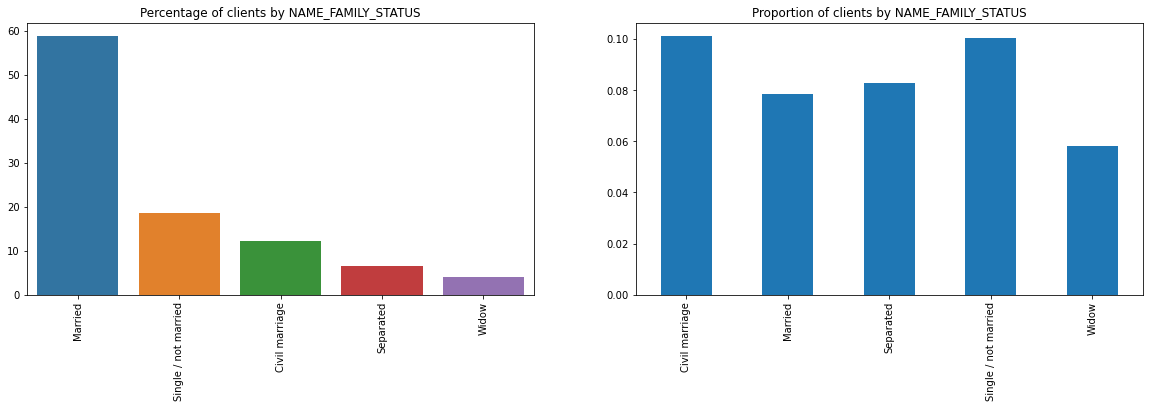

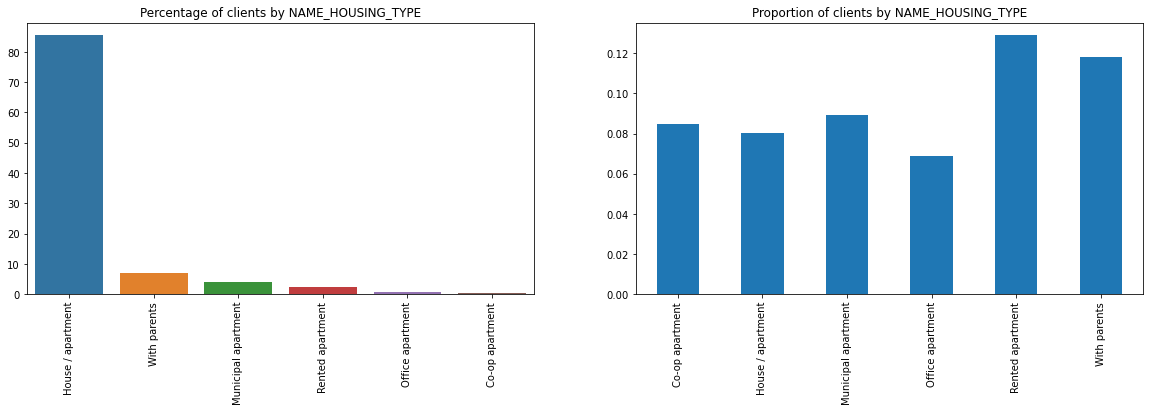

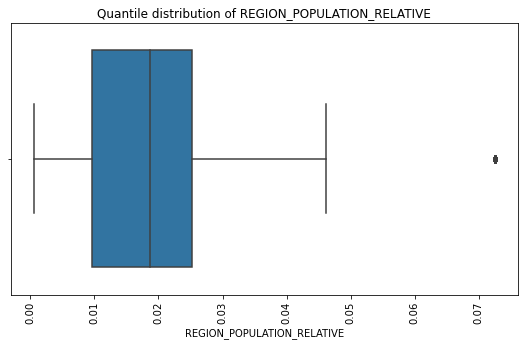

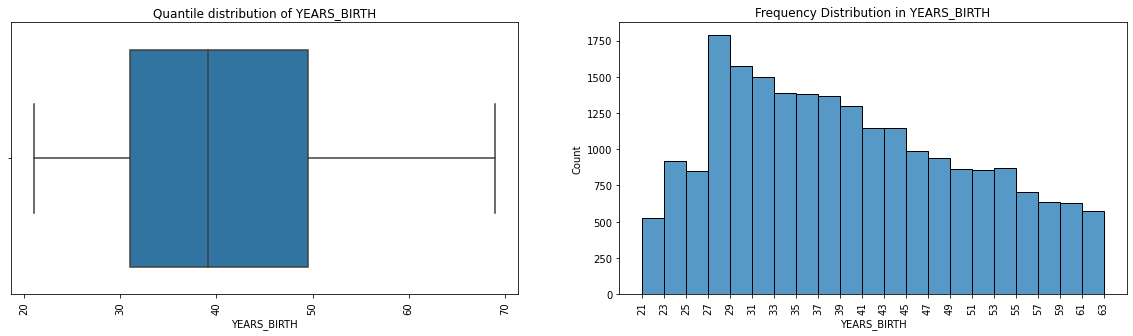

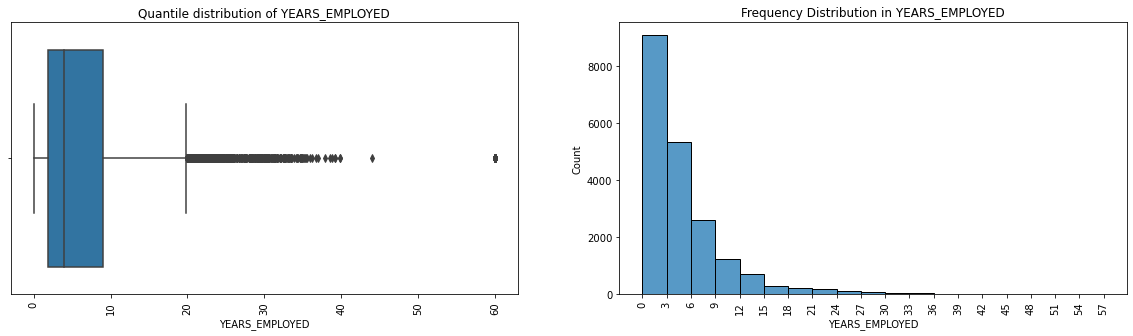

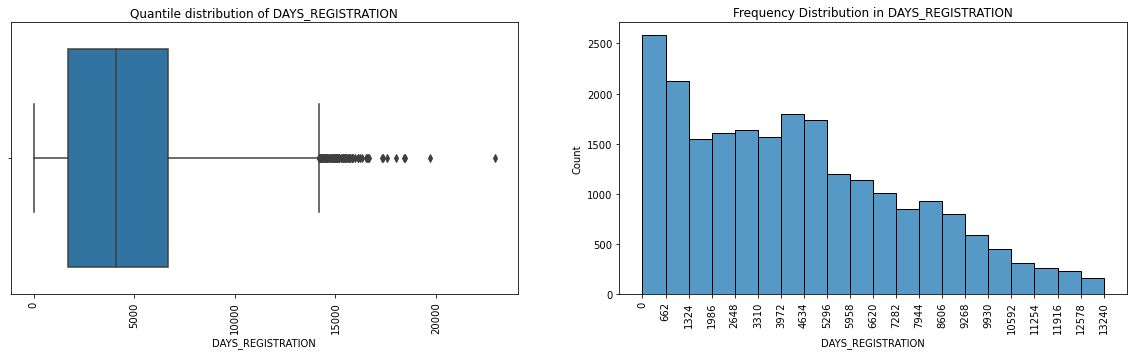

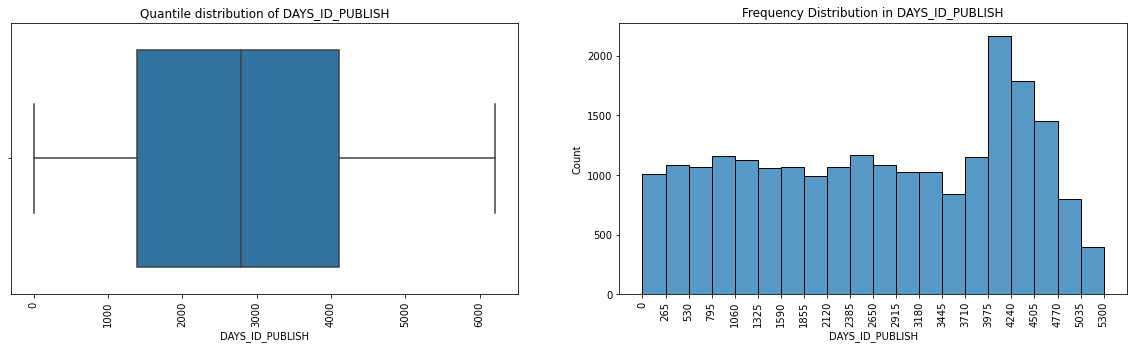

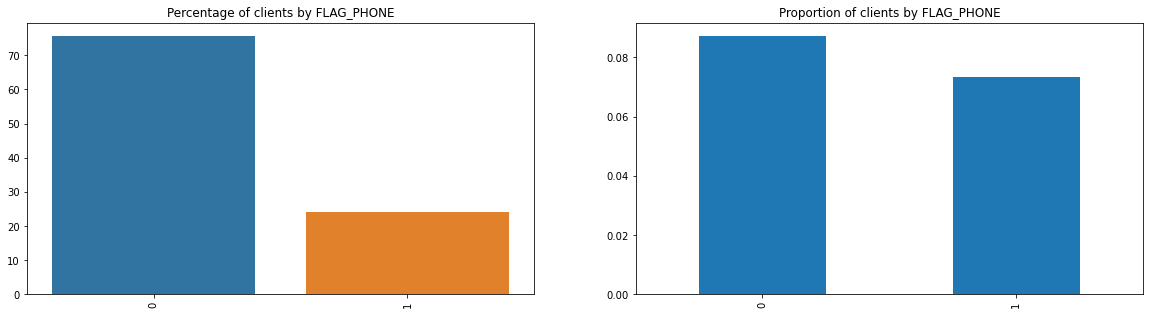

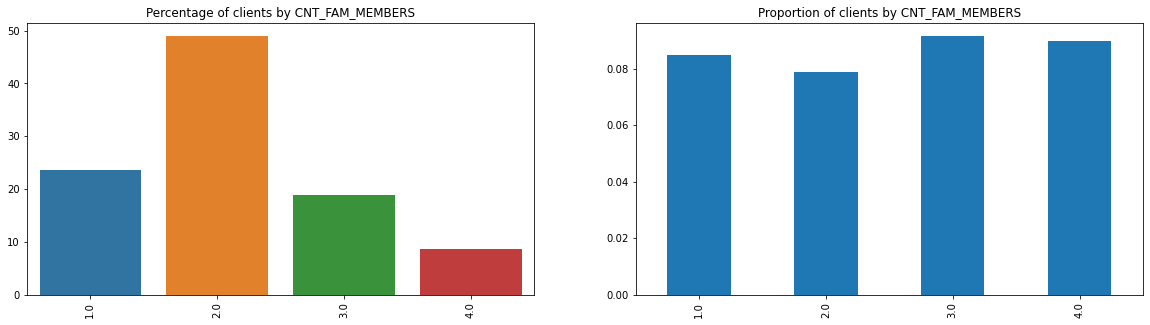

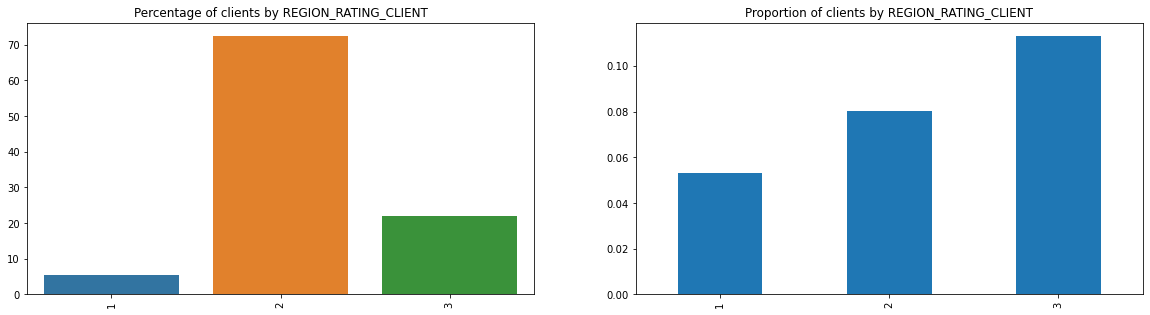

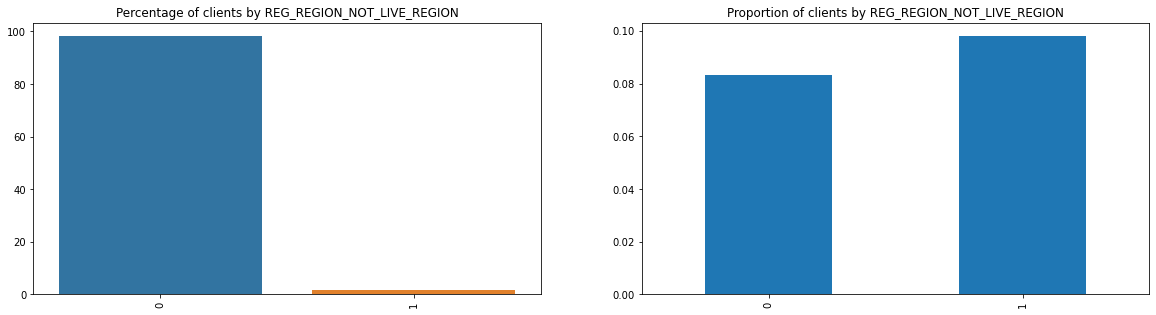

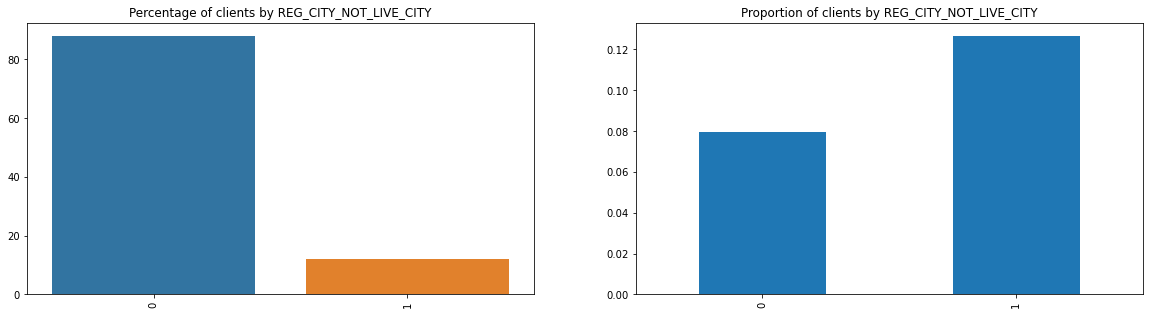

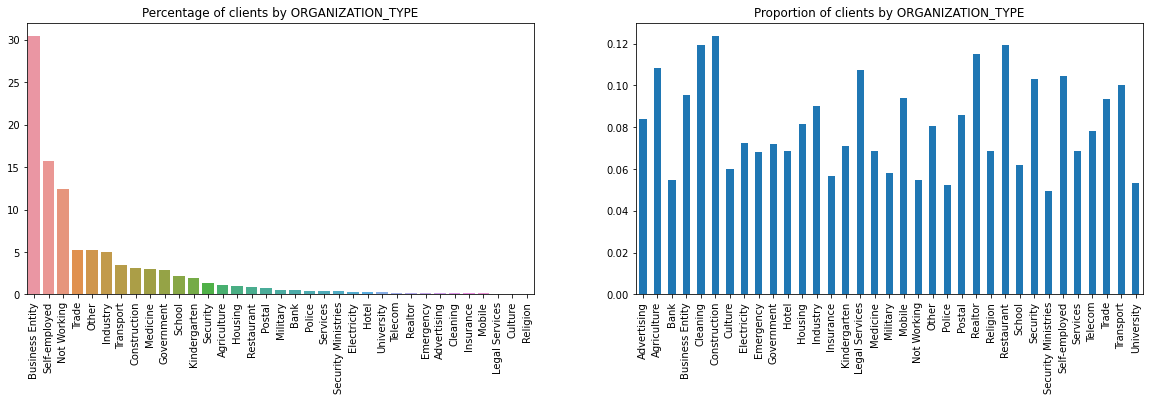

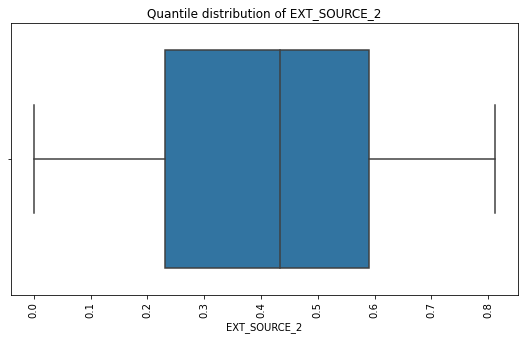

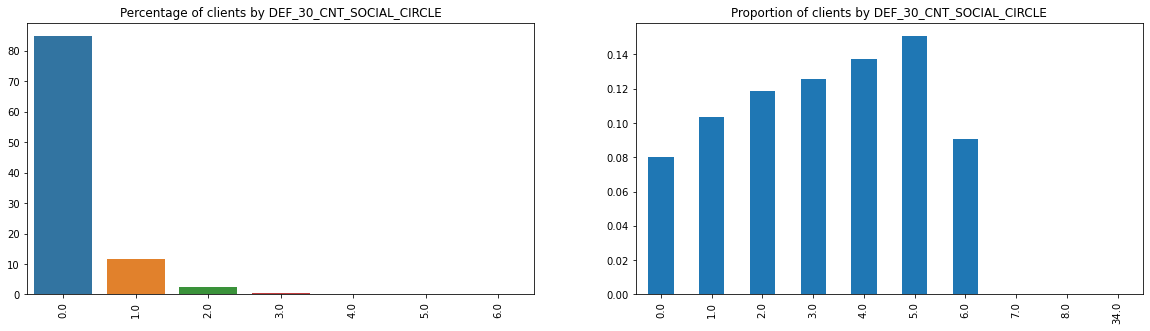

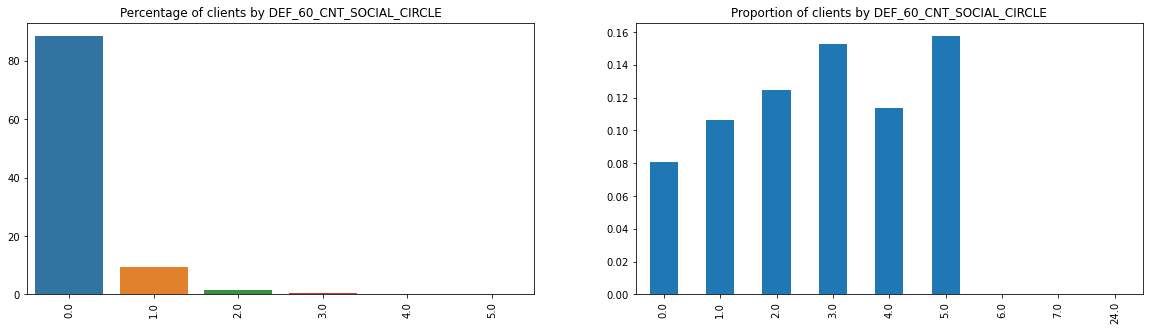

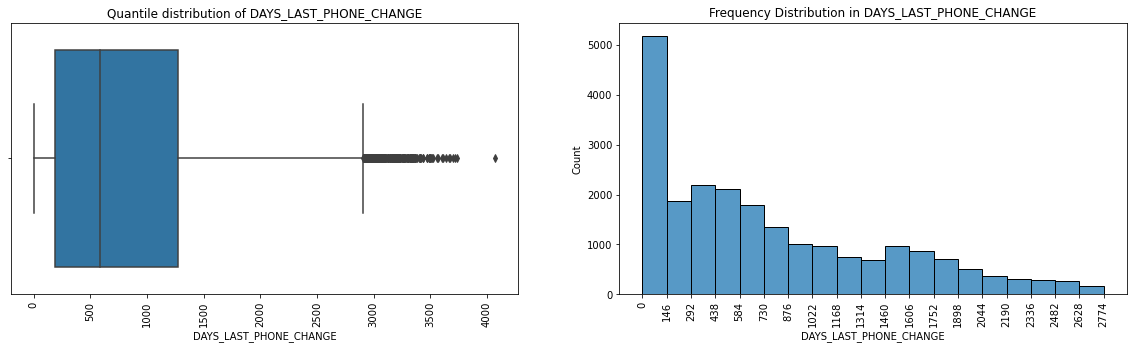

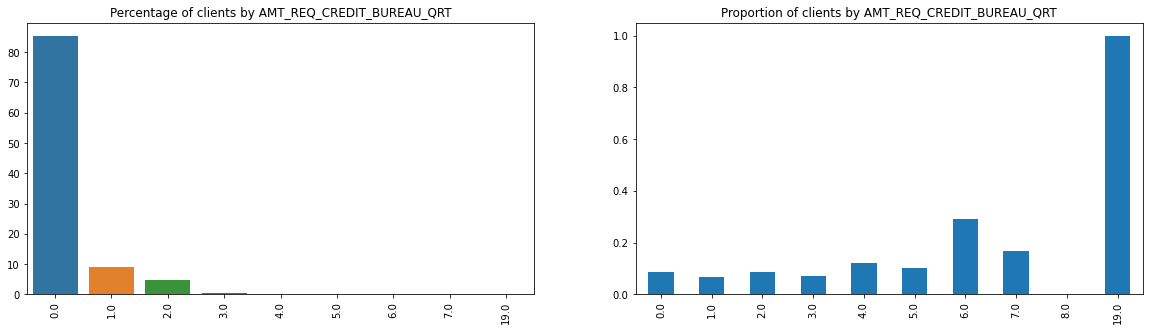

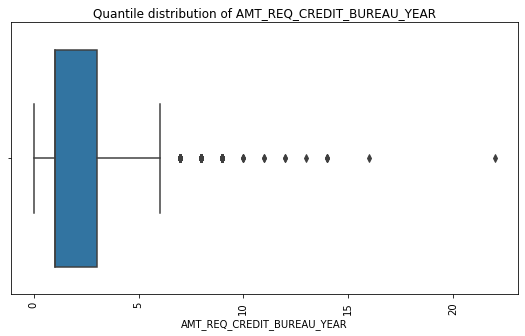

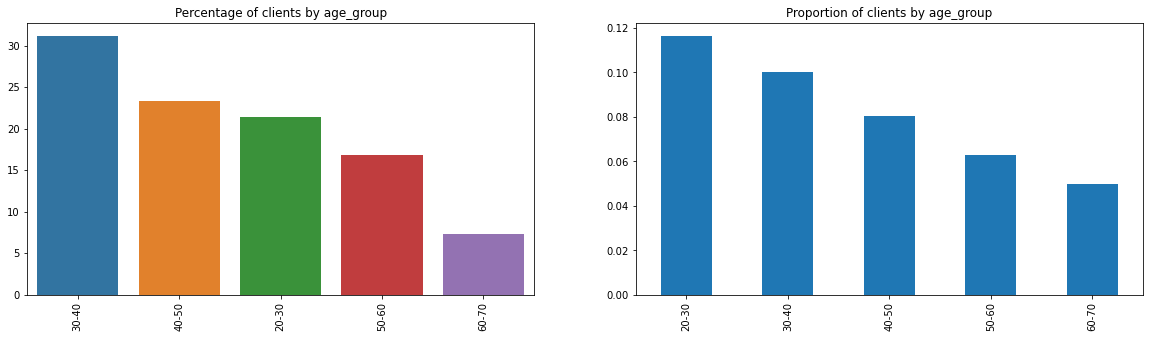

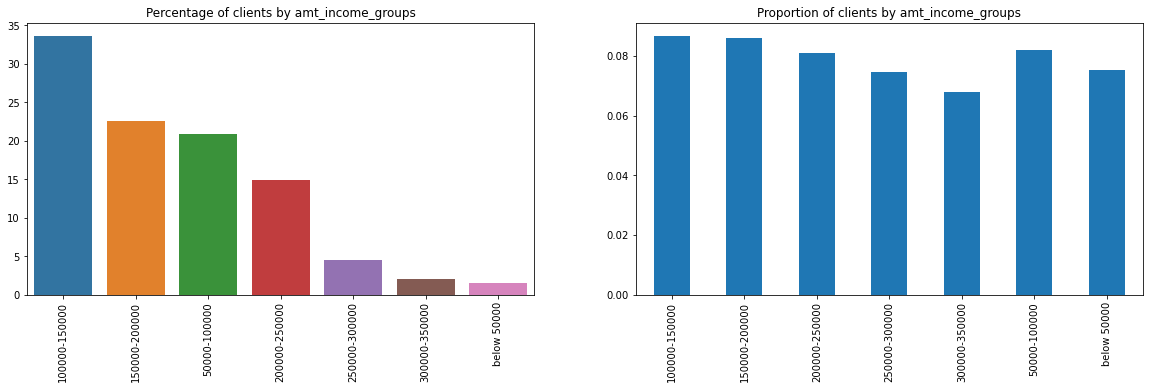

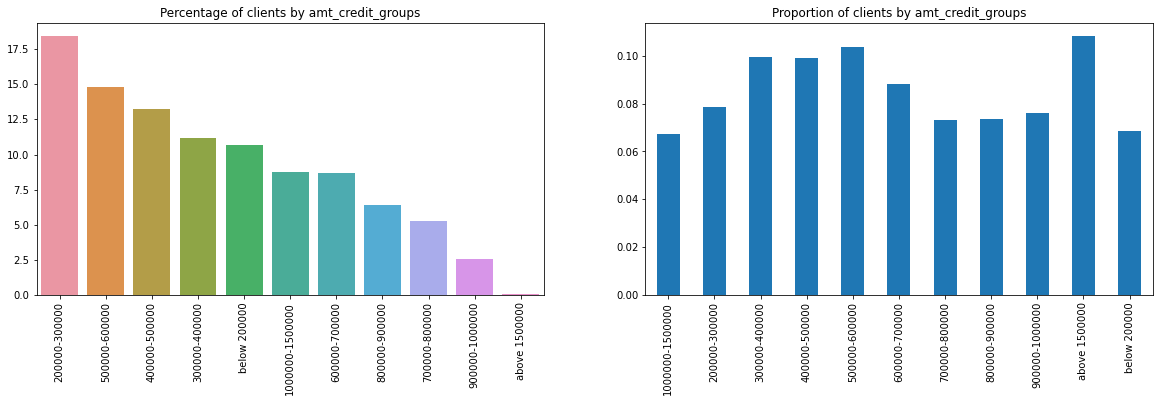

In [53]:
# plot for clients with payment difficulties (target=1)

plotWithProportions(target_1)


#### Conclusions:   
   
    Most defaulters were females but highest proportion of defaulters are from the Male gender
    
    Most defaulters owned realty but the higher proportions were of those who did not own realty.
    
    Most defaulters had 0 children but higher proportions were of those who owned 1 or more children.
    
    50% of defaulters earn below around 130000. Highest proportion of defaulters earn between 1-2 lakhs.
    Clients with higher income less likely to default
    
    50% of defaulters had credit amount below around 5 lakhs. Most defaulters had credit between 2-3 lakhs.
    But highest proportion of defaulters had Loan credit amount as 3-6 lakhs and above 15 lakhs.
    This means higher the credit amount, higher the chance to default.
    
    Most defaulters were unaccompanied but higher proportions were accompanied by Others or Group of people.
    
    Most defaulters are working but higher proportions from Others (Student, Businessman, Unemployed). 
    Pensioners have the lowest proportion.
    
    Most defaulters are Married but highest proportion of defaulters are from the Civil Marriage and Single category and 
    proportion is low for widows

    Higher proportions of defaulters are living with parents or living in rented apartments.
    
    Highest proportion of defaulters are having more than 3 family members 

    Most defaulters have Secondary level education, but highest proportion of defaulters are from Lower secondary level
    and the proportion is low for clients with Higher education. No defaulters were with an Academic degree.
    This means more educated people are less likely to default.

    Highest proportion of defaulters are from the Construction, Restaurant, Cleaning, Agriculture industries. 
    Lowest proportion is from University, Police, Security ministries and Bank industries.

    50% of defaulters are below 40 years of age. Most defaulters are in 30-40 age group but highest proportion 
    of defaulters are from the 20-30 age group. 
    We can see that people with higher ages are less likely to default. 


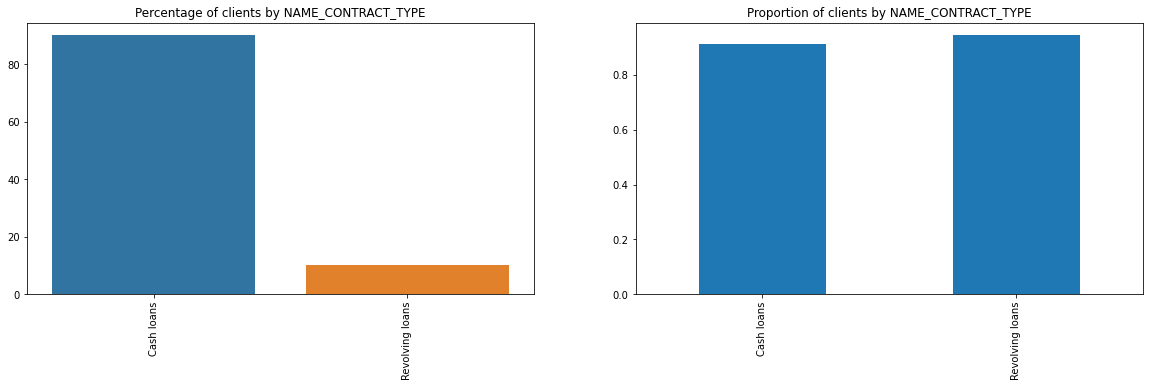

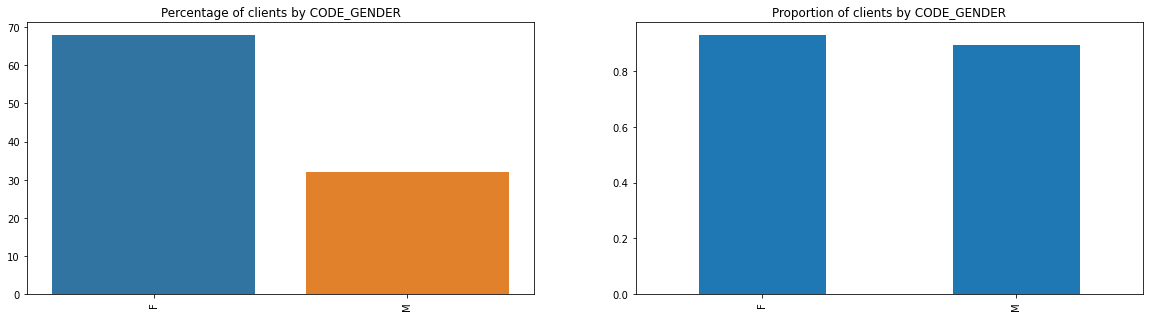

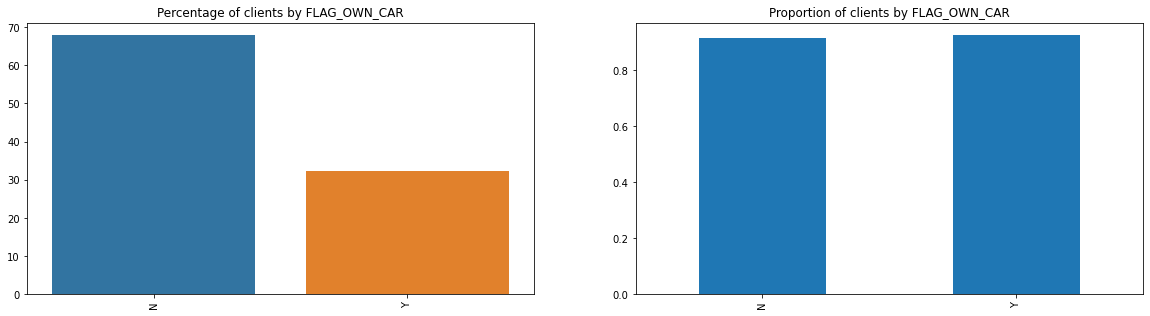

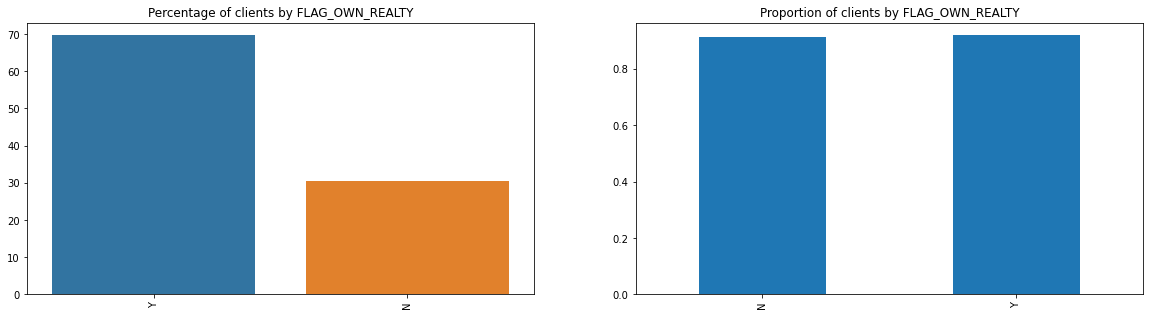

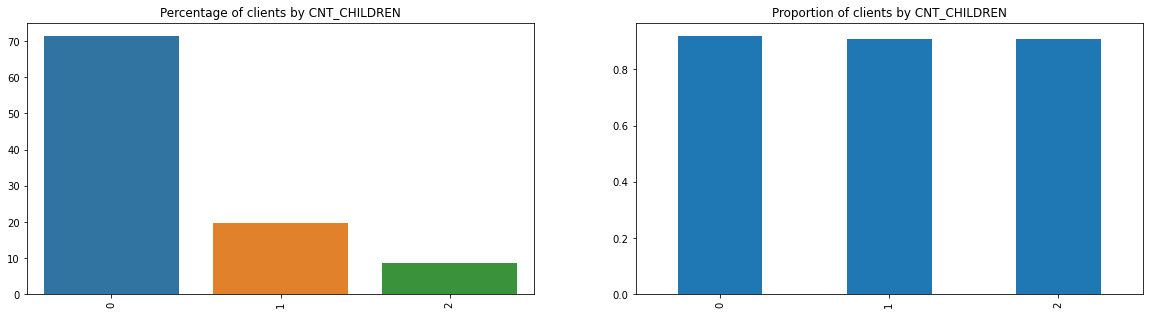

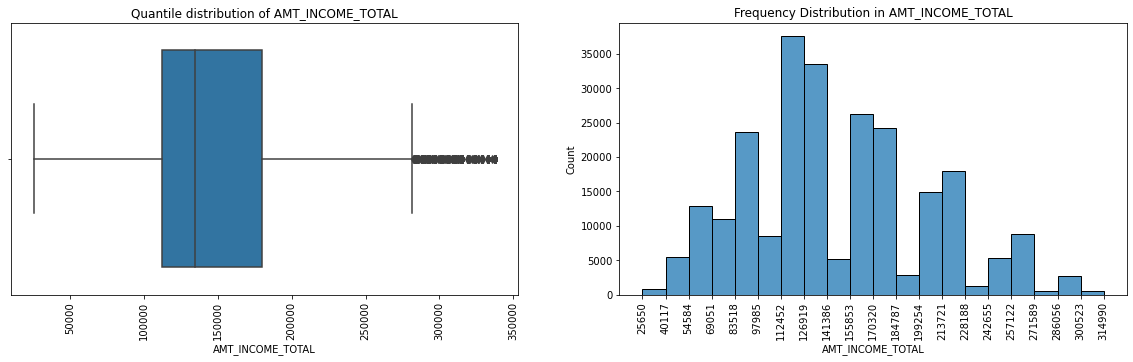

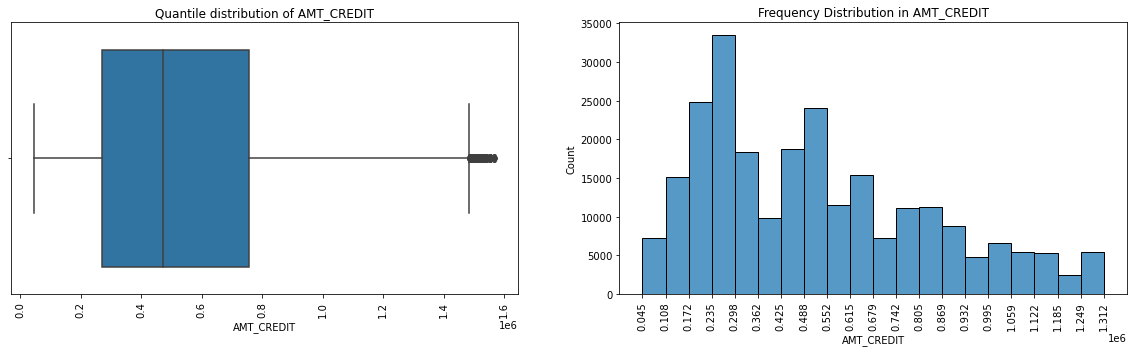

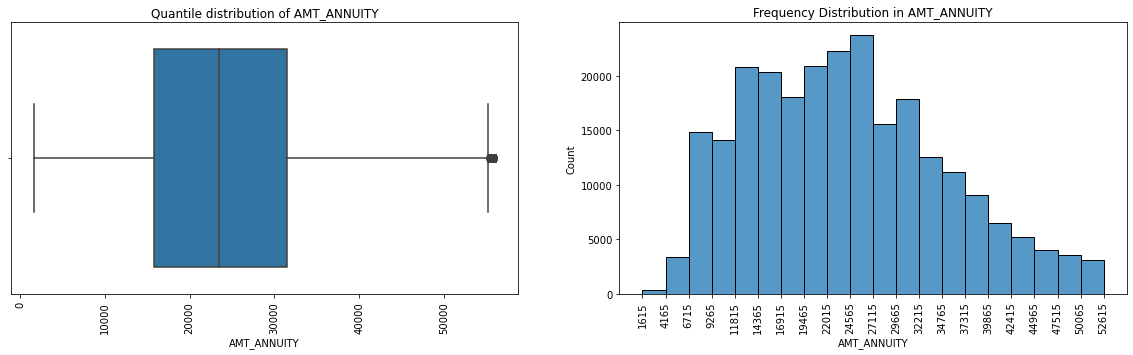

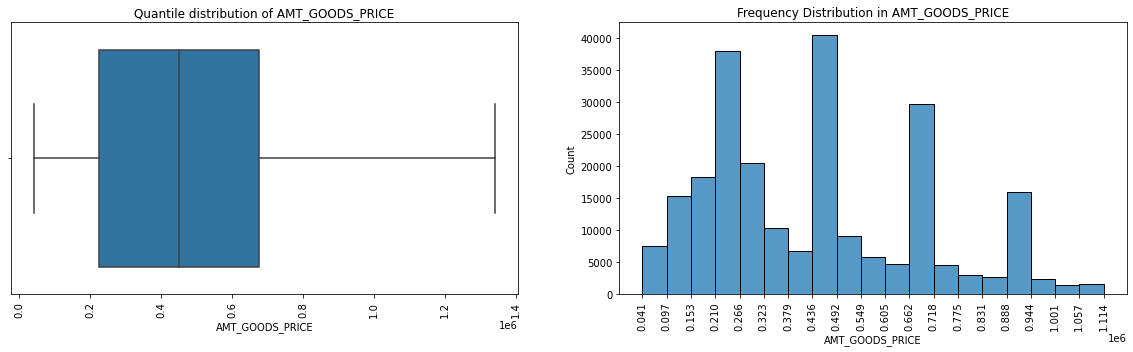

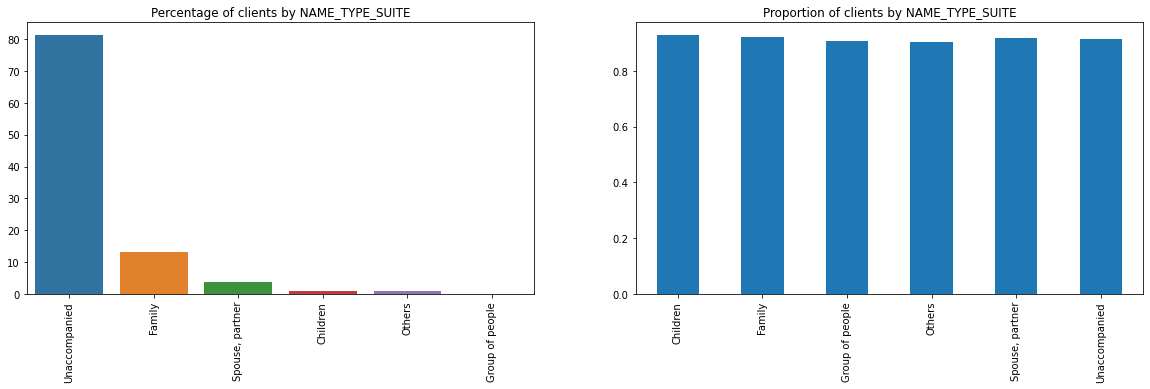

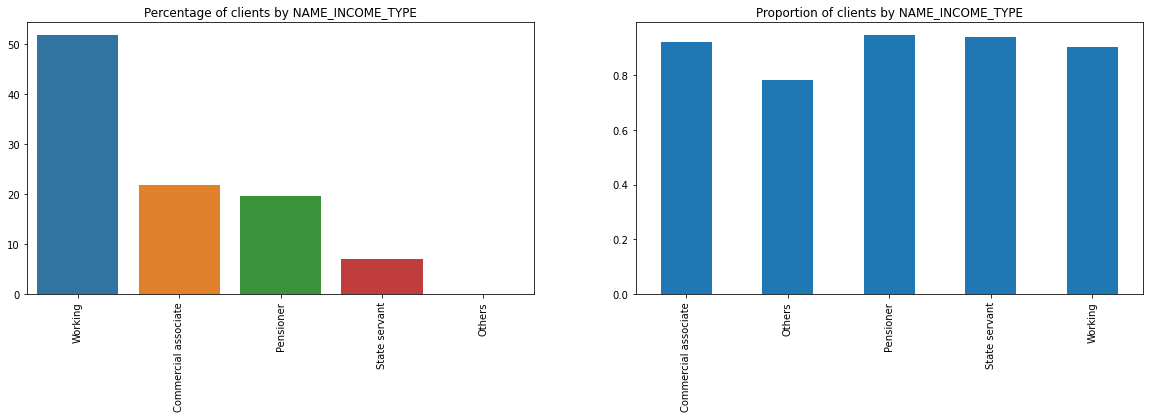

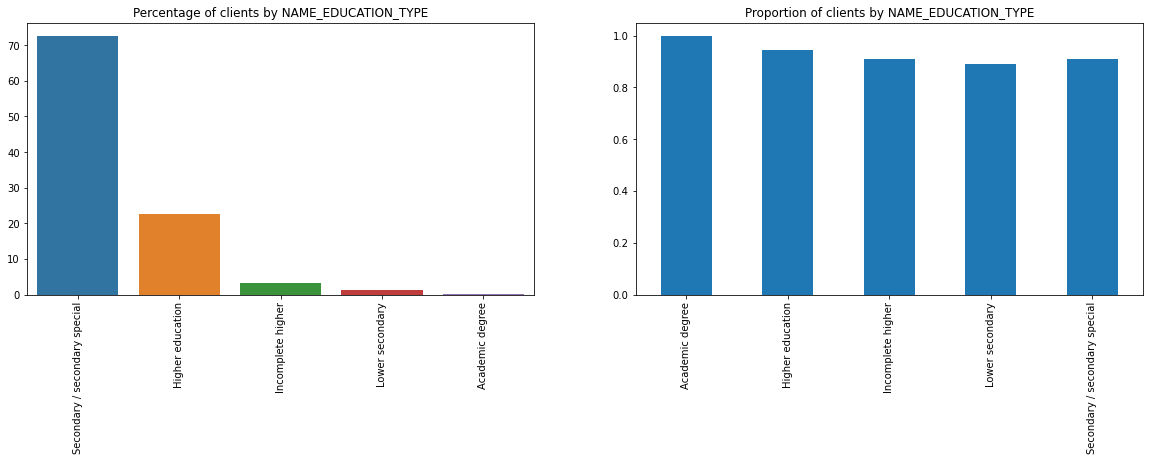

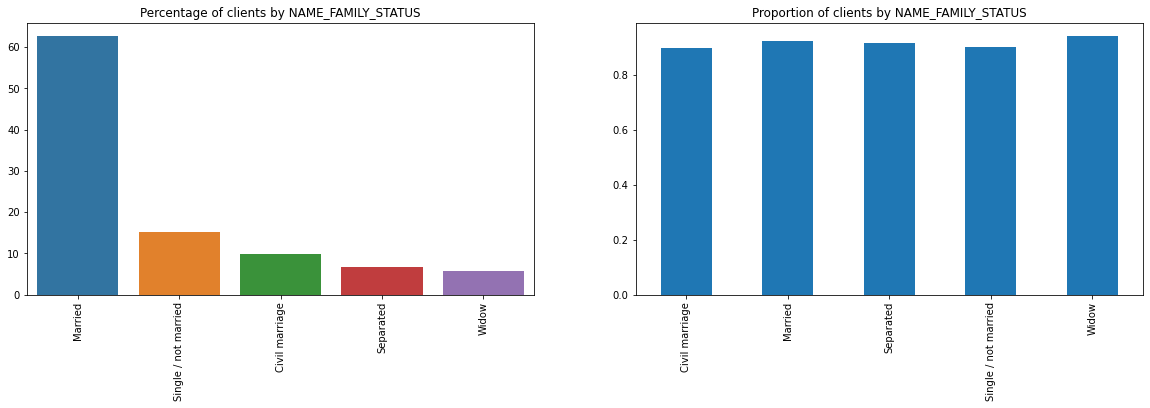

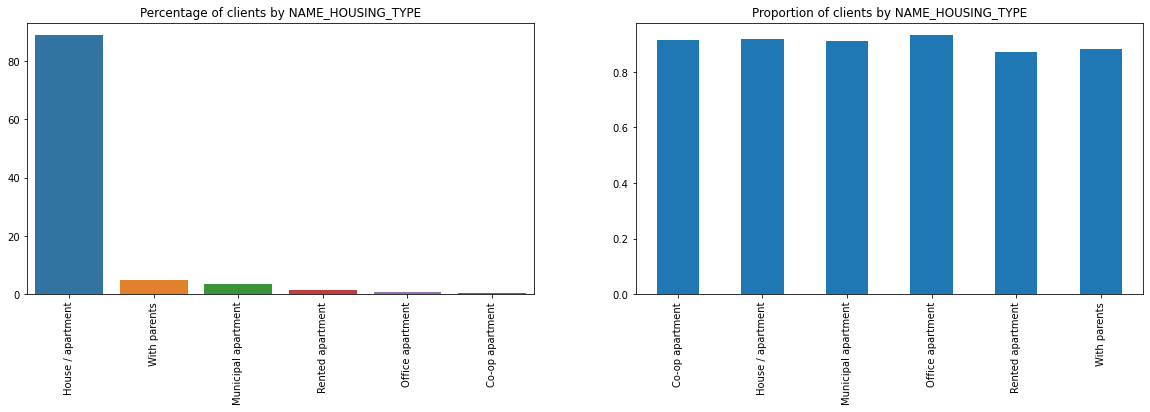

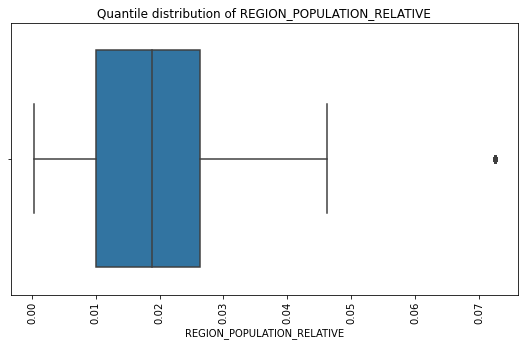

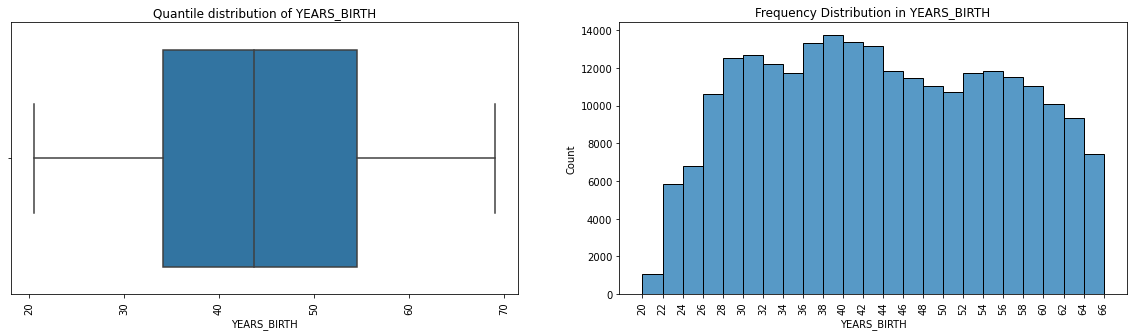

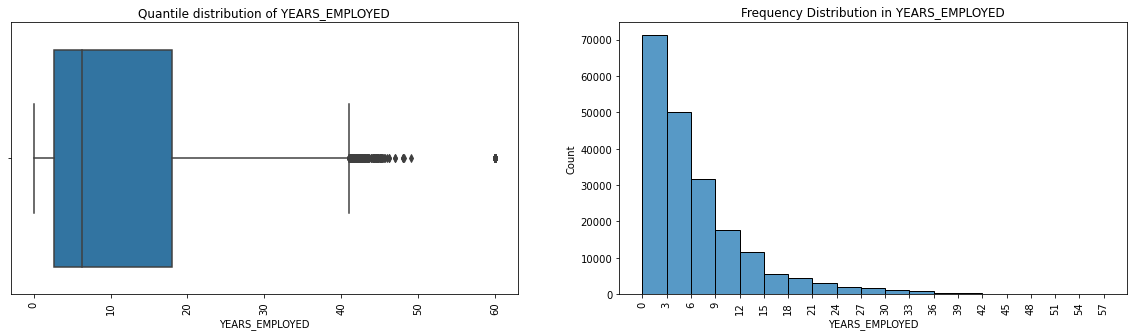

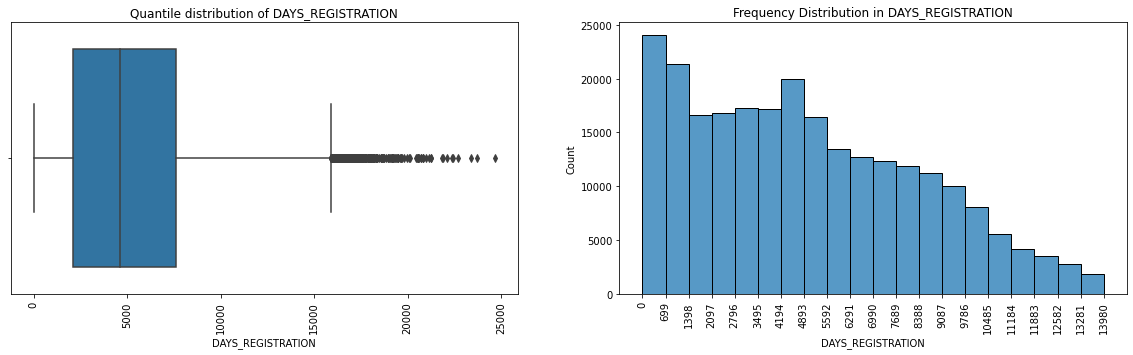

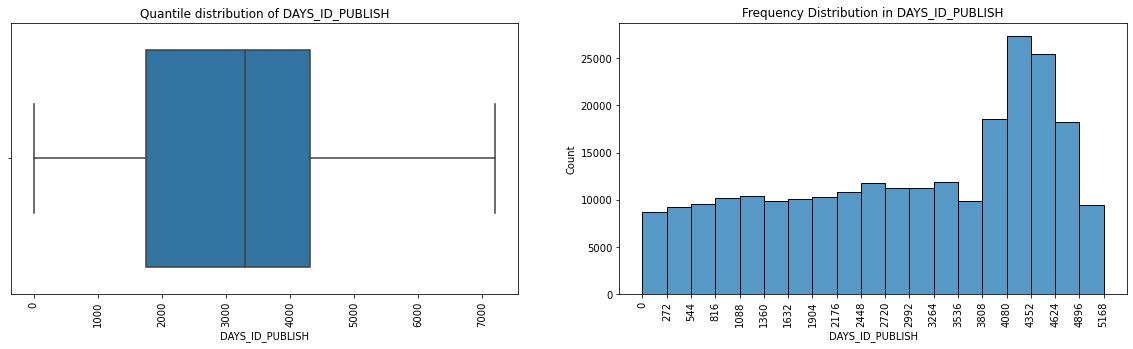

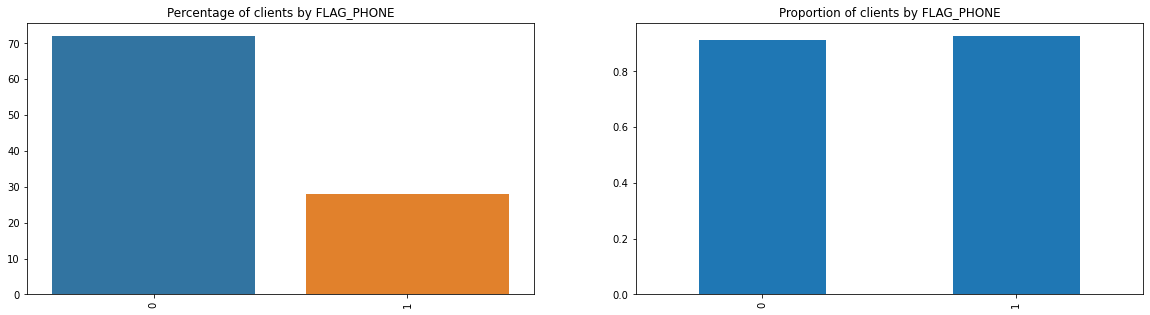

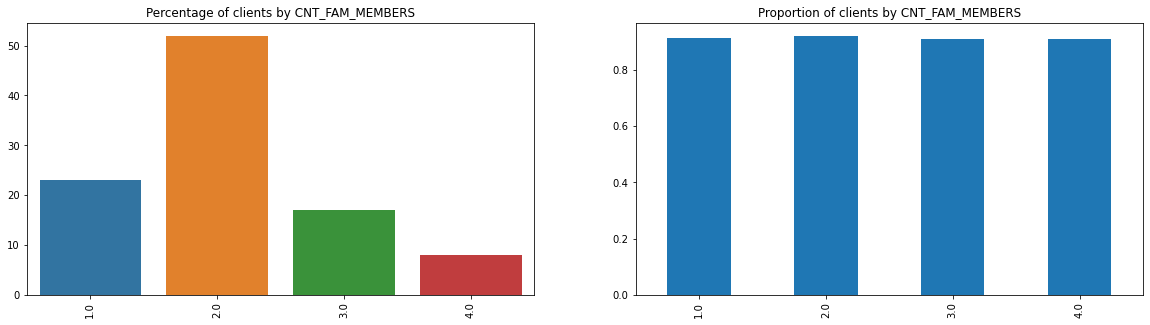

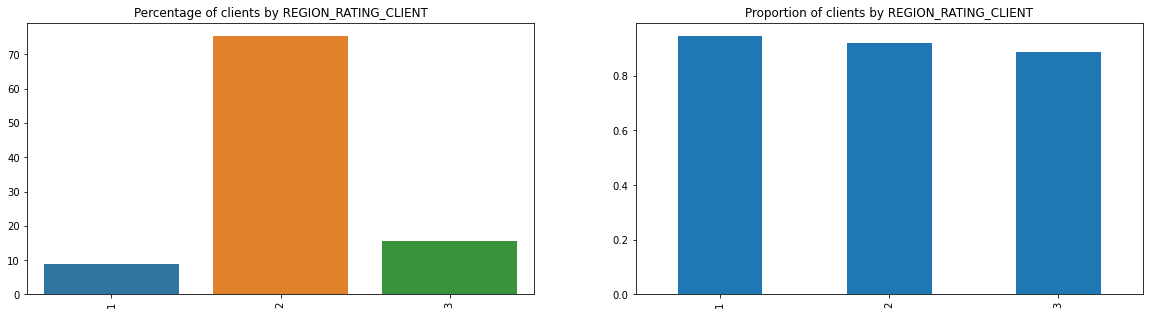

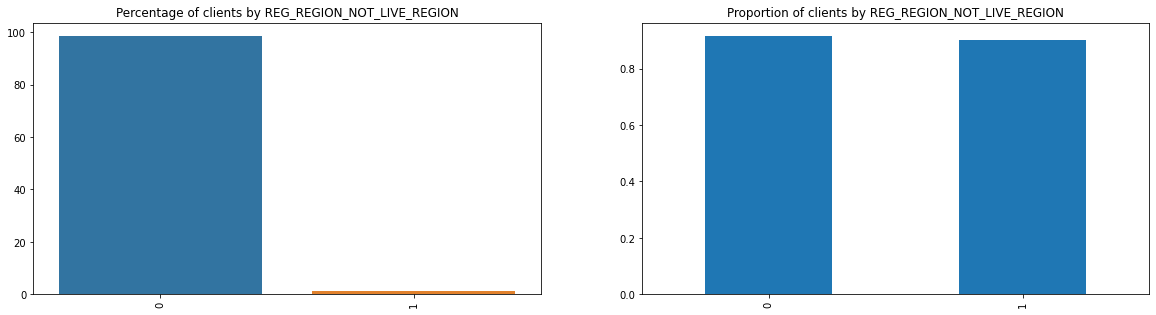

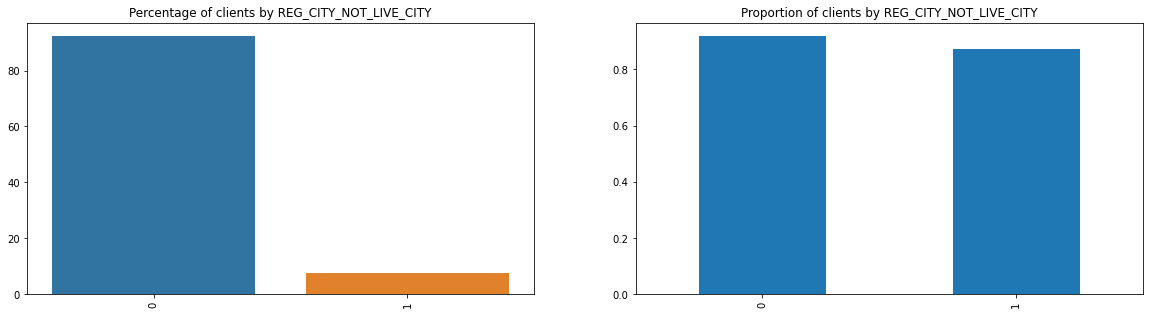

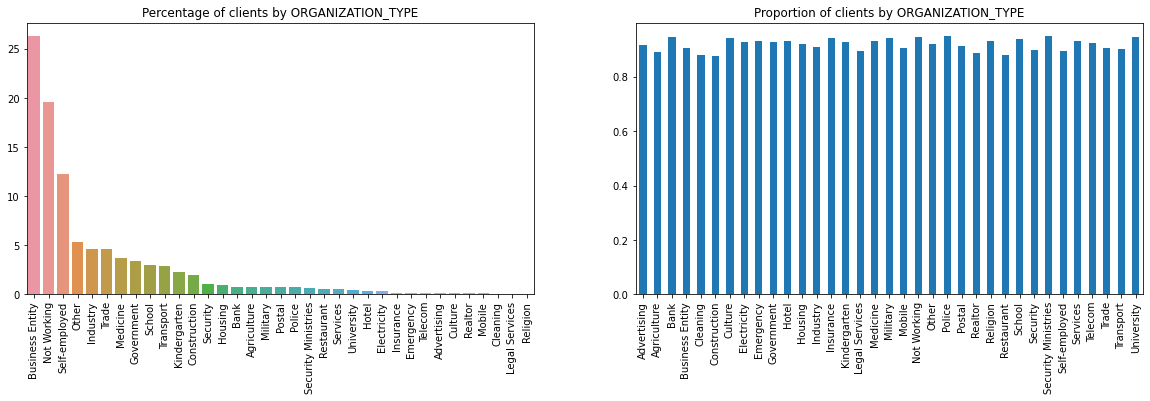

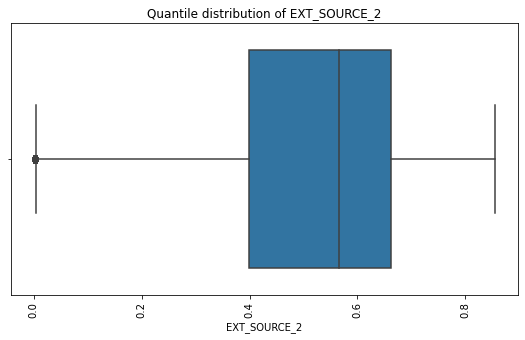

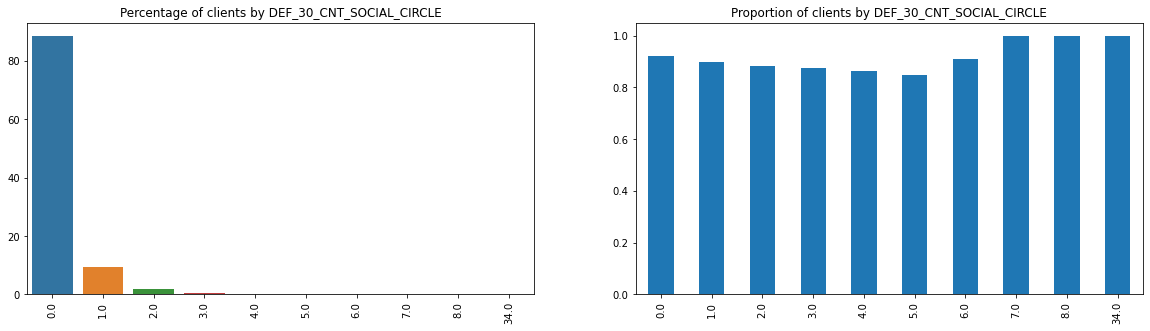

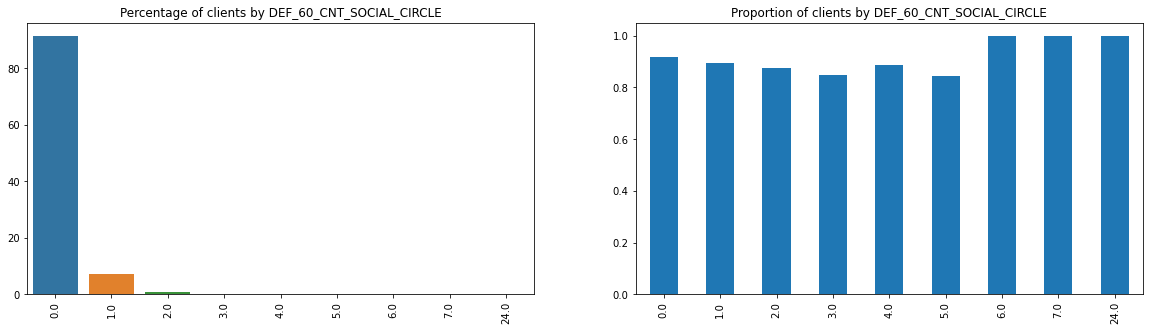

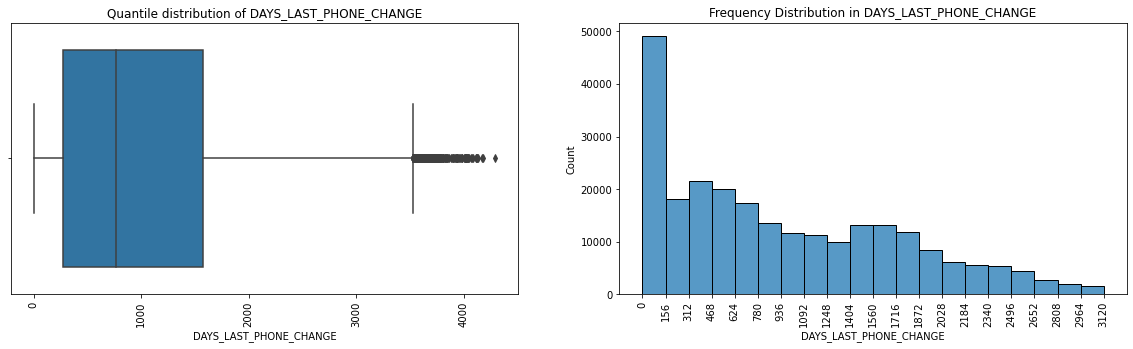

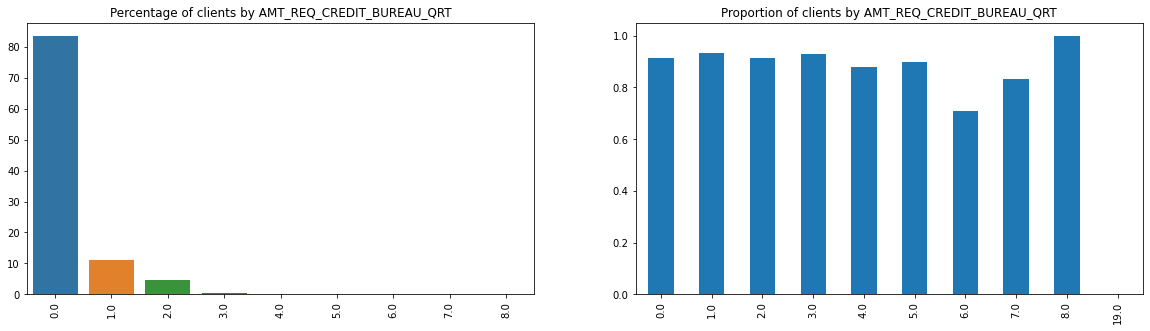

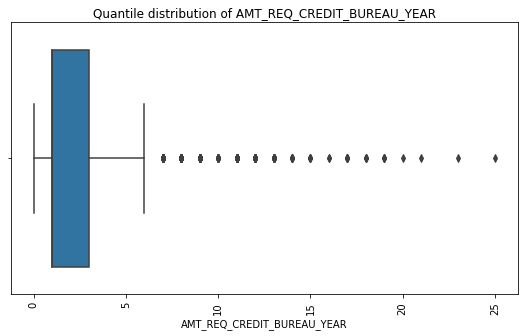

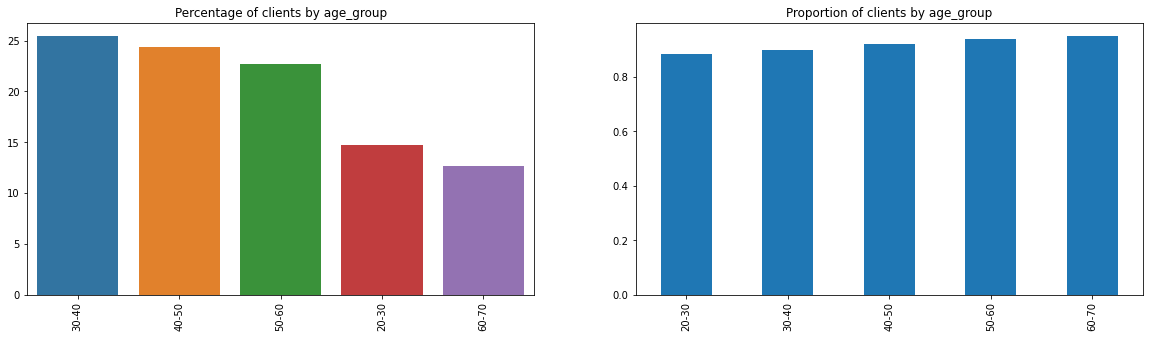

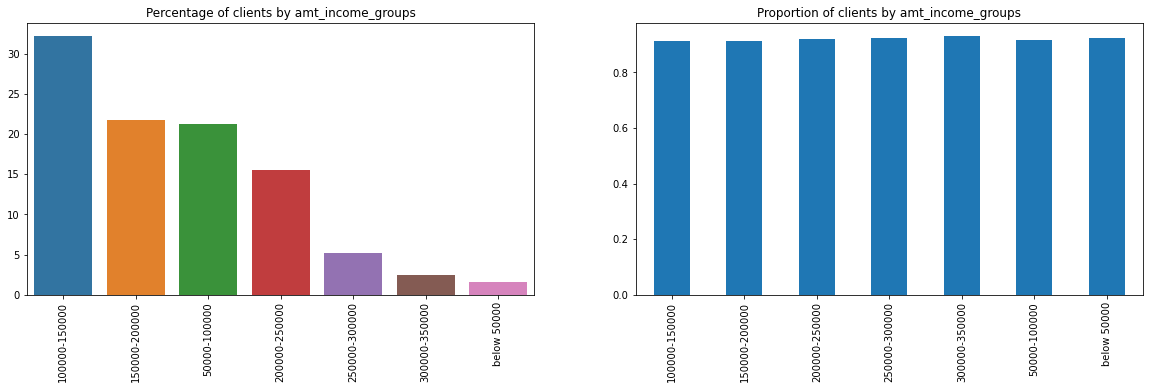

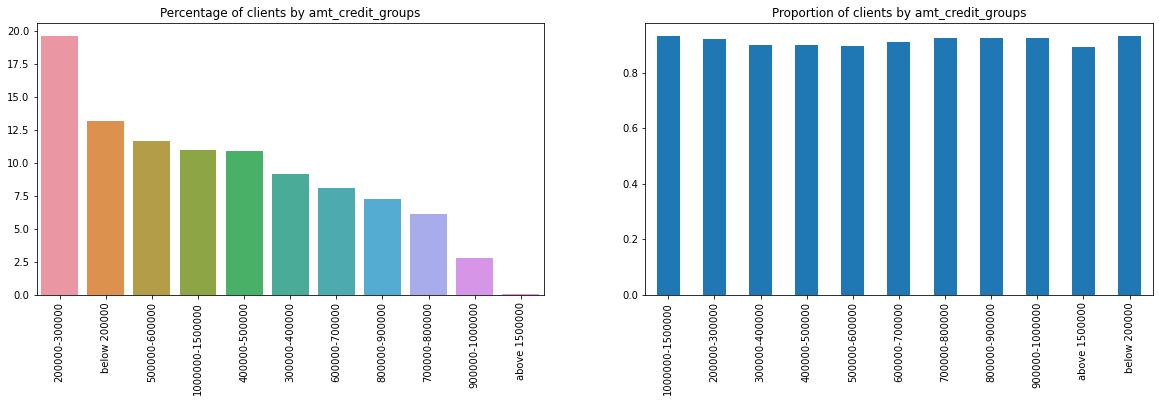

In [54]:
# plot for Non defaulters (target=0)

plotWithProportions(target_0)

#### Conclusion:

    For Non-Defaulters, for most columns, all categories have almost equal proportions.
    Most Non defaulters were between the age 35-45. 75% of them were below 55 years.
    
    Pensioners have the highest proportions of Non-defaulters.
    
    Academic degree holders have highest proportion of Non-defaulters.
    

## Bivariate Analysis

In [436]:
# function to plot heatmaps wrt two categorical columns. 

def plotheatmapCnt(col1,col2):
    piv1 = target_1.pivot_table(index=col1, columns=col2, values='TARGET', aggfunc= 'count')
    piv2 = target_0.pivot_table(index=col1, columns=col2, values='TARGET', aggfunc='count')
    
    plt.figure(figsize=[15,7])
    
    plt.subplot(1,2,1)
    sns.heatmap(piv1, cmap='Greens')
    plt.title(f'Defaulters : Counts wrt to {col1} and {col2}',fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Blue'})

    plt.subplot(1,2,2)
    sns.heatmap(piv2, cmap='Greens')
    plt.title(f'Non Defaulters : Counts wrt to {col1} and {col2}',fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Blue'})
    plt.show()
    


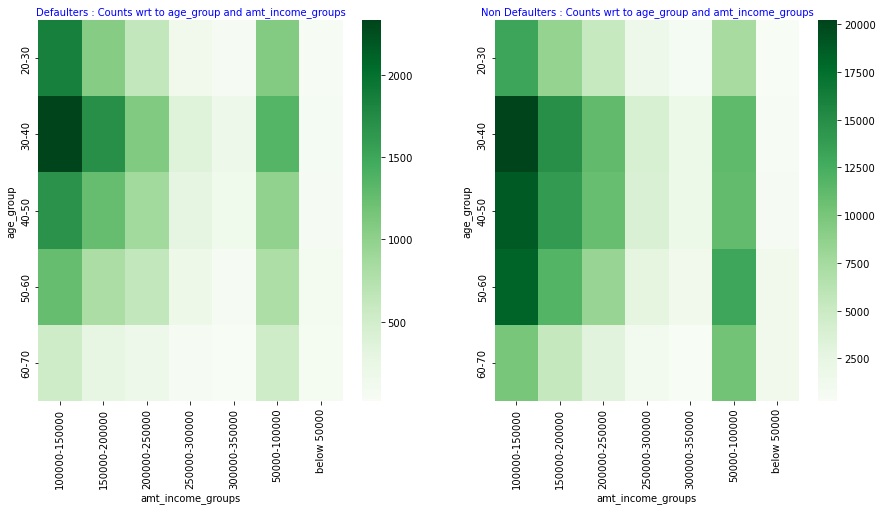

In [437]:
plotheatmapCnt('age_group','amt_income_groups')


    Most defaulters with salary 1-1.5 lakh were 20-40 years of age.
    There are many Non defaulters in the age group 30-60 earning 1-1.5 lakhs

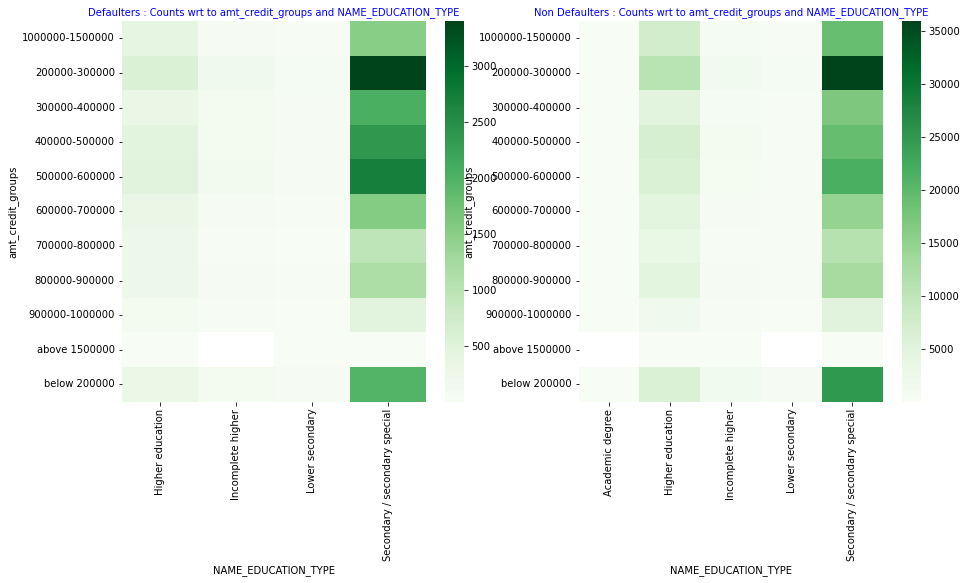

In [438]:
plotheatmapCnt('amt_credit_groups','NAME_EDUCATION_TYPE')


    Most defaulters had Credit between 2-6 lakhs and had secondary education

In [440]:
# function to create boxplots for x,y,hue variable as input parameter

def BivariateBox(x,y,hue):  # the y argument must be a numeric and x,hue must be categorical

    plt.figure(figsize=(20,8))
    sns.boxplot(data = target_1, x=x, y=y, hue = hue)
    plt.title(f'Defaulters:Distribution of {y} for each {x} by {hue}', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Green'})
#     plt.xticks(rotation=90)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    

    plt.figure(figsize=(20,8))
    sns.boxplot(data = target_0, x=x, y=y, hue = hue)
    plt.title(f'Non defaulters:Distribution of {y} for each {x} by {hue}',fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Green'})
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     plt.xticks(rotation=90)
    plt.show()



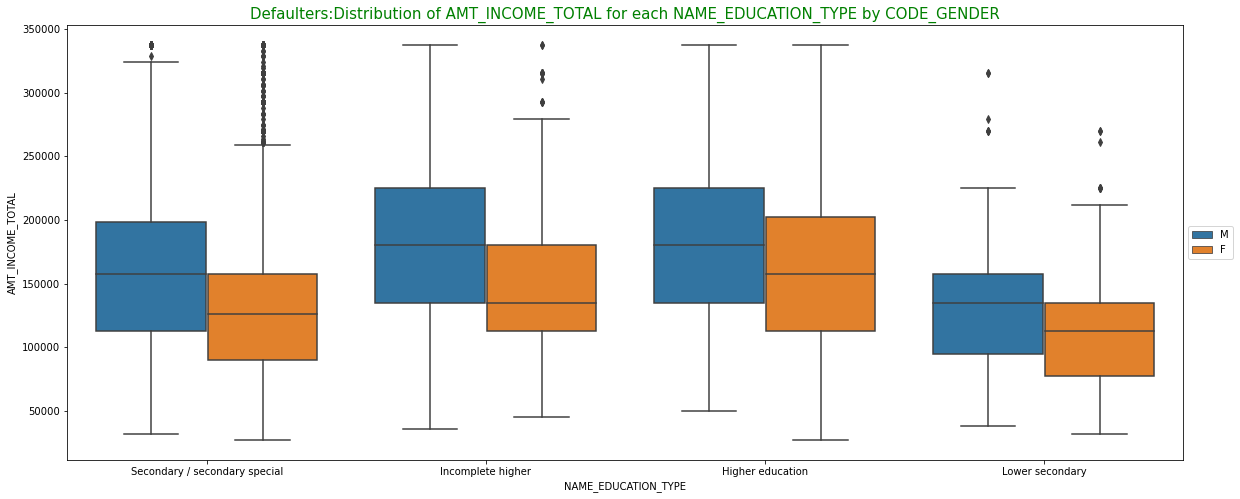

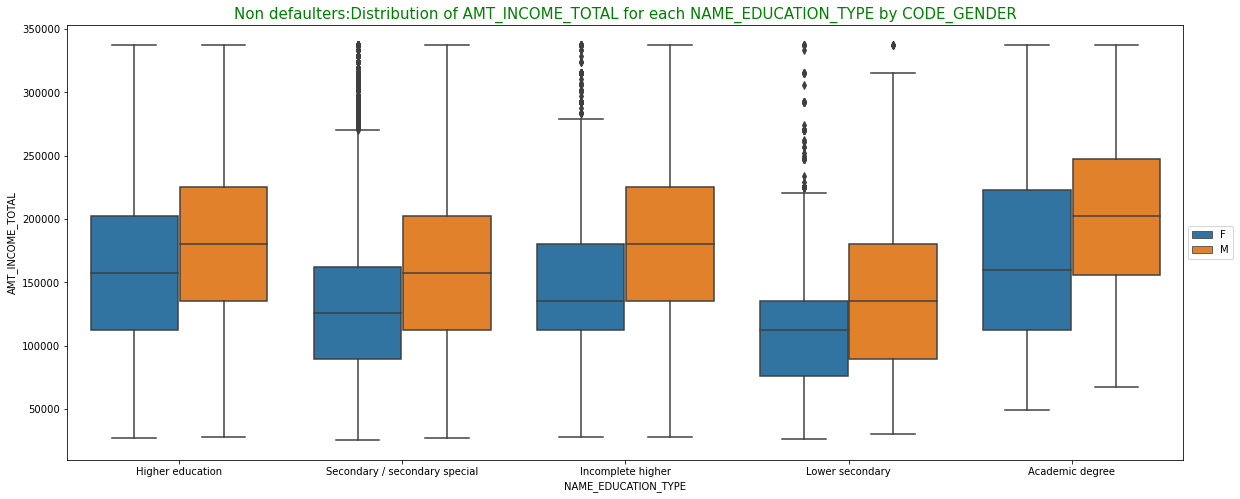

In [441]:
BivariateBox('NAME_EDUCATION_TYPE','AMT_INCOME_TOTAL','CODE_GENDER')


    Mostly males are having higher median salary across all education levels. 
    None of those with Academic degrees were defaulters. All those with Academic degrees were non defaulters
    Median salary for higher education is higher.
    Among the defaulters with Lower secondary level education, most males and females are in lower income range. 

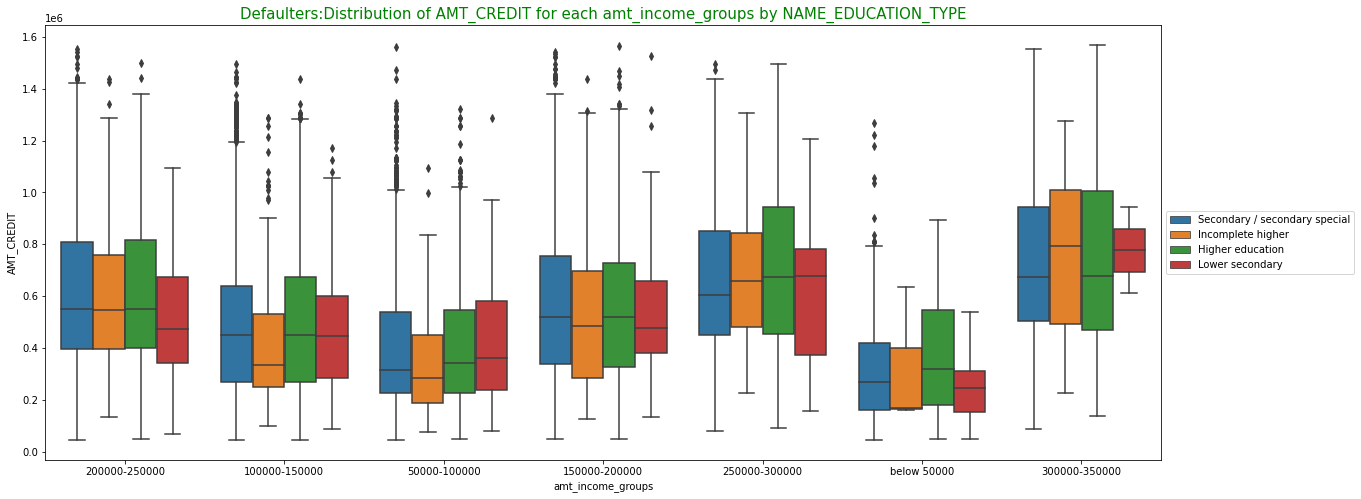

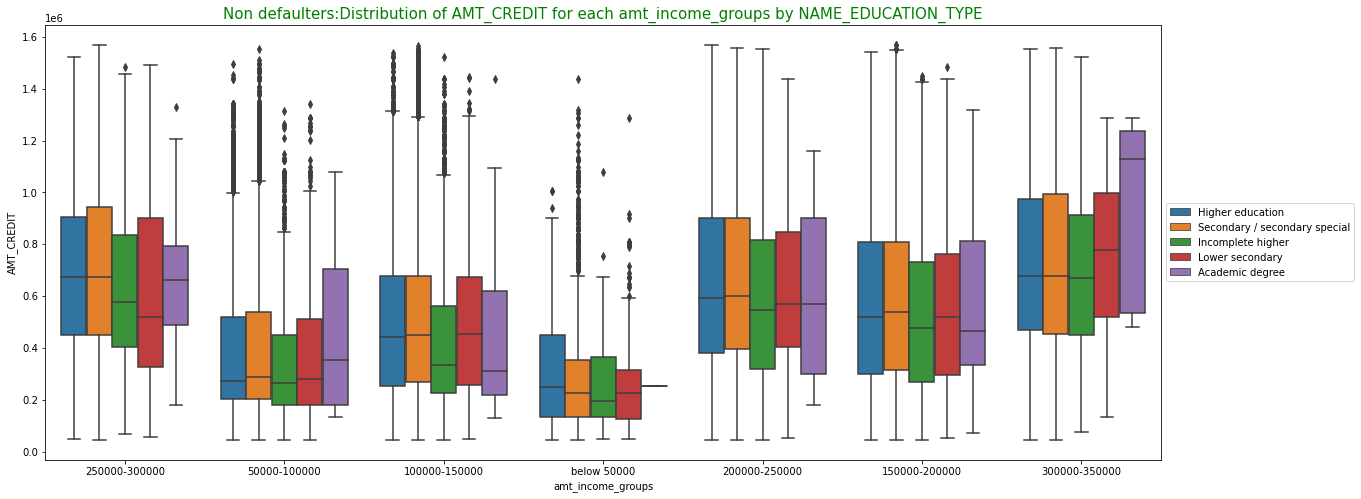

In [442]:
BivariateBox('amt_income_groups','AMT_CREDIT','NAME_EDUCATION_TYPE')


    Credit amount is generally higher for higher income groups.
    Non-Defaulters with Academic degree had the highest credits compared to other education levels. 
    This means all people with academic degree were able to pay back loans even with high credits. 
    

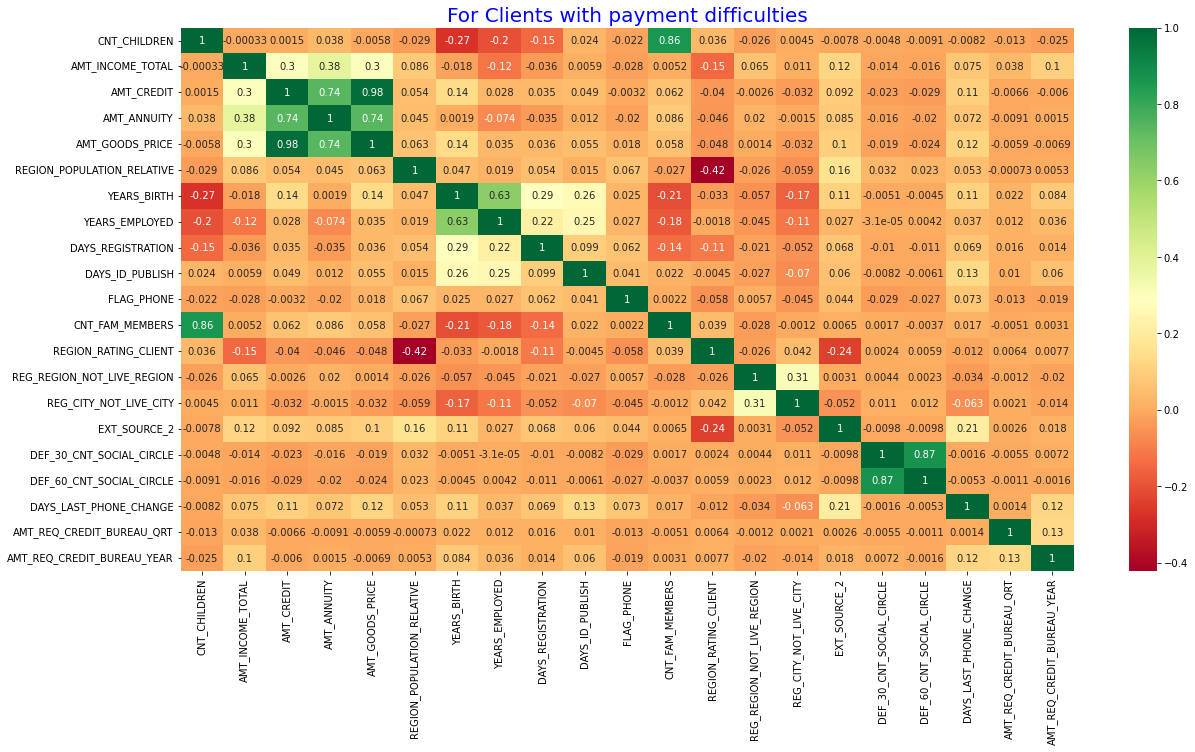

In [443]:
# Plotting correlation map for current

plt.figure(figsize=[20,10])
sns.heatmap(target_1.drop(columns=['SK_ID_CURR','TARGET']).corr(), cmap='RdYlGn', annot=True)
plt.title('For Clients with payment difficulties', fontdict={'fontsize':20, 'color':'Blue'})
plt.show()

We can see that for clients with Payment difficulties:
1. The region rating is inversely proportional to Income, credit, population, external score. This means better regions have rating 1.
2. Higher the Income, higher the annuity, credit and goods price
3. Client permanent address does not match contact address for those defaulters who had low age and years of employment.
4. Normalized score is less for defaulters with higher regional ratings.
5. Defaulters that changed registration recently before the application had poor region ratings.

## Previous application data

In [489]:
previous = pd.read_csv('previous_application.csv')
previous.head(3)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0           -42.0                      300.0          -42.0             -37.0   
1          -134.0                      916.0       365243.0          365243.0   
2          -271.0                       59.0       365243.0          365243.0   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0  
2                        1.0

In [490]:
previous.shape

(1670214, 37)

In [491]:
# Find percentage of nulls in all columns

NApercent(previous)

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [492]:
# Remove columns with more than 30 % missing values

previous = previous[previous.columns[NApercent(previous) < 30]]
previous.shape

(1670214, 26)

In [493]:
# find the unique categories in each categorical attribute

findCategories(previous)

NAME_CONTRACT_TYPE : ['Consumer loans' 'Cash loans' 'Revolving loans' 'XNA'] 

WEEKDAY_APPR_PROCESS_START : ['SATURDAY' 'THURSDAY' 'TUESDAY' 'MONDAY' 'FRIDAY' 'SUNDAY' 'WEDNESDAY'] 

FLAG_LAST_APPL_PER_CONTRACT : ['Y' 'N'] 

NAME_CASH_LOAN_PURPOSE : ['XAP' 'XNA' 'Repairs' 'Everyday expenses' 'Car repairs'
 'Building a house or an annex' 'Other' 'Journey'
 'Purchase of electronic equipment' 'Medicine' 'Payments on other loans'
 'Urgent needs' 'Buying a used car' 'Buying a new car'
 'Buying a holiday home / land' 'Education' 'Buying a home' 'Furniture'
 'Buying a garage' 'Business development' 'Wedding / gift / holiday'
 'Hobby' 'Gasification / water supply' 'Refusal to name the goal'
 'Money for a third person'] 

NAME_CONTRACT_STATUS : ['Approved' 'Refused' 'Canceled' 'Unused offer'] 

NAME_PAYMENT_TYPE : ['Cash through the bank' 'XNA' 'Non-cash from your account'
 'Cashless from the account of the employer'] 

CODE_REJECT_REASON : ['XAP' 'HC' 'LIMIT' 'CLIENT' 'SCOFR' 'SCO' 'XNA' 'VERI

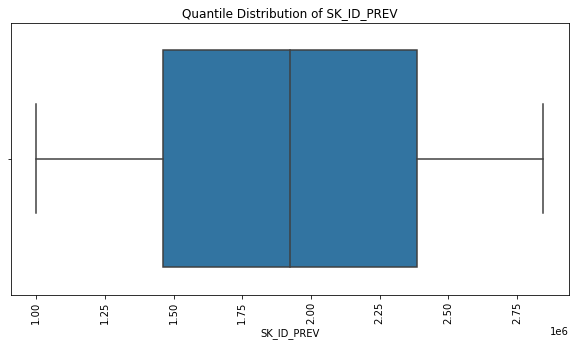

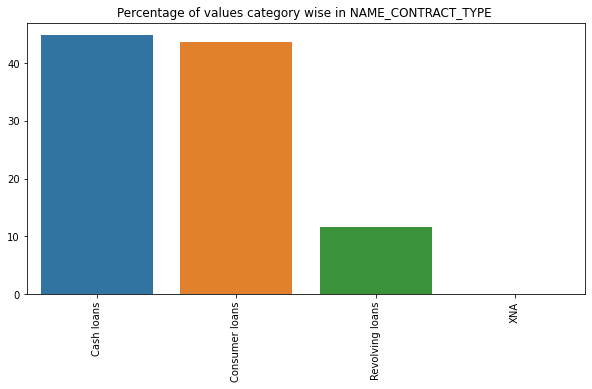

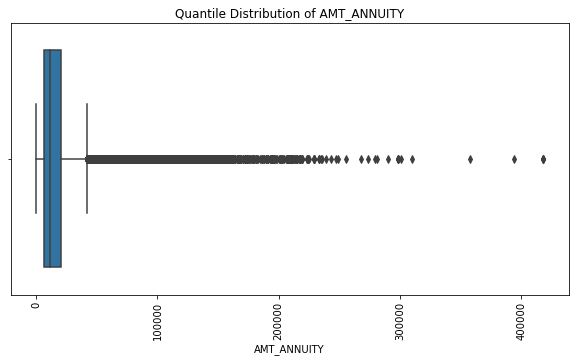

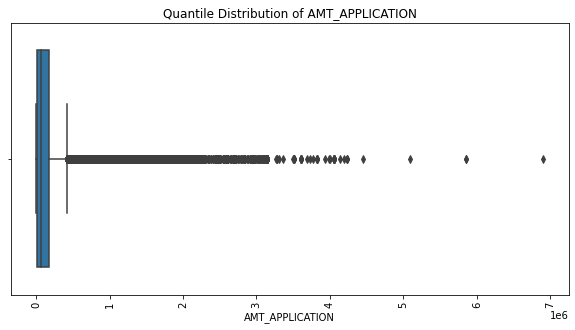

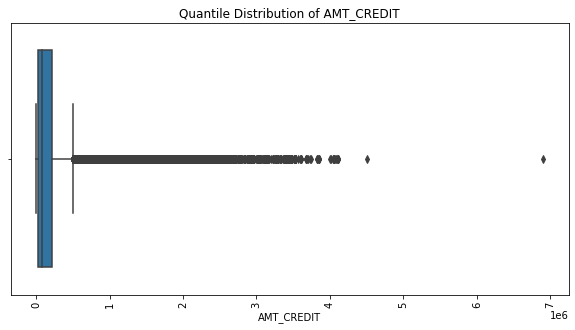

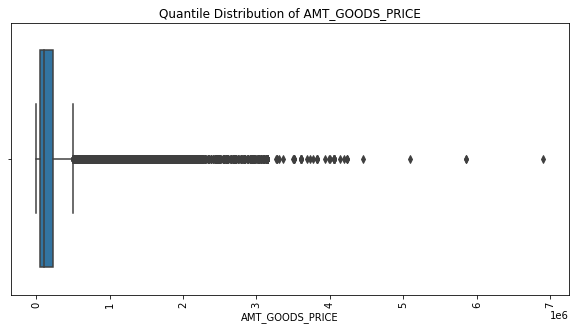

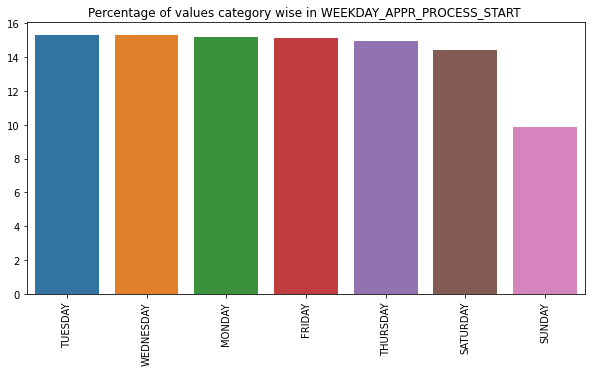

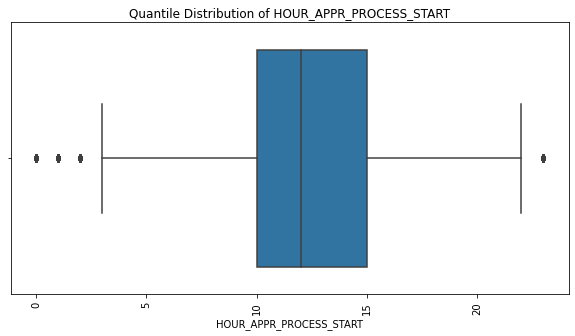

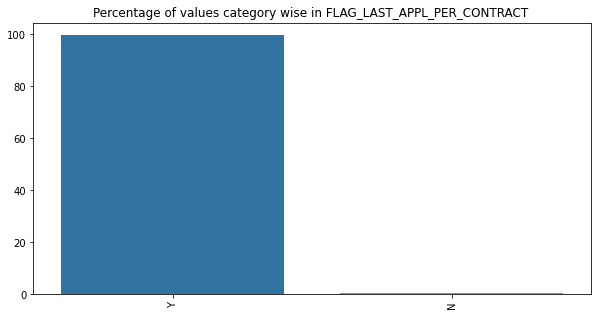

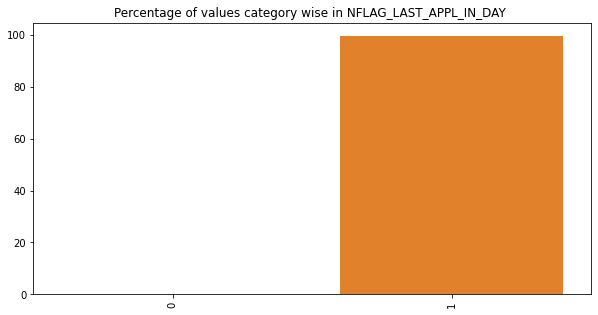

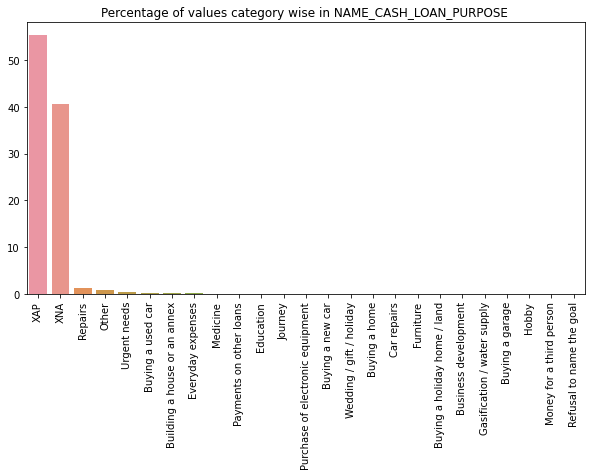

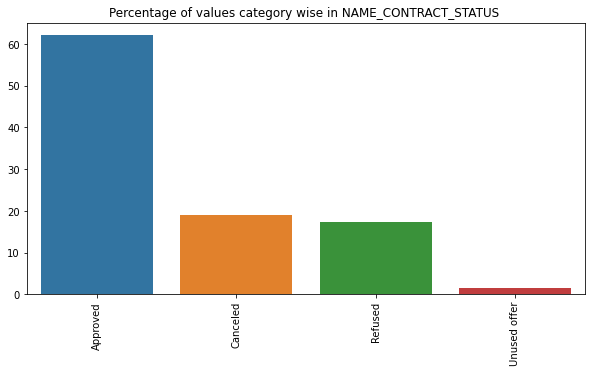

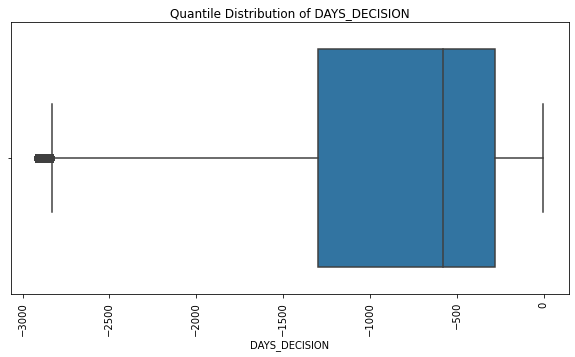

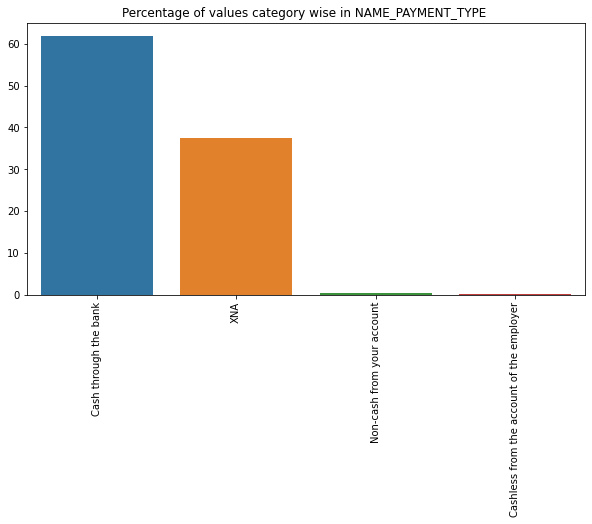

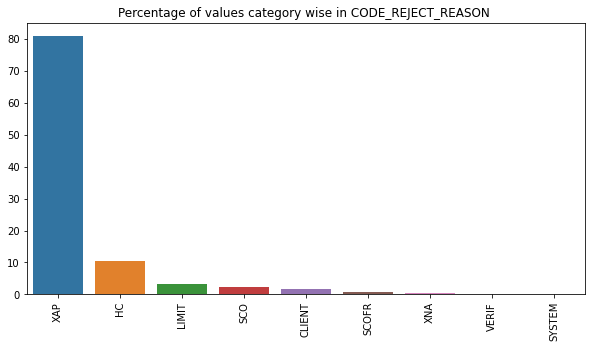

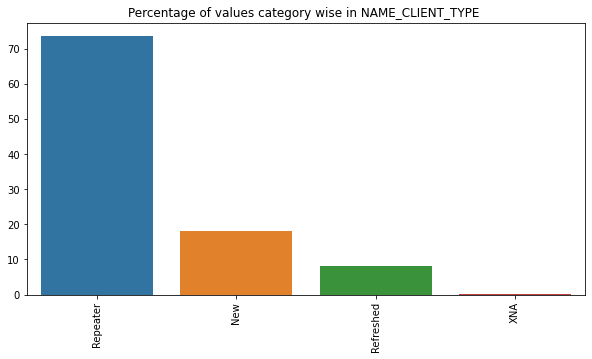

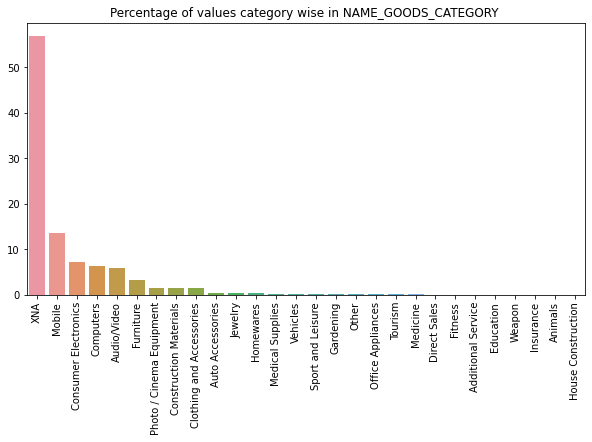

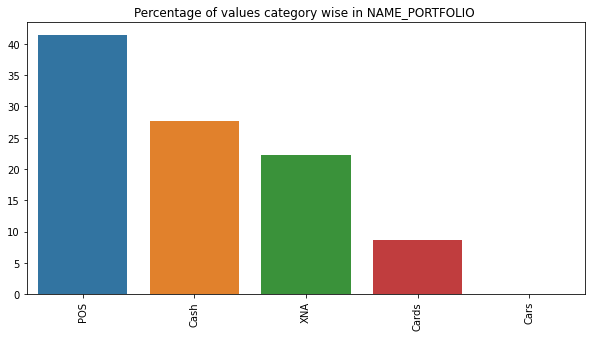

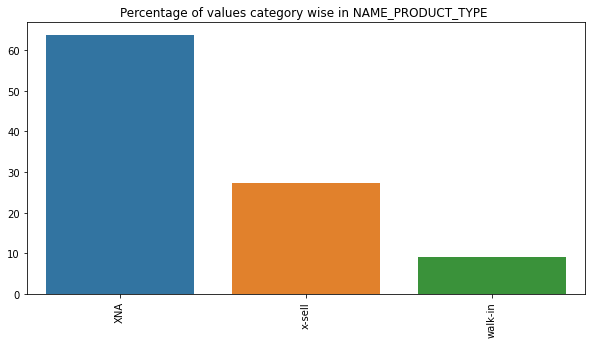

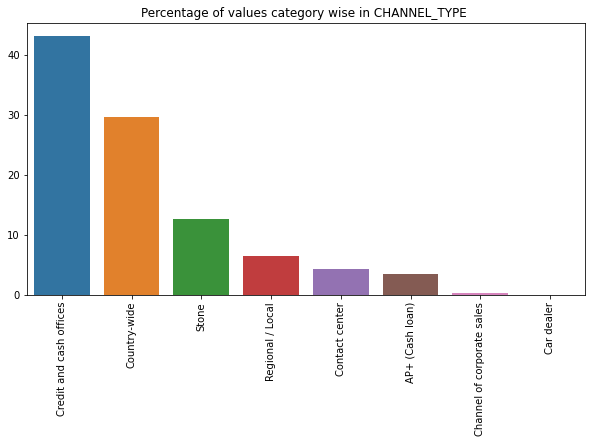

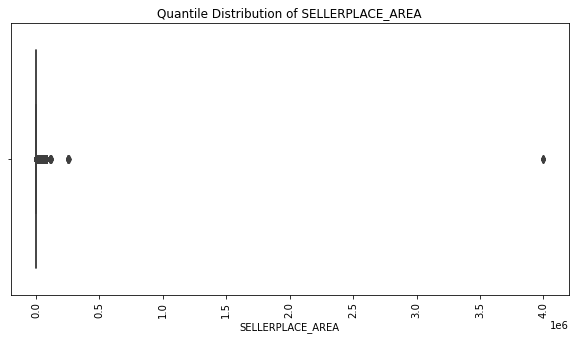

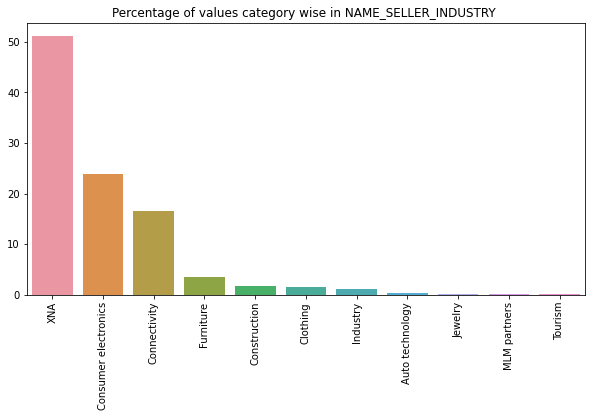

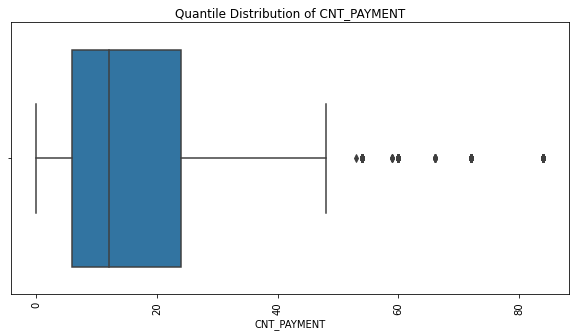

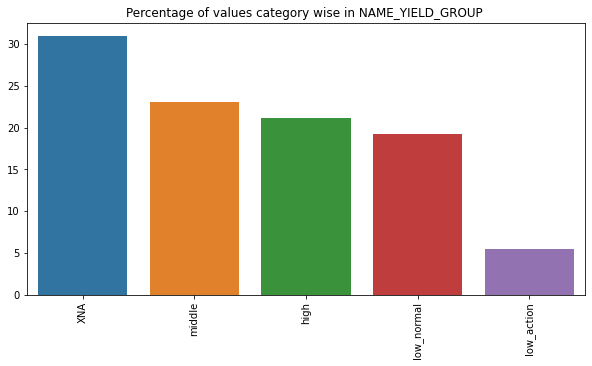

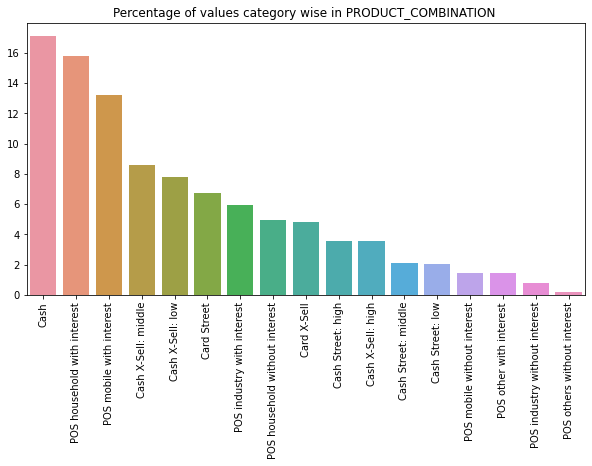

In [494]:
plotCount(previous)

In [495]:
# Replace all 'XNA' with NaN 

previous.replace('XNA',np.nan, inplace=True)


In [496]:

NApercent(previous)

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.020716
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE         40.588691
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE              37.563091
CODE_REJECT_REASON              0.313972
NAME_CLIENT_TYPE                0.116213
NAME_GOODS_CATEGORY            56.927376
NAME_PORTFOLIO                 22.286366
NAME_PRODUCT_TYPE              63.684414
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY           51.234153
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

In [497]:
# Remove columns with more than 30 % missing values

previous = previous[previous.columns[NApercent(previous) < 30]]
previous.shape

(1670214, 20)

In [498]:
# remove unwanted columns

previous.drop(columns=['SK_ID_PREV','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','NFLAG_LAST_APPL_IN_DAY',
                       'FLAG_LAST_APPL_PER_CONTRACT','SELLERPLACE_AREA','PRODUCT_COMBINATION'], inplace=True)

In [499]:
# Remove rows with more than 30% null values

previous = previous[previous.isna().sum(axis=1) <= 0.3*previous.shape[1]]
previous.shape

(1334504, 13)

In [500]:
NApercent(previous)

SK_ID_CURR              0.000000
NAME_CONTRACT_TYPE      0.000000
AMT_ANNUITY             2.736972
AMT_APPLICATION         0.000000
AMT_CREDIT              0.000075
AMT_GOODS_PRICE         3.871101
NAME_CONTRACT_STATUS    0.000000
DAYS_DECISION           0.000000
CODE_REJECT_REASON      0.253278
NAME_CLIENT_TYPE        0.067516
NAME_PORTFOLIO          2.736597
CHANNEL_TYPE            0.000000
CNT_PAYMENT             2.736597
dtype: float64

###### We can impute rest of the missing values

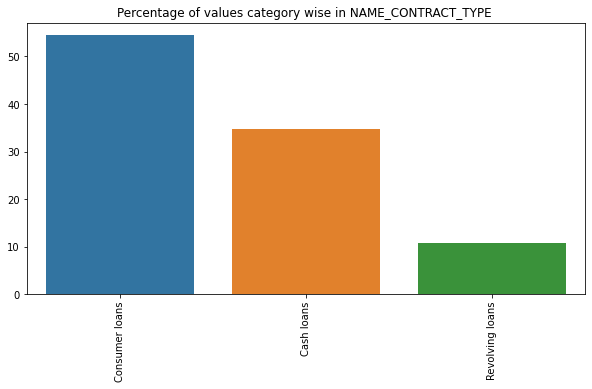

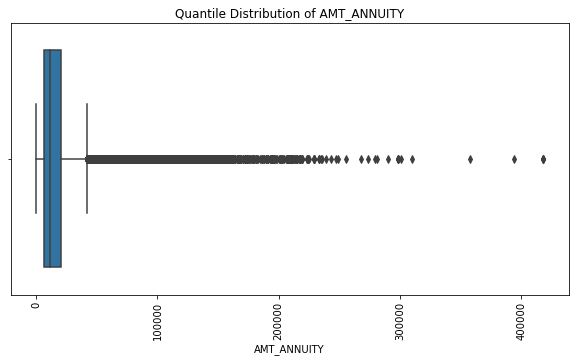

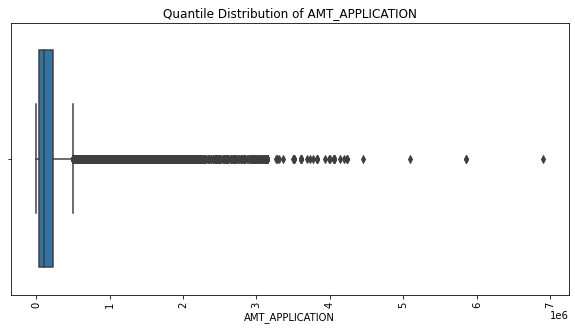

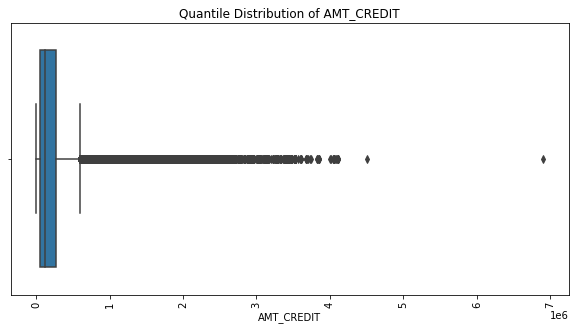

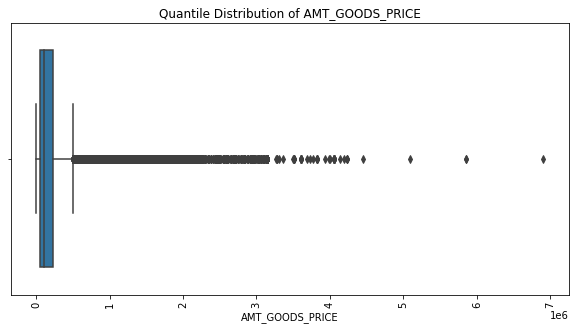

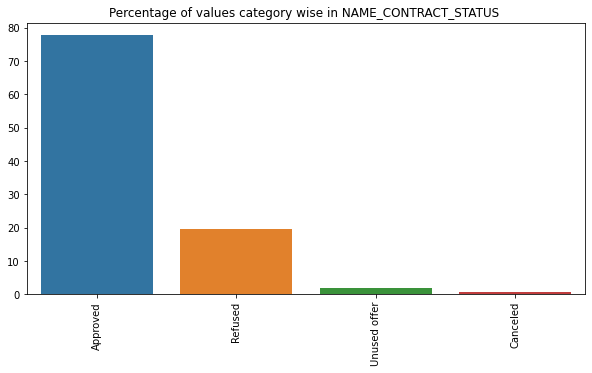

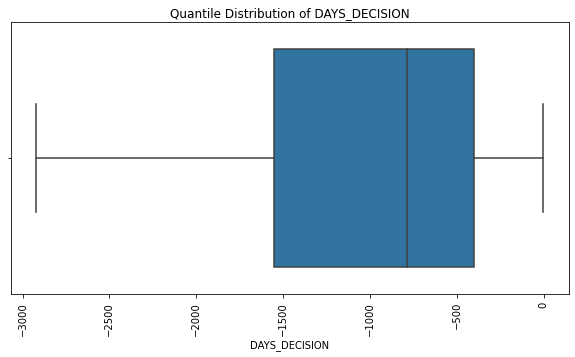

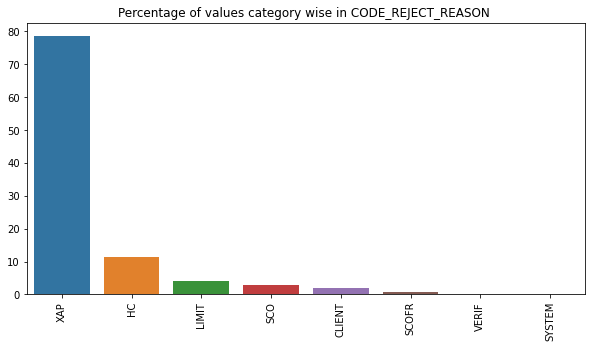

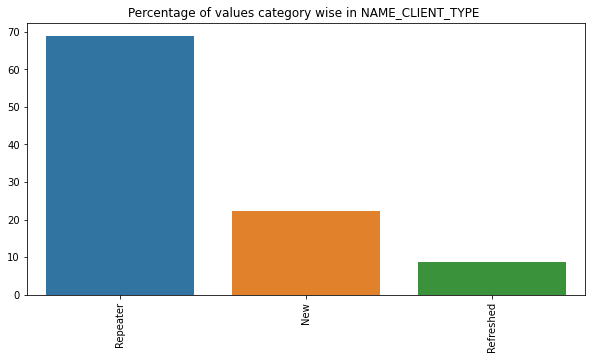

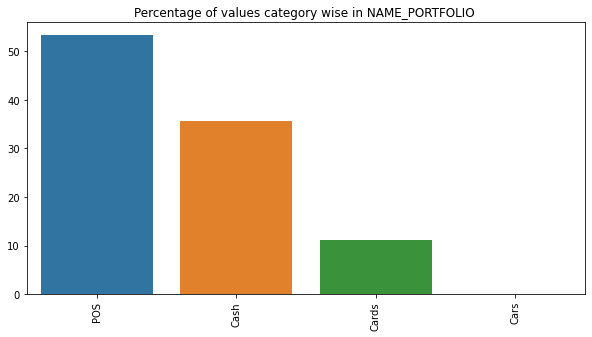

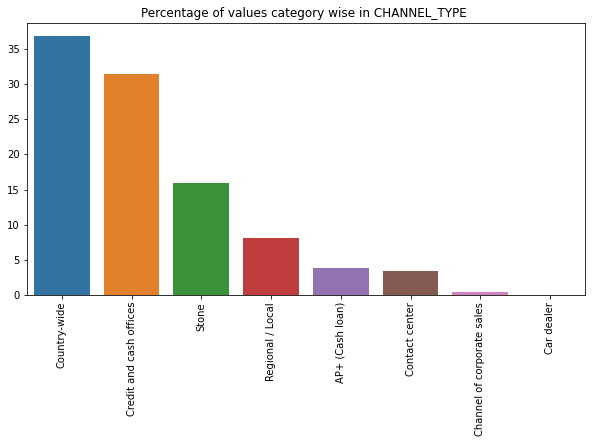

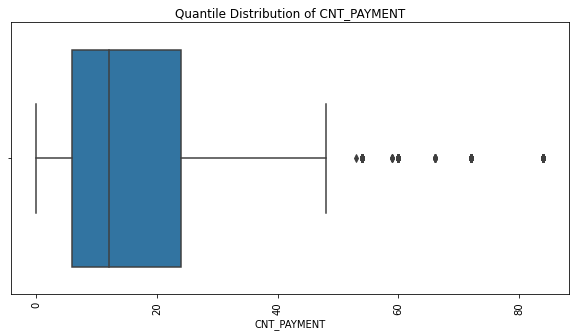

In [501]:
# let's see the distributions of different columns

plotCount(previous)

In [502]:
# lets impute the missing values

fillNulls(previous)

imputed nulls in AMT_ANNUITY
imputed nulls in AMT_CREDIT
imputed nulls in AMT_GOODS_PRICE
imputed nulls in CODE_REJECT_REASON
imputed nulls in NAME_CLIENT_TYPE
imputed nulls in NAME_PORTFOLIO
imputed nulls in CNT_PAYMENT


In [503]:
# let's remove the outliers now

previous = removeOutliers_IQR(previous, 'AMT_ANNUITY')
previous = removeOutliers_IQR(previous, 'AMT_APPLICATION')
previous = removeOutliers_IQR(previous, 'AMT_CREDIT')
previous = removeOutliers_IQR(previous ,'AMT_GOODS_PRICE')

Q1=6468.48, Q3=20250.0
removing outliers for AMT_ANNUITY that lie <=-14203.8 and >=40922.28

Q1=45000.0, Q3=202500.0
removing outliers for AMT_APPLICATION that lie <=-191250.0 and >=438750.0

Q1=45000.0, Q3=171067.5
removing outliers for AMT_CREDIT that lie <=-144101.25 and >=360168.75

Q1=45000.0, Q3=136327.5
removing outliers for AMT_GOODS_PRICE that lie <=-91991.25 and >=273318.75



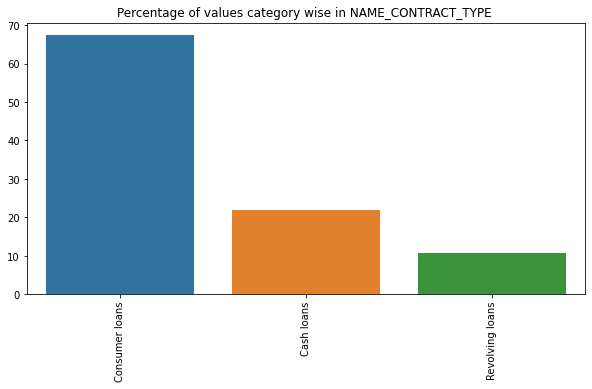

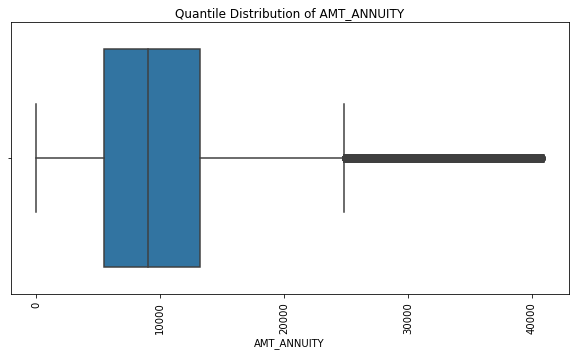

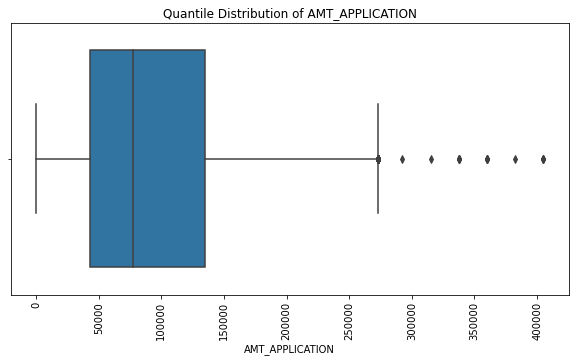

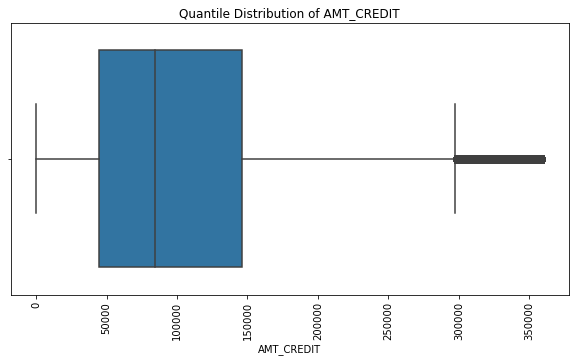

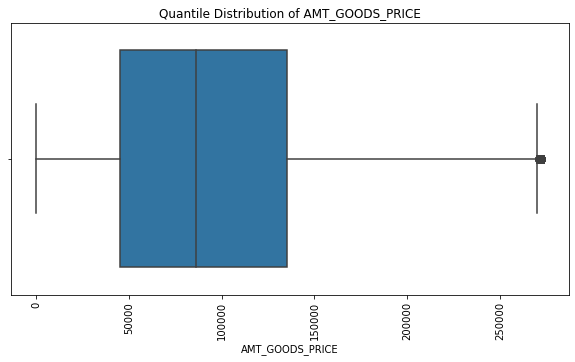

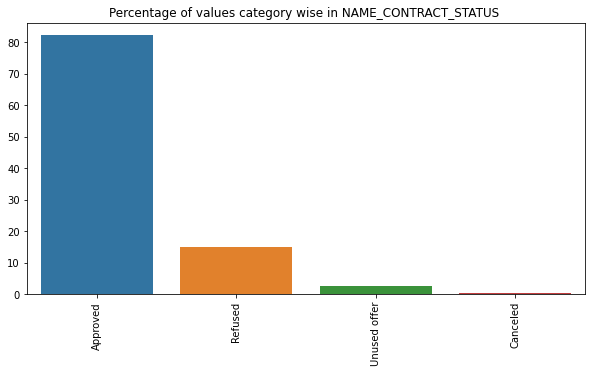

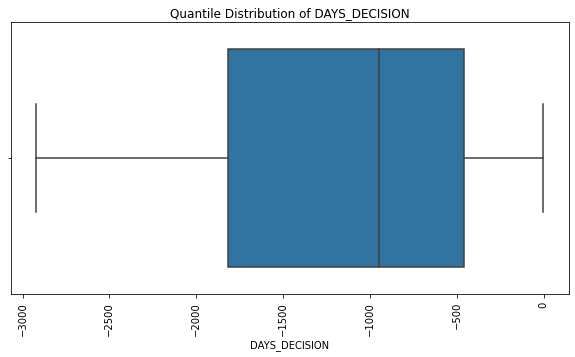

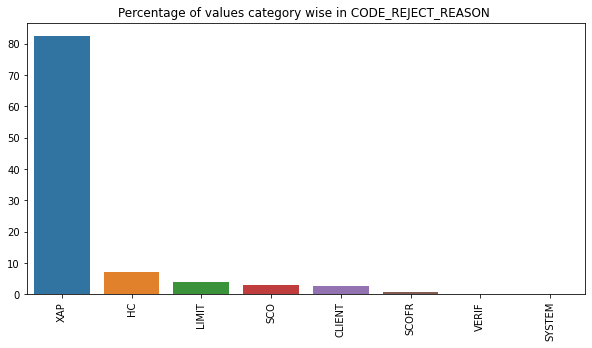

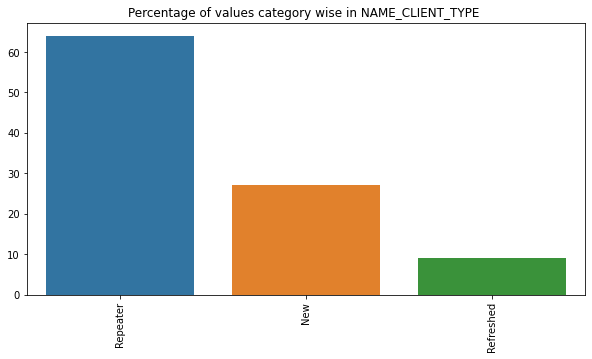

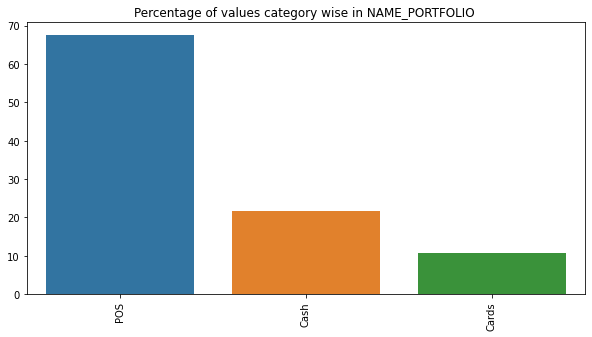

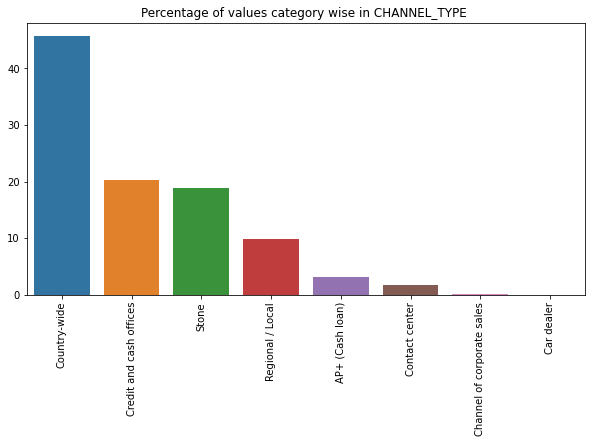

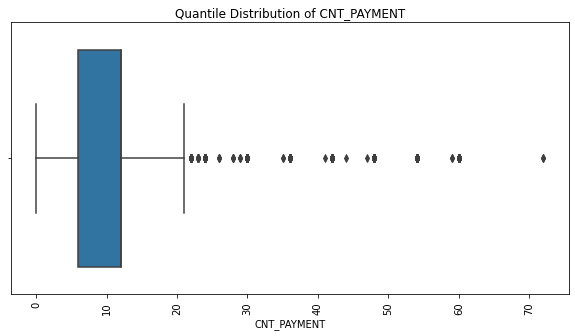

In [504]:

plotCount(previous)

### Join current with previous

In [505]:
joined = pd.merge(current, previous, how='inner',on='SK_ID_CURR', suffixes=['_curr','_prev'])
joined.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_curr CODE_GENDER FLAG_OWN_CAR  \
0      100002       1              Cash loans           M            N   
1      100003       0              Cash loans           F            N   
2      100004       0         Revolving loans           M            Y   
3      100006       0              Cash loans           F            N   
4      100006       0              Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_curr  \
0               Y             0          202500.0         406597.5   
1               N             0          270000.0        1293502.5   
2               Y             0           67500.0         135000.0   
3               Y             0          135000.0         312682.5   
4               Y             0          135000.0         312682.5   

   AMT_ANNUITY_curr  AMT_GOODS_PRICE_curr NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0           24700.5              351000.0   Unaccompanied          Working   
1           35698.5             1129500.0          Family    State servant   
2            6750.0              135000.0   Unaccompanied          Working   
3           29686.5              297000.0   Unaccompanied          Working   
4           29686.5              297000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special        Civil marriage  House / apartment   

   REGION_POPULATION_RELATIVE  YEARS_BIRTH  YEARS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801    25.920548        1.745205             3648.0   
1                    0.003541    45.931507        3.254795             1186.0   
2                    0.010032    52.180822        0.616438             4260.0   
3                    0.008019    52.068493        8.326027             9833.0   
4                    0.008019    52.068493        8.326027             9833.0   

   DAYS_ID_PUBLISH  FLAG_PHONE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0             2120           1              1.0                     2   
1              291           1              2.0                     1   
2             2531           1              1.0                     2   
3             2437           0              2.0                     2   
4             2437           0              2.0                     2   

   REG_REGION_NOT_LIVE_REGION  REG_CITY_NOT_LIVE_CITY ORGANIZATION_TYPE  \
0                           0                       0   Business Entity   
1                           0                       0            School   
2                           0                       0        Government   
3                           0                       0   Business Entity   
4                           0                       0   Business Entity   

   EXT_SOURCE_2  DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0      0.262949                       2.0                       2.0   
1      0.622246                       0.0                       0.0   
2      0.555912                       0.0                       0.0   
3      0.650442                       0.0                       0.0   
4      0.650442                       0.0                       0.0   

   DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_QRT  \
0                  1134.0                        0.0   
1                   828.0                        0.0   
2                   815.0                        0.0   
3                   617.0                        0.0   
4                   617.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR age_group amt_income_groups amt_cr

In [506]:
joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800418 entries, 0 to 800417
Data columns (total 48 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  800418 non-null  int64  
 1   TARGET                      800418 non-null  int64  
 2   NAME_CONTRACT_TYPE_curr     800418 non-null  object 
 3   CODE_GENDER                 800418 non-null  object 
 4   FLAG_OWN_CAR                800418 non-null  object 
 5   FLAG_OWN_REALTY             800418 non-null  object 
 6   CNT_CHILDREN                800418 non-null  int64  
 7   AMT_INCOME_TOTAL            800418 non-null  float64
 8   AMT_CREDIT_curr             800418 non-null  float64
 9   AMT_ANNUITY_curr            800418 non-null  float64
 10  AMT_GOODS_PRICE_curr        800418 non-null  float64
 11  NAME_TYPE_SUITE             800418 non-null  object 
 12  NAME_INCOME_TYPE            800418 non-null  object 
 13  NAME_EDUCATION

In [507]:
# function to plot barplots for categorical data by grouping them based on col1(plotted on x-axis) and 
# finding percentage(plotted on y) of each category of col2(hue) in it

def plotGroupby(df,col1,col2):
    df1 = df.groupby(by=col1)[col2].value_counts(normalize=True)
    df1 = df1 * 100
    df1 = df1.rename('values').reset_index()
    sns.catplot(x=col1, y='values', hue=col2,kind='bar', data=df1)
    plt.title(f'Distribution (in %) of {col2} for each category in {col1}')
    plt.xticks(rotation=70)

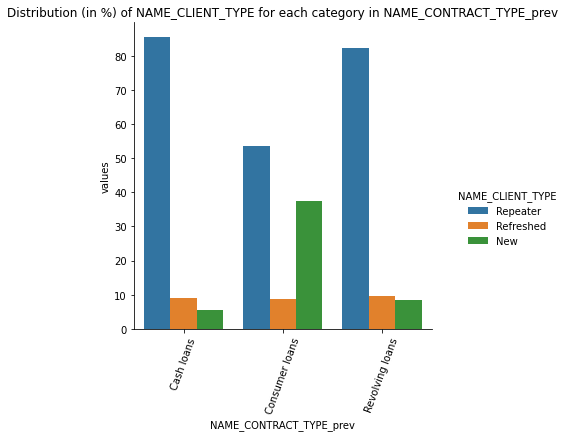

In [508]:
plotGroupby(joined, 'NAME_CONTRACT_TYPE_prev','NAME_CLIENT_TYPE')

    Most clients that applied for cash loans were Old clients and least of them were new clients
    Most clients that applied for Consumer loans were old clients followed by New clients

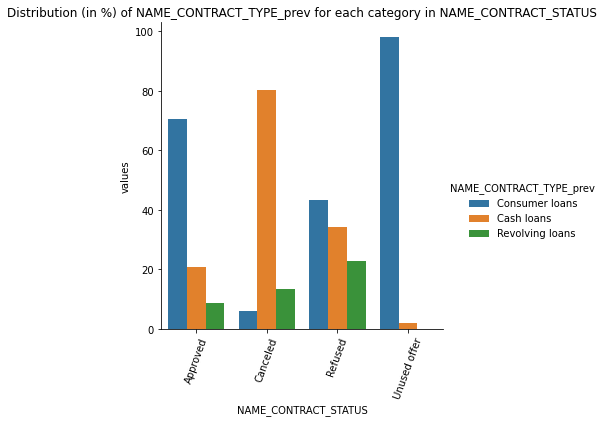

In [509]:
plotGroupby(joined,'NAME_CONTRACT_STATUS','NAME_CONTRACT_TYPE_prev')


    Most of the loans that were approved were Consumer loans
    Most loans that were cancelled were cash loans followed by revolving loans
    

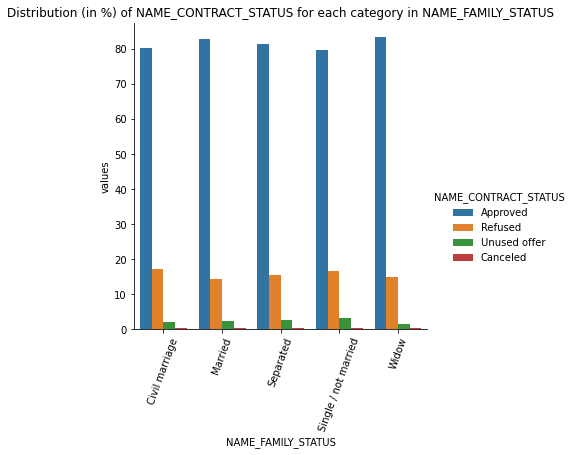

In [510]:
plotGroupby(joined,'NAME_FAMILY_STATUS','NAME_CONTRACT_STATUS')

    Married people had least percentage of refused offers
    Single people had least approved offers and highest unused offers
    Widows have least unused offers

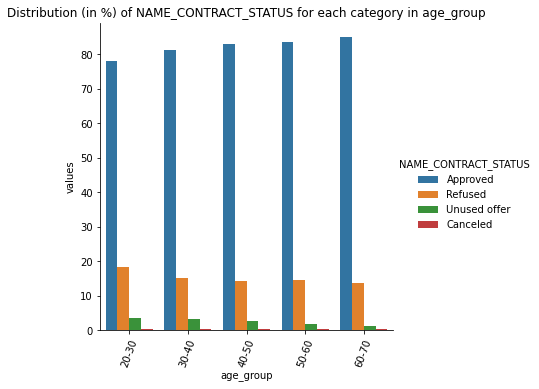

In [511]:

plotGroupby(joined,'age_group','NAME_CONTRACT_STATUS')

    Clients with age 20-30 have lowest no of Approved contracts and highest no. of refused contracts
    People with age 60-70 had least unused offers

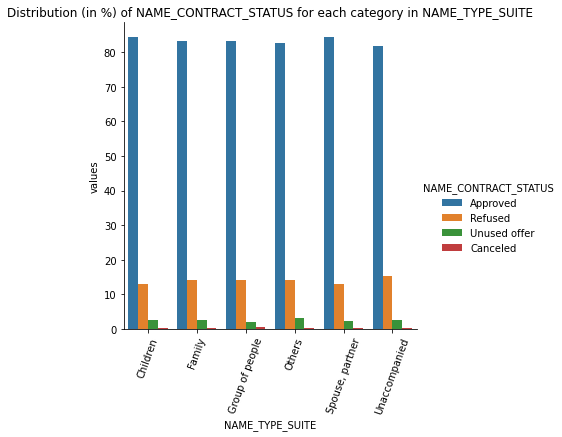

In [512]:
plotGroupby(joined,'NAME_TYPE_SUITE', 'NAME_CONTRACT_STATUS')


    People accompanied by group of people have highest cancelled offers.
    People accompanied by children or spouse had highest approved and lowest cancelled offers

In [513]:
# Segmenting the data based on target

target_1 = joined[joined.TARGET == 1]
target_0 = joined[joined.TARGET == 0]

target_1.shape, target_0.shape

((67591, 48), (732827, 48))

##### Analysing for defaulters

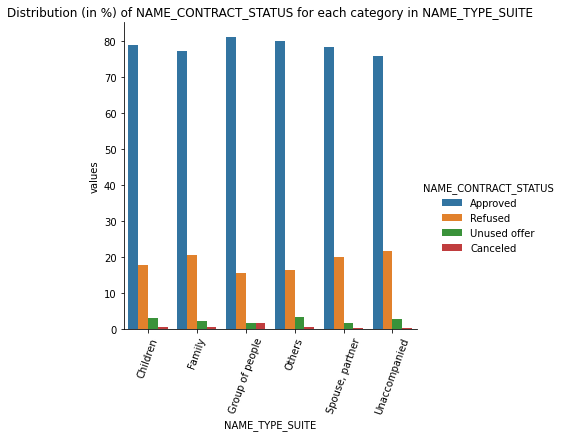

In [514]:

plotGroupby(target_1,'NAME_TYPE_SUITE', 'NAME_CONTRACT_STATUS')

    This means that defaulters accompanied by Group of people had highest % of approved loans
    and highest % of cancelled loans

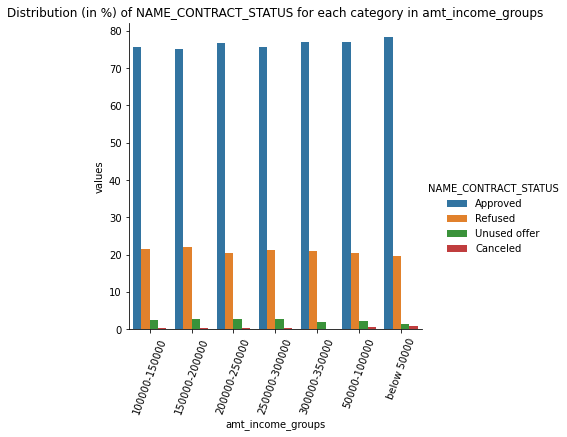

In [515]:
plotGroupby(target_1,'amt_income_groups','NAME_CONTRACT_STATUS')


    Defaulters earning below 50k had highest cancelled offers percentage compared to other income groups

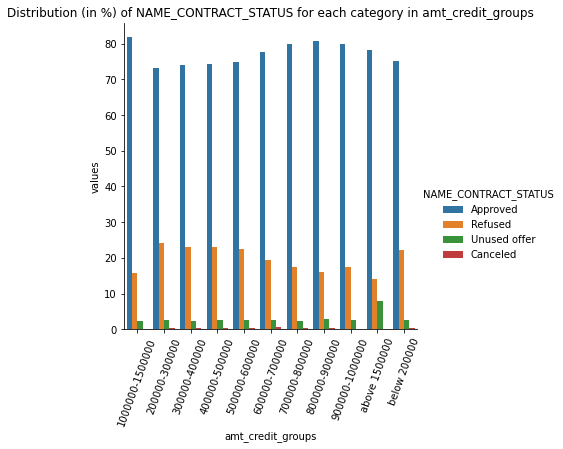

In [516]:
plotGroupby(target_1,'amt_credit_groups','NAME_CONTRACT_STATUS')


    Defaulters with credits between 1-1.5 lakhs had highest % of approved offers
    Defaulters with credit > 15 lakhs had highest % of unused offers. This means extremely high credits were mostly unused

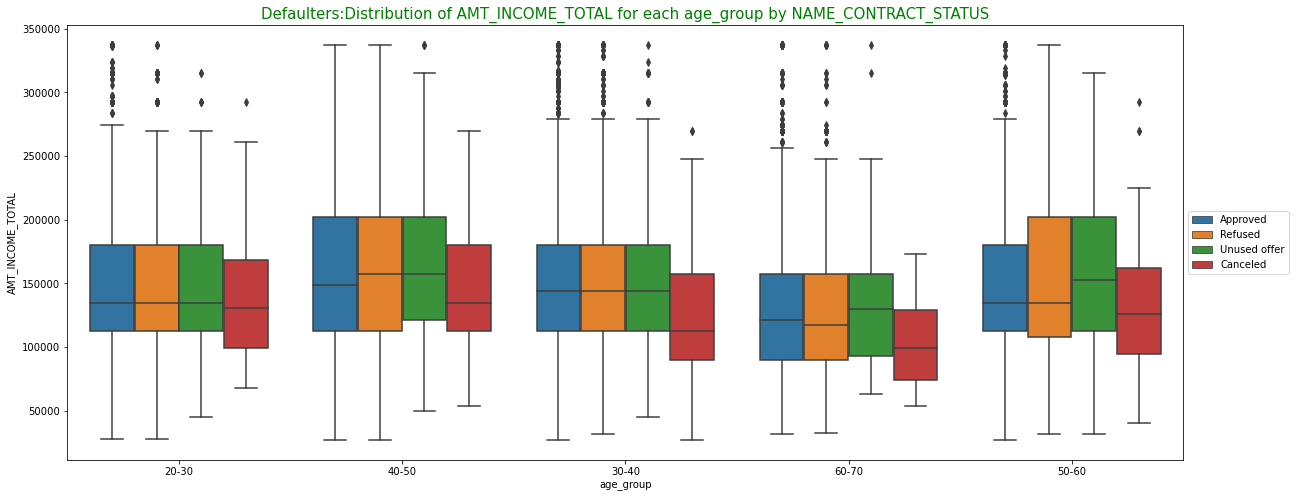

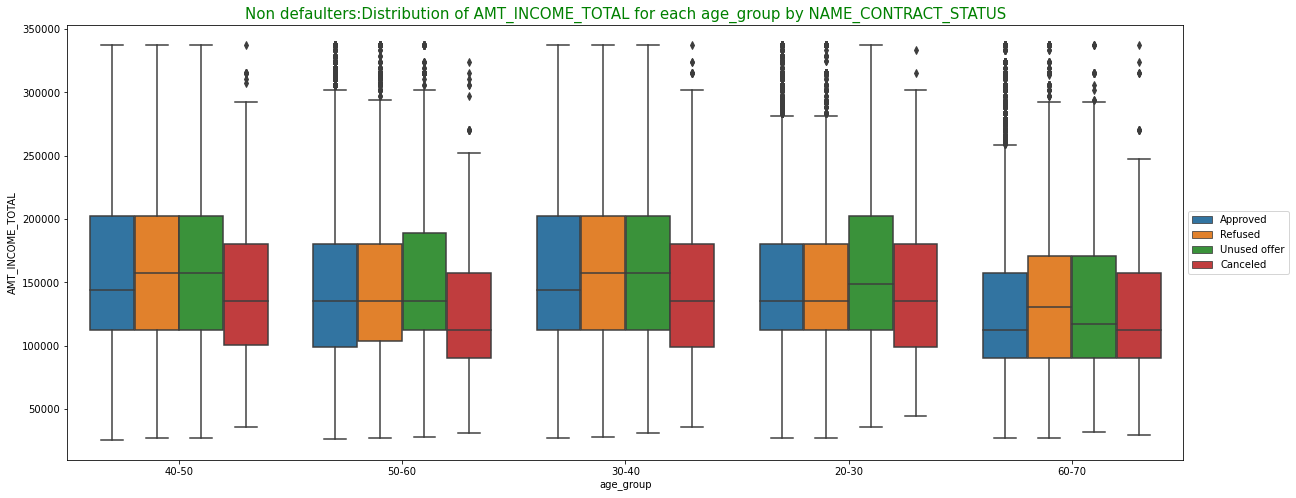

In [517]:
BivariateBox('age_group','AMT_INCOME_TOTAL','NAME_CONTRACT_STATUS')


    The loans were mostly cancelled for clients with lower median income.
    For defaulters in age 50-70, the median income was higher of those who did not use the offer.

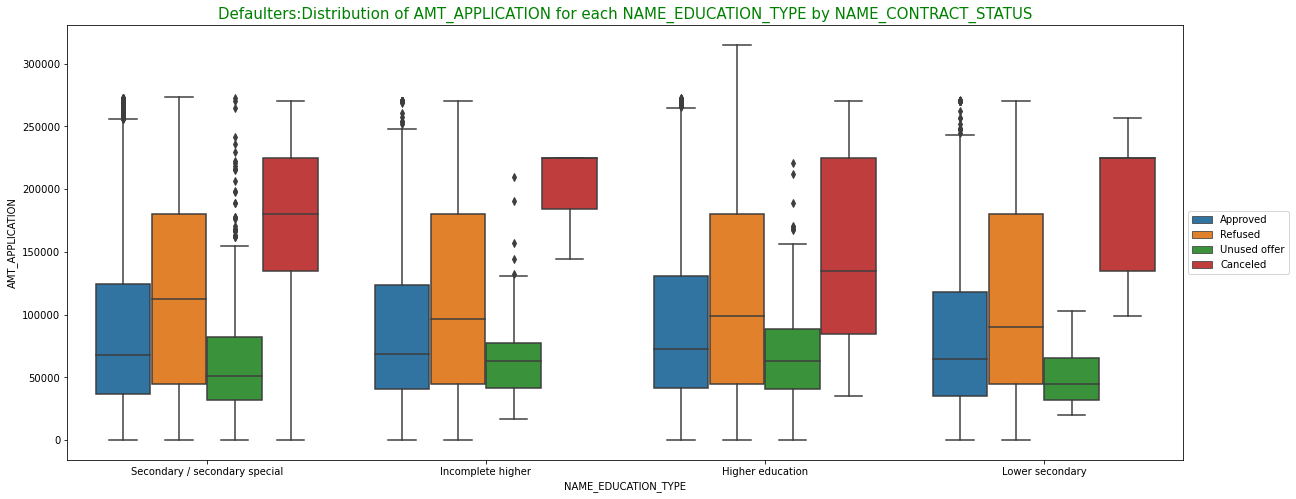

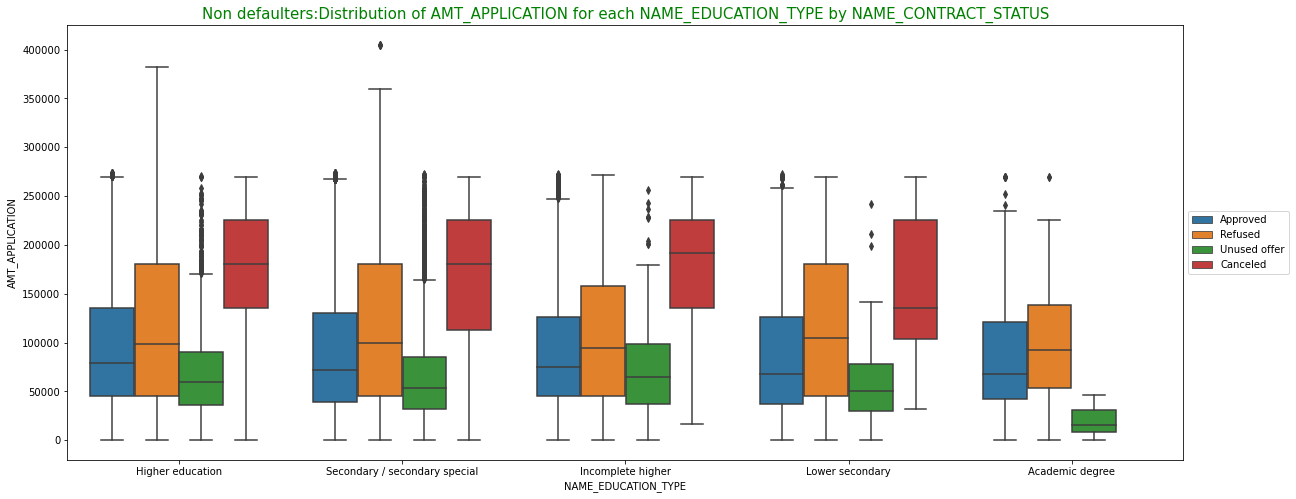

In [519]:
BivariateBox('NAME_EDUCATION_TYPE','AMT_APPLICATION','NAME_CONTRACT_STATUS')


    The median credit amount was highest for those defaulters with Lower secondary level education and
    Incomplete higher education and these loans were cancelled.
    Approved loan amounts were mostly between 40k to 130k.
    No loans were cancelled for clients with academic degree and none of them were defaulters.

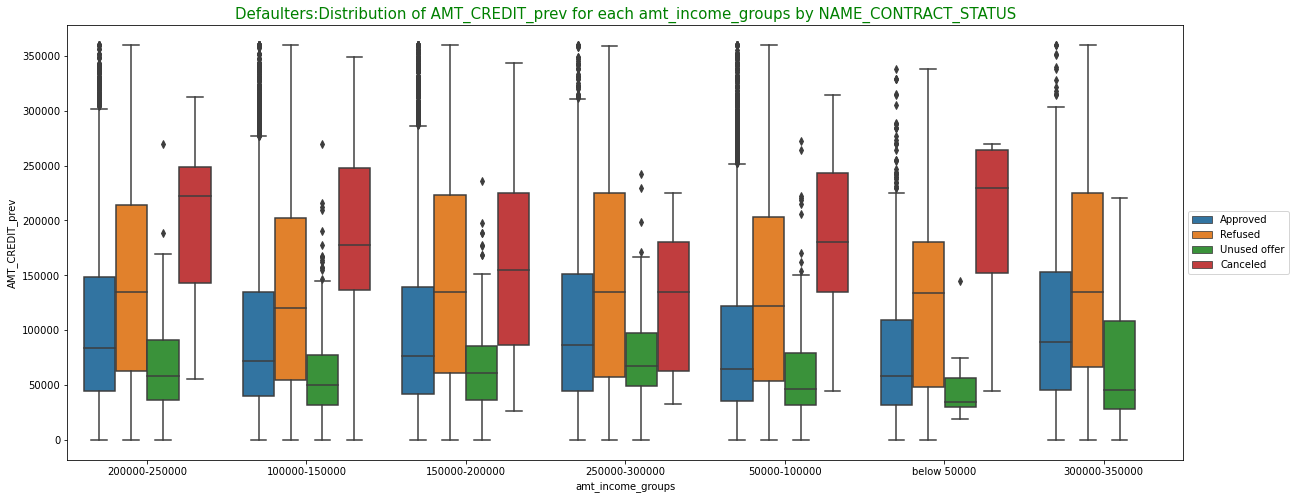

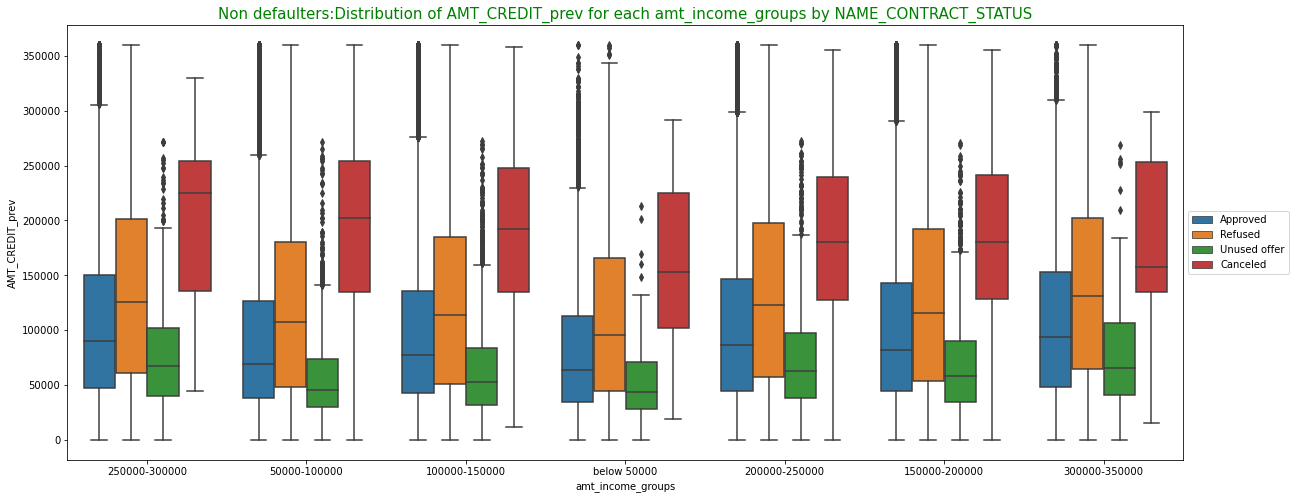

In [520]:
BivariateBox('amt_income_groups','AMT_CREDIT_prev','NAME_CONTRACT_STATUS')

    No loans were cancelled previously for defaulters that earned 3-3.5 lakhs.
    The median credit amount of cancelled loans is higher than median credit of the other loans. 

## Conclusions:

    ▪ Males are more likely to default
    ▪ Clients with lower income and lower secondary education more likely to default.
    ▪ Clients with Academic degree least likely to default.
    ▪ Pensioners are also least likely to default.
    ▪ Clients with high credit amounts above 15 lakhs mostly don’t use the offer
